In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Make sure that we're in the root directory of the project
# We can check it by verifying the existence of the `src` directory below
while "src" not in os.listdir():
    os.chdir("..")

# Set the style of the plots
markers = ["o", "s", "D", "v", "p", "P", "X", "h", "H", "d"]
colors_discrete = sns.color_palette("tab10")
colors_continuous = sns.color_palette("viridis")
linestyles = ["-", "--", "-.", ":", "-", "--", "-.", ":"]

# Do not hide any columns
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid", font_scale=1)

In [ ]:
results_path = "aaai_experiments/results_aaai/"

betarob_results_path = "aaai_experiments/results_aaai/all_lgbm_betarce_02_08/"
robx_results_path = "aaai_experiments/results_aaai/robx/"
just_base_results_path = "aaai_experiments/results_aaai/base/"
k_sweep_results_path = "aaai_experiments/results_aaai/k_sweep_02_08/"
betarob_params_results_path = "aaai_experiments/results_aaai/betarob_params/"
images_dir = f"{results_path}/images"
os.makedirs(images_dir, exist_ok=True)

In [ ]:
import yaml


def process_results(directiory: str):
    results_list = []

    # When .yaml file is found, load all .csv files in {path}/results/
    if os.path.isfile(f"{directiory}/config.yml"):
        with open(f"{directiory}/config.yml") as file:
            try:
                config = yaml.load(file, Loader=yaml.FullLoader)
            except Exception as e:
                print(f"Error loading config file in {directiory}")
                print(e)
                return []

        # Load all .csv files in {path}/results/
        for file in os.listdir(f"{directiory}/results"):
            if file.endswith(".csv") or file.endswith(".feather"):
                try:
                    if file.endswith(".feather"):
                        df = pd.read_feather(f"{directiory}/results/{file}")
                    else:
                        df = pd.read_csv(f"{directiory}/results/{file}")
                    df["config"] = config
                    df["robust_cf_method"] = config["experiments_setup"][
                        "robust_cf_method"
                    ]
                    results_list.append(df)
                except Exception as e:
                    print(f"Error loading {file} in {directiory}")
                    print(e)

    # Else recursively call process_results on all subdirectories
    else:
        if os.path.isdir(directiory):
            for subdirectory in os.listdir(directiory):
                results_list += process_results(f"{directiory}/{subdirectory}")
        else:
            print(f"No config file found in {directiory}")

    return results_list


def get_results_df(results_list):
    results_df = pd.concat(results_list)
    results_df = results_df.reset_index(drop=True)
    return results_df

In [ ]:
betarce_df = pd.concat(process_results(betarob_results_path)).reset_index(drop=True)
betarce_df["base_cf_method"].value_counts()

dice    1872006
rbr     1458000
roar     972000
face     693203
gs       458508
Name: base_cf_method, dtype: int64

In [ ]:
just_base_df = pd.concat(process_results(just_base_results_path)).reset_index(drop=True)
just_base_df["base_cf_method"].value_counts(dropna=False)

dice    874800
rbr     874800
roar    583200
face    194400
gs       32400
Name: base_cf_method, dtype: int64

In [ ]:
robx_df = pd.concat(process_results(robx_results_path)).reset_index(drop=True)
robx_df["base_cf_method"].value_counts()

gs      302400
face    302400
dice    302400
Name: base_cf_method, dtype: int64

In [ ]:
ksweep_df = pd.concat(process_results(k_sweep_results_path)).reset_index(drop=True)
ksweep_df["base_cf_method"].value_counts()

gs    238106
Name: base_cf_method, dtype: int64

In [ ]:
brce_params_df = pd.concat(process_results(betarob_params_results_path)).reset_index(
    drop=True
)
brce_params_df["base_cf_method"].value_counts()

dice    454911
gs      443512
Name: base_cf_method, dtype: int64

In [ ]:
betarce_df["this_is_generalization"] = (
    betarce_df["experiment_generalization_type"] != betarce_df["experiment_type"]
)
# raw_df['generalization_type'][raw_df['this_is_generalization'] == False] = 'Original'
betarce_df["generalization_type"] = betarce_df[
    ["this_is_generalization", "experiment_generalization_type"]
].apply(lambda x: "g_" + x[1] if x[0] else "Original", axis=1)
betarce_df["this_is_generalization"].value_counts(dropna=False)


False    5453717
Name: this_is_generalization, dtype: int64

In [ ]:
new_df = pd.concat(
    process_results("/home/inf148179/robust-cf/kdd/new_datasets")
).reset_index(drop=True)

No config file found in /home/inf148179/robust-cf/kdd/new_datasets/models/wine_quality/Bootstrap/logistic_regression/2/model_15.joblib
No config file found in /home/inf148179/robust-cf/kdd/new_datasets/models/wine_quality/Bootstrap/logistic_regression/2/model_23.joblib
No config file found in /home/inf148179/robust-cf/kdd/new_datasets/models/wine_quality/Bootstrap/logistic_regression/2/model_43.joblib
No config file found in /home/inf148179/robust-cf/kdd/new_datasets/models/wine_quality/Bootstrap/logistic_regression/2/model_63.joblib
No config file found in /home/inf148179/robust-cf/kdd/new_datasets/models/wine_quality/Bootstrap/logistic_regression/2/model_42.joblib
No config file found in /home/inf148179/robust-cf/kdd/new_datasets/models/wine_quality/Bootstrap/logistic_regression/2/model_71.joblib
No config file found in /home/inf148179/robust-cf/kdd/new_datasets/models/wine_quality/Bootstrap/logistic_regression/2/model_46.joblib
No config file found in /home/inf148179/robust-cf/kdd/n

ValueError: No objects to concatenate

In [ ]:
betarce_df["delta_robustness"].value_counts()

0.01    810000
0.80    188981
0.90    188736
Name: delta_robustness, dtype: int64

In [11]:
betarce_df.columns

Index(['Unnamed: 0', 'base_cf_method', 'model_type_to_use', 'experiment_type',
       'dataset_name', 'just_base_cf', 'k_mlps_in_B', 'fold_i',
       'experiment_generalization_type', 'beta_confidence', 'delta_robustness',
       'model2_name', 'x_test_sample', 'y_test_sample', 'model1_pred_proba',
       'model1_pred_crisp', 'model2_pred_proba', 'model2_pred_crisp',
       'base_counterfactual', 'base_counterfactual_model1_pred_proba',
       'base_counterfactual_model1_pred_crisp',
       'base_counterfactual_model2_pred_proba',
       'base_counterfactual_model2_pred_crisp', 'base_counterfactual_validity',
       'base_counterfactual_proximityL1', 'base_counterfactual_proximityL2',
       'base_counterfactual_plausibility',
       'base_counterfactual_discriminative_power',
       'base_counterfactual_validity_model2', 'base_counterfactual_time',
       'robust_counterfactual', 'robust_counterfactual_model1_pred_proba',
       'robust_counterfactual_model1_pred_crisp',
       'robus

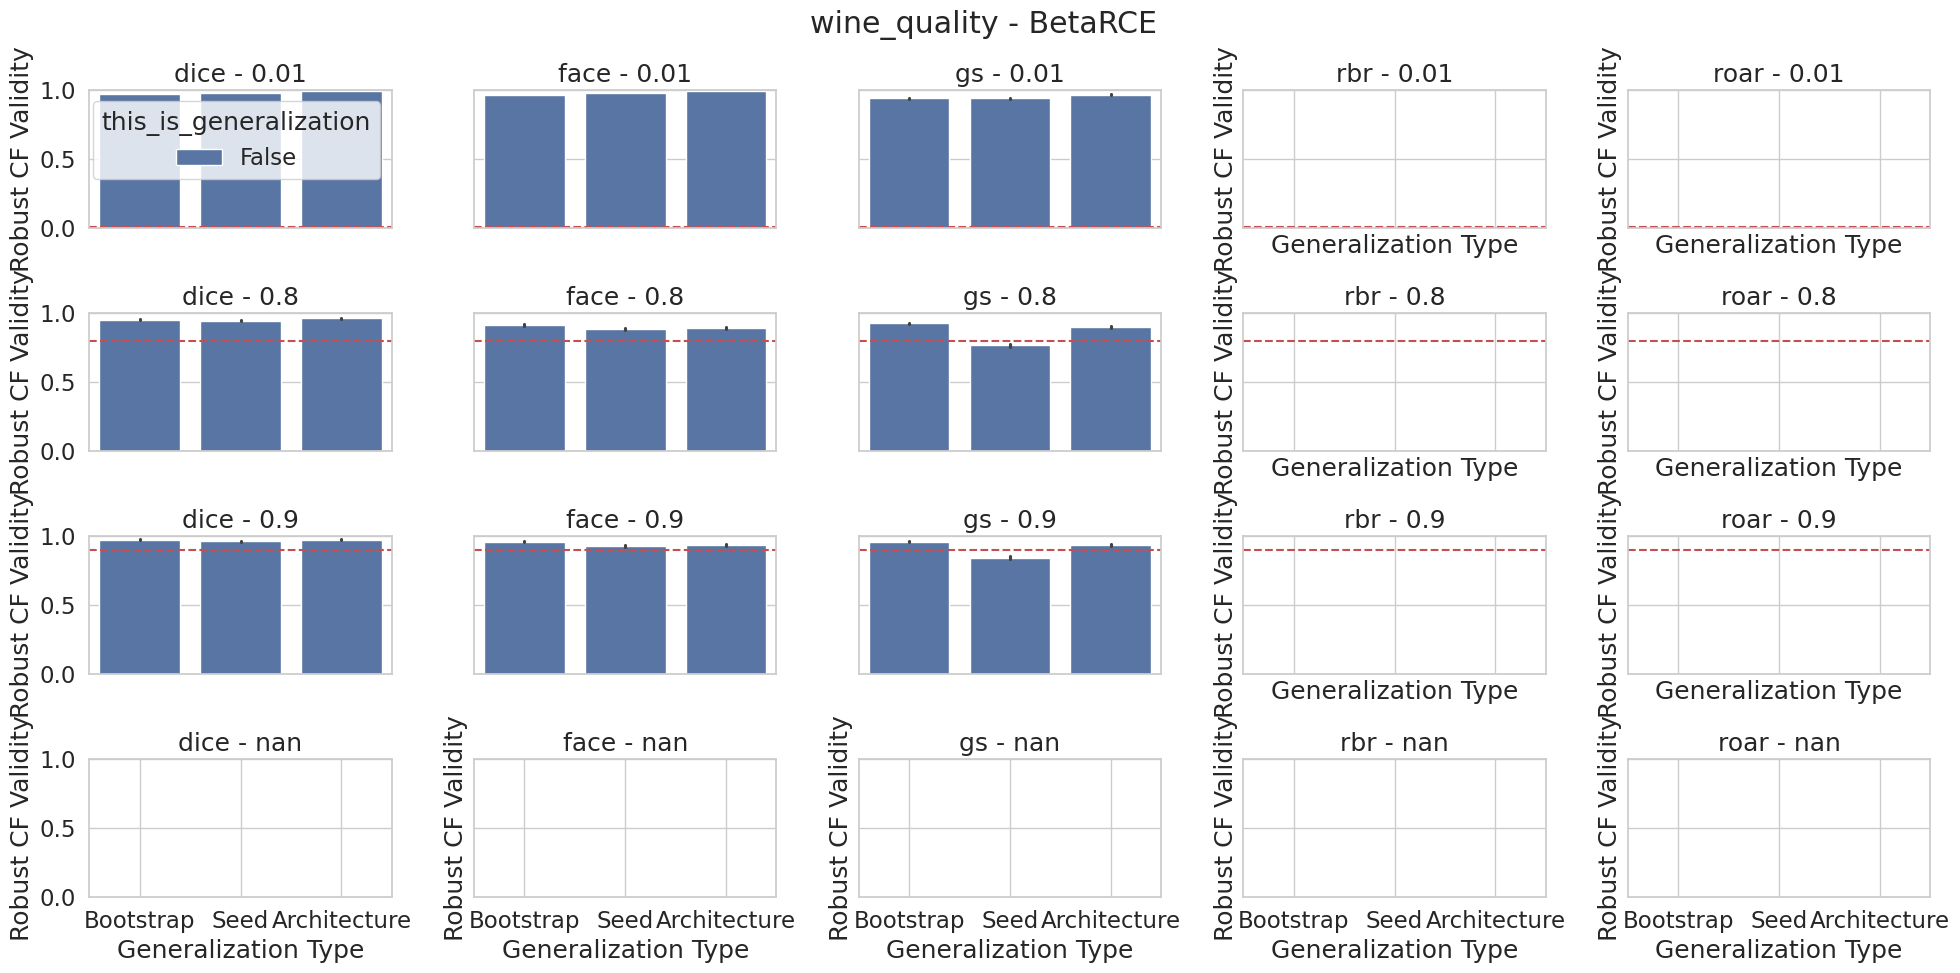

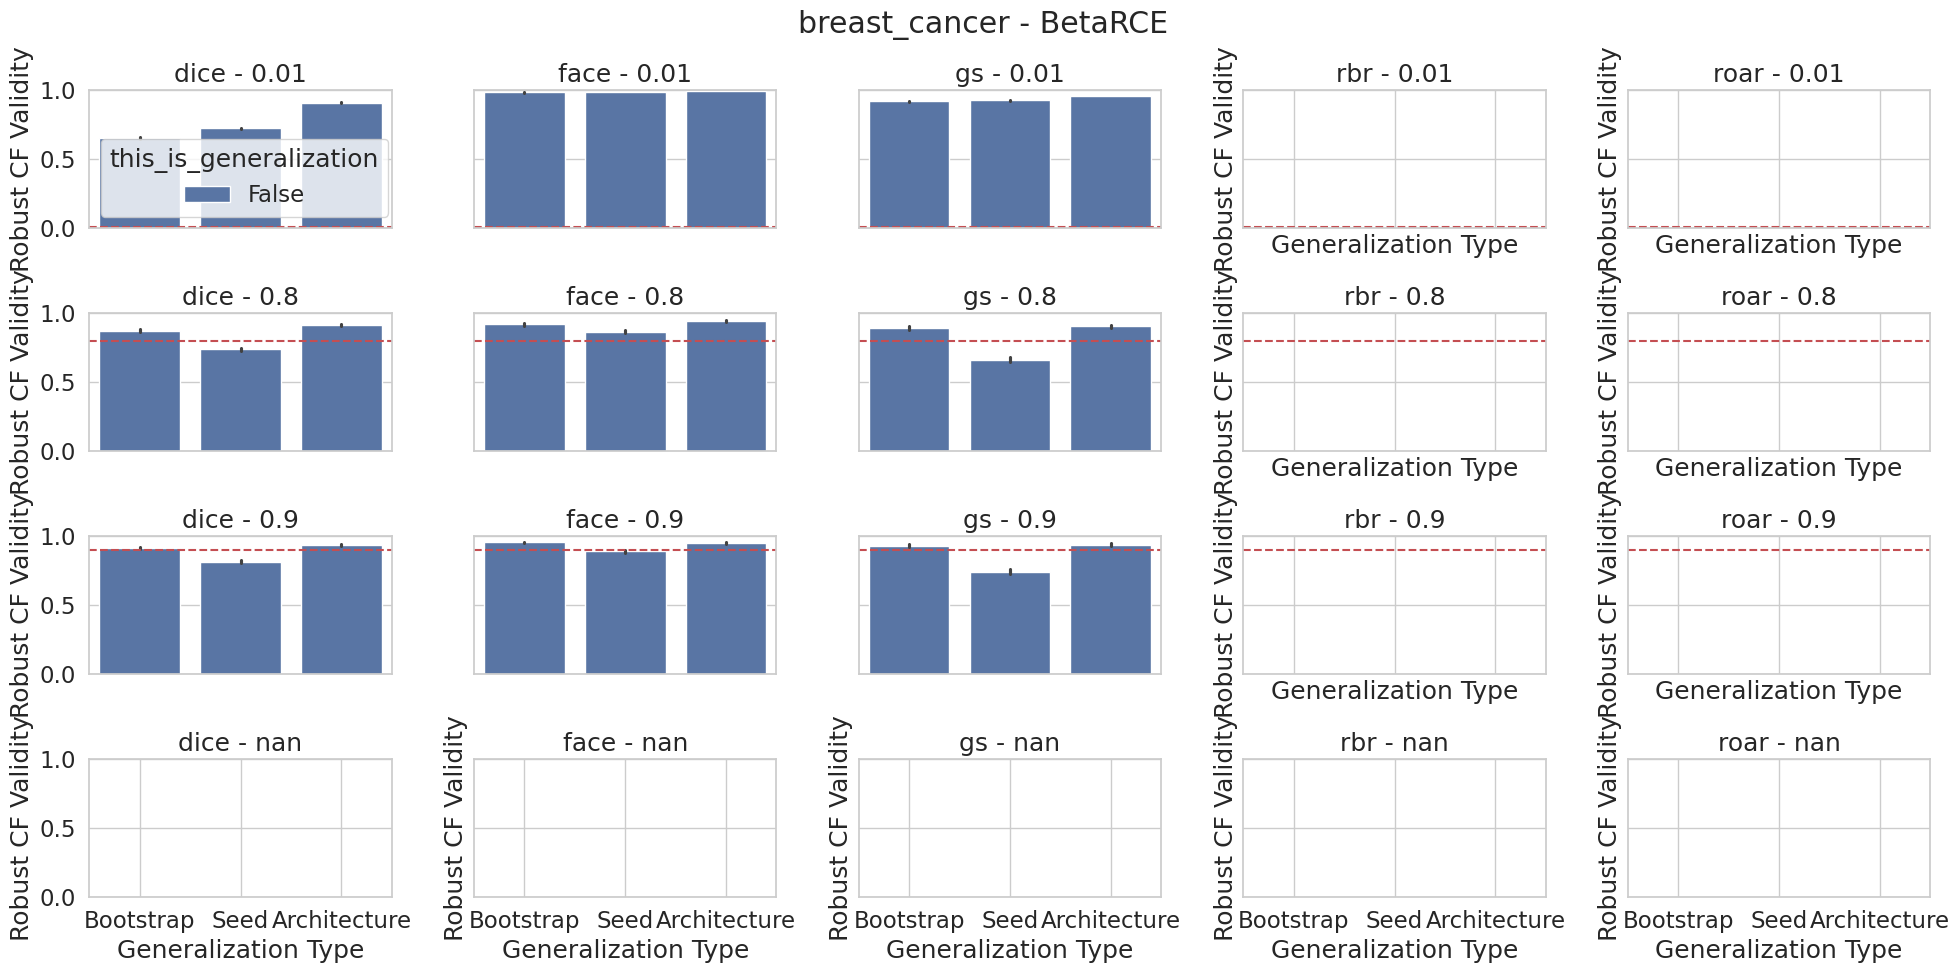

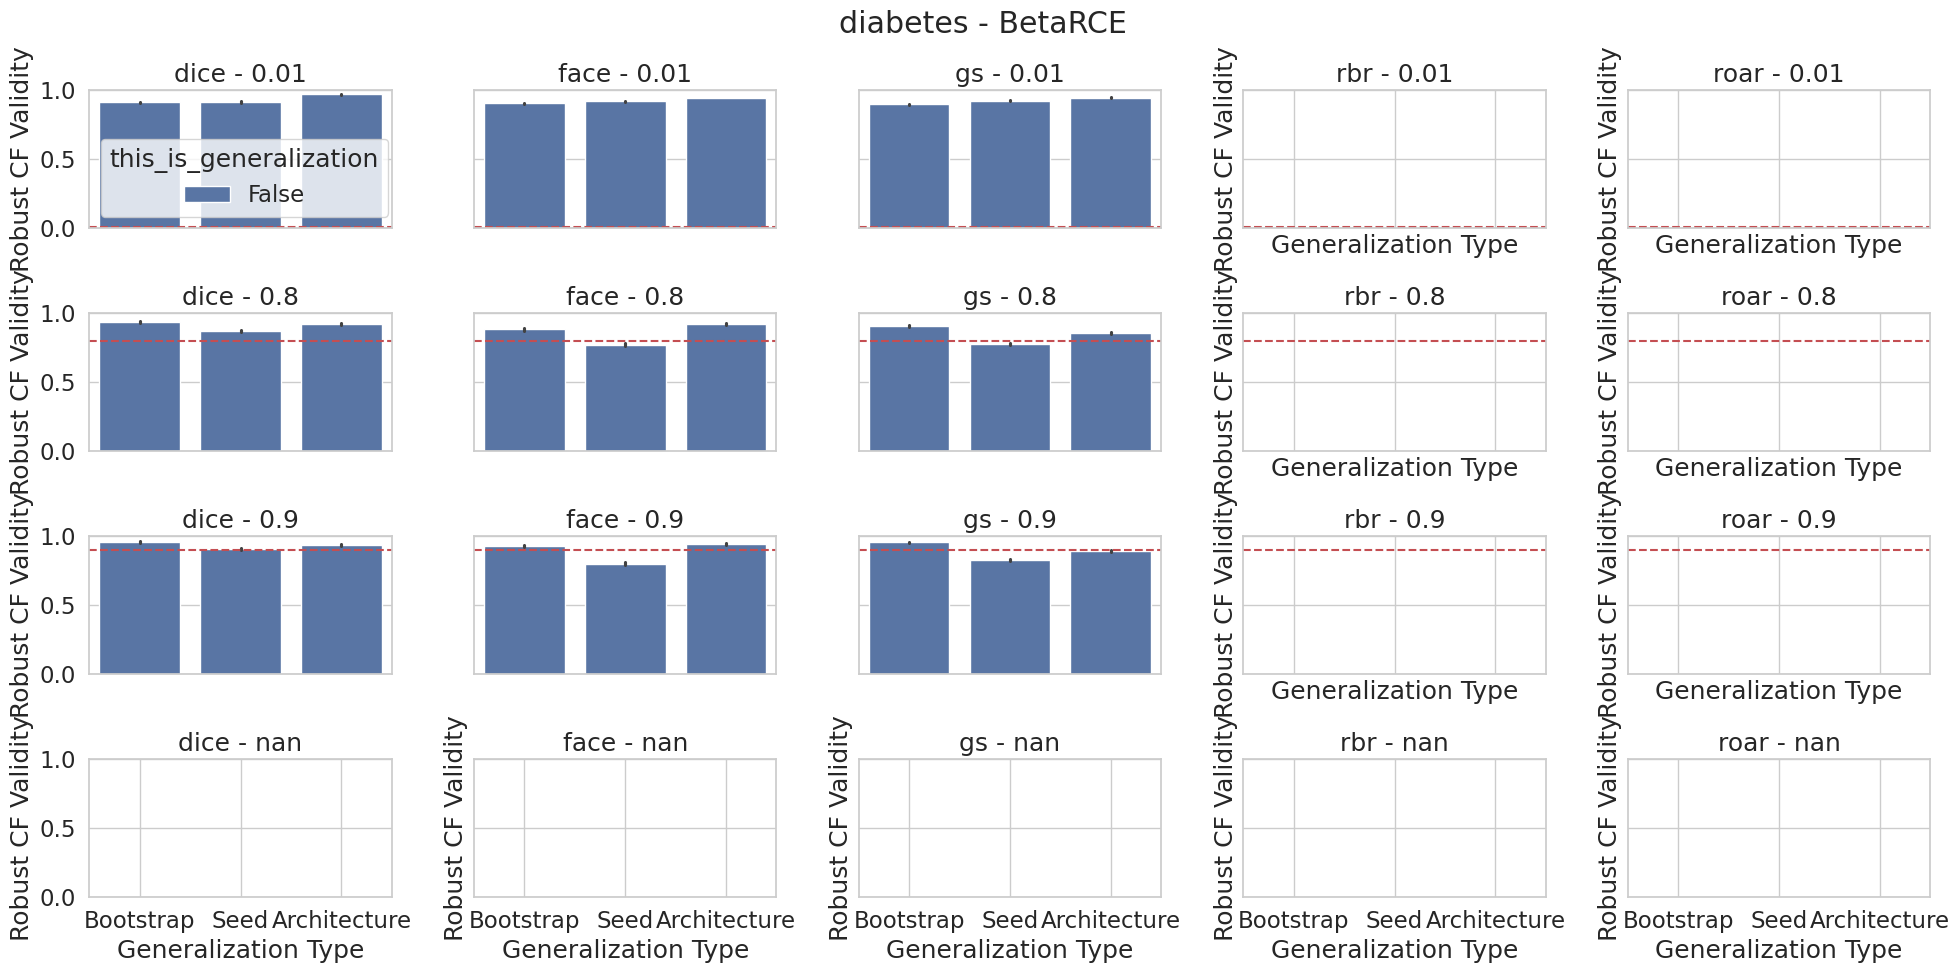

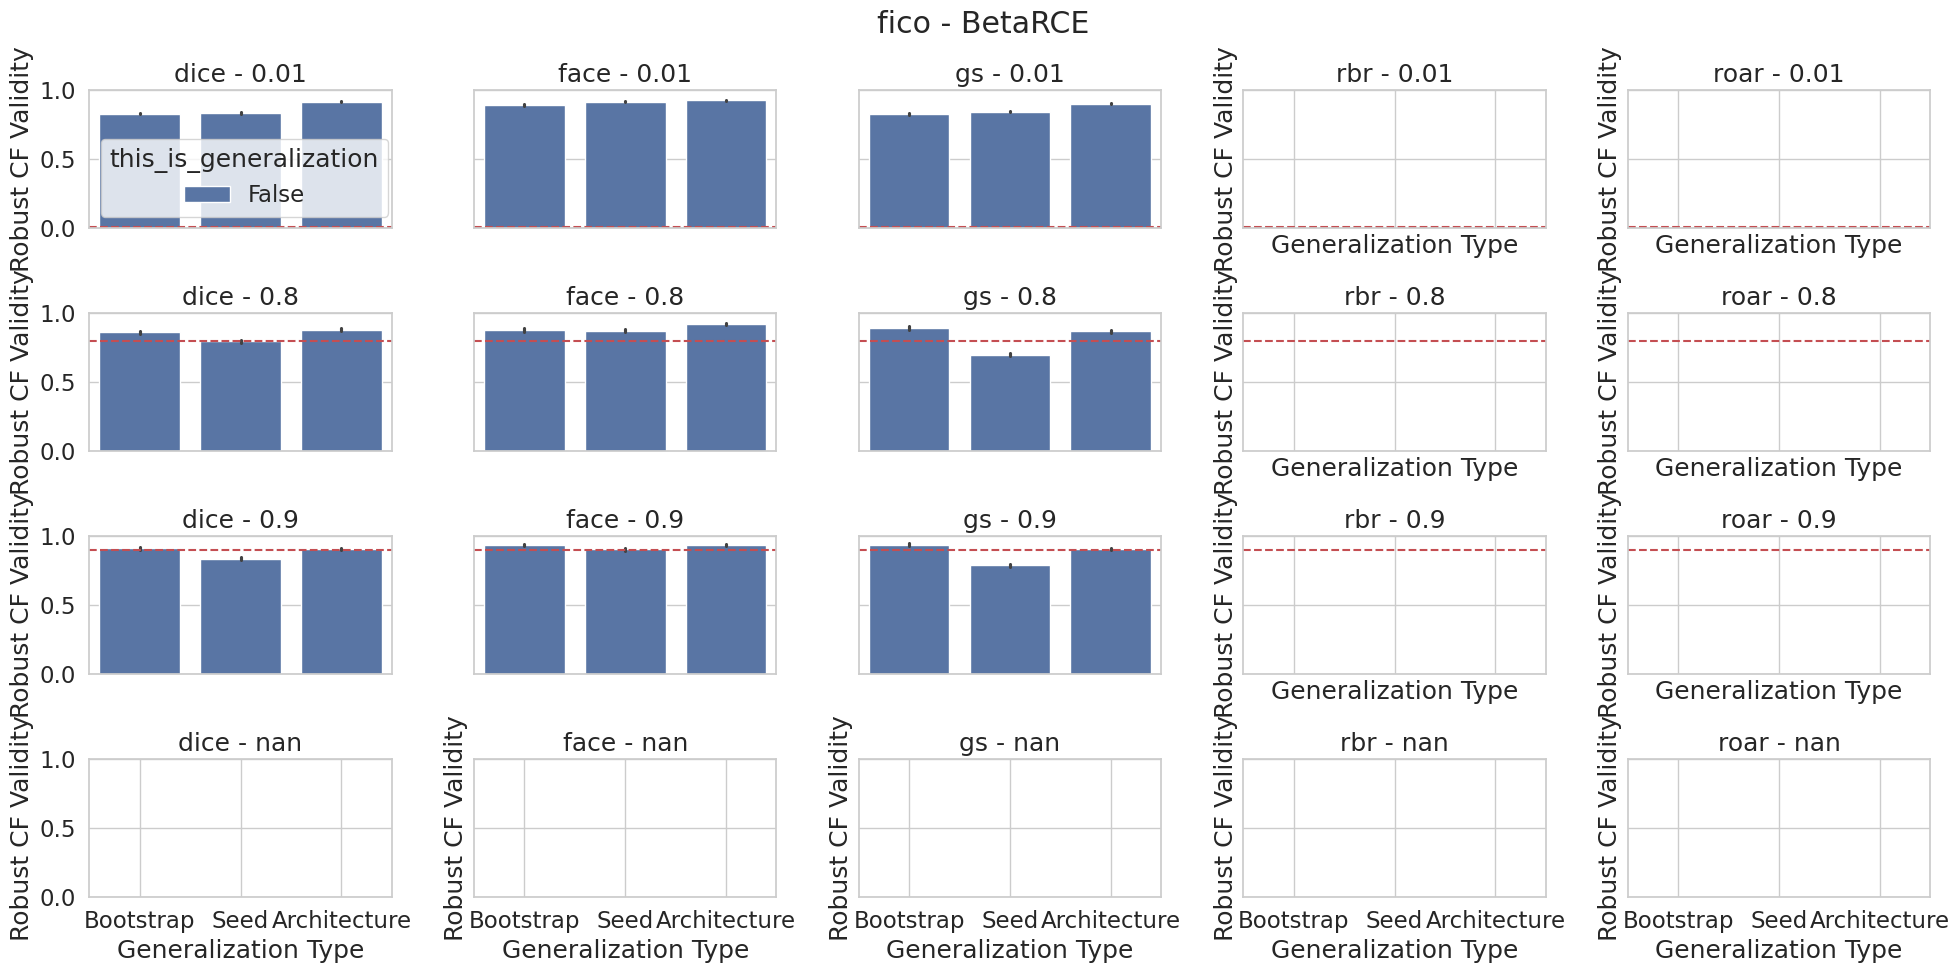

In [ ]:
agg_by = [
    "experiment_type",
    "experiment_generalization_type",
    "this_is_generalization",
    "base_cf_method",
    "delta_robustness",
]
agg_df = (
    betarce_df.groupby(agg_by)
    .agg(
        n=("robust_counterfactual_validity_model2", "count"),
        mean_robust_cf_validity=("robust_counterfactual_validity_model2", "mean"),
        std_robust_cf_validity=("robust_counterfactual_validity_model2", "std"),
        mean_base_cf_validity=("base_counterfactual_validity_model2", "mean"),
        std_base_cf_validity=("base_counterfactual_validity_model2", "std"),
    )
    .reset_index()
)

sns.set_theme(style="whitegrid", font_scale=1.5)

cols = sorted(betarce_df["base_cf_method"].unique())
rows = sorted(betarce_df["delta_robustness"].unique())
x = "experiment_type"
markers = "this_is_generalization"
y = "robust_counterfactual_validity_model2"
hue = "this_is_generalization"


for dataset in betarce_df["dataset_name"].unique():
    dataset_filtered_df = betarce_df[betarce_df["dataset_name"] == dataset]

    fig, ax = plt.subplots(
        len(rows), len(cols), figsize=(20, 10), sharex=True, sharey=True
    )

    for i, row in enumerate(rows):
        for j, col in enumerate(cols):
            df = dataset_filtered_df[
                (dataset_filtered_df["base_cf_method"] == col)
                & (dataset_filtered_df["delta_robustness"] == row)
            ]
            sns.barplot(
                data=df,
                x=x,
                y=y,
                hue=hue,
                ax=ax[i, j],
                legend=True if i == 0 and j == 0 else False,
            )

            # Draw a horizontal line at delta_robustness
            ax[i, j].axhline(row, color="r", linestyle="--")

            ax[i, j].set_title(f"{col} - {row}")
            ax[i, j].set_ylim(0, 1)
            ax[i, j].set_ylabel("Robust CF Validity")
            ax[i, j].set_xlabel("Generalization Type")

    plt.suptitle(f"{dataset} - BetaRCE")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

In [ ]:
just_base_df[["base_cf_method", "dataset_name"]].value_counts().sort_index()

# Pivot table
agg_by = ["dataset_name", "base_cf_method"]
agg_df = (
    just_base_df.groupby(agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        validity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("base_counterfactual_validity_model2", "mean"),
        robustness_std=("base_counterfactual_validity_model2", "std"),
        proximityL1=("base_counterfactual_proximityL1", "mean"),
        proximityL1_std=("base_counterfactual_proximityL1", "std"),
    )
    .reset_index()
)
agg_df.round(2)

dataset_name base_cf_method       n  validity  validity_std  robustness  \
0   breast_cancer           dice  218700      1.00          0.00        0.55   
1   breast_cancer           face   40500      1.00          0.00        0.90   
2   breast_cancer             gs    8100      1.00          0.00        0.52   
3   breast_cancer            rbr  218700      0.39          0.49        0.36   
4   breast_cancer           roar  145800      0.39          0.49        0.38   
5        diabetes           dice  216900      1.00          0.00        0.77   
6        diabetes           face   40260      1.00          0.00        0.76   
7        diabetes             gs    7200      1.00          0.00        0.64   
8        diabetes            rbr  212400      0.62          0.49        0.59   
9        diabetes           roar  145800      0.34          0.48        0.35   
10           fico           dice  218700      1.00          0.00        0.58   
11           fico           face   48600      1.00          0.00        0.75   
12           fico             gs    8100      1.00          0.00        0.52   
13           fico            rbr  218700      0.80          0.40        0.69   
14           fico           roar  145800      0.38          0.49        0.36   
15   wine_quality           dice  218700      1.00          0.00        0.75   
16   wine_quality           face   48390      1.00          0.00        0.77   
17   wine_quality             gs    8100      1.00          0.00        0.53   
18   wine_quality            rbr  218700      0.76          0.43        0.75   
19   wine_quality           roar  145800      0.77          0.42        0.74   

    robustness_std  proximityL1  proximityL1_std  
0             0.50         1.62             0.93  
1             0.30         3.43             1.41  
2             0.50         3.09             1.92  
3             0.48         2.65             1.28  
4             0.49         9.27             9.79  
5             0.42         0.87             0.40  
6             0.43         0.85             0.32  
7             0.48         0.60             0.42  
8             0.49         0.72             0.30  
9             0.48         5.53             6.31  
10            0.49         1.24             0.74  
11            0.43         2.23             0.66  
12            0.50         1.95             1.38  
13            0.46         1.66             0.69  
14            0.48         9.13             9.90  
15            0.43         0.67             0.40  
16            0.42         0.53             0.24  
17            0.50         0.29             0.23  
18            0.43         0.51             0.21  
19            0.44         8.39             7.91

In [ ]:
robust_params_map = {
    "robx": ["beta_confidence", "delta_robustness"],
    "betarob": ["beta_confidence", "delta_robustness"],
}
base_params_map = {
    "dice": ["proximity_weight", "diversity_weight", "sparsity_weight"],
    "face": ["mode", "fraction"],
    "roar": ["delta_max", "lr", "norm"],
    "rbr": ["perturb_radius", "delta_plus", "sigma"],
    "gs": ["max_iter", "n_search_samples", "p_norm", "step", "target_proba"],
}

just_base_df["sigma"].value_counts(dropna=False)

NaN    1684800
0.5     291600
1.5     291600
1.0     291600
Name: sigma, dtype: int64

In [ ]:
just_base_df["base_cf_hp_name"] = [None] * len(just_base_df)

for base_method, params in base_params_map.items():
    for row in just_base_df.itertuples():
        if row.base_cf_method == base_method:
            hp_name = base_method + "-".join(
                [f"{param}={getattr(row, param)}" for param in params]
            )
            just_base_df.at[row.Index, "base_cf_hp_name"] = hp_name

just_base_df["base_cf_hp_name"].value_counts(dropna=False)

just_base_df[["base_cf_hp_name", "dataset_name"]].value_counts().sort_index()

base_cf_hp_name                                                       dataset_name 
diceproximity_weight=0.05-diversity_weight=0.05-sparsity_weight=0.05  breast_cancer    8100
                                                                      diabetes         8100
                                                                      fico             8100
                                                                      wine_quality     8100
diceproximity_weight=0.05-diversity_weight=0.05-sparsity_weight=0.1   breast_cancer    8100
                                                                                       ... 
roardelta_max=0.1-lr=0.1-norm=1.0                                     wine_quality     8100
roardelta_max=0.1-lr=0.1-norm=2.0                                     breast_cancer    8100
                                                                      diabetes         8100
                                                                      fico             8

In [ ]:
# Pivot table
agg_by = ["dataset_name", "base_cf_method", "base_cf_hp_name"]
base_agg_df = (
    just_base_df.groupby(agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("base_counterfactual_validity_model2", "mean"),
        robustness_std=("base_counterfactual_validity_model2", "std"),
        proximityL1=("base_counterfactual_proximityL1", "mean"),
        proximityL1_std=("base_counterfactual_proximityL1", "std"),
        proximityL2=("base_counterfactual_proximityL2", "mean"),
        proximityL2_std=("base_counterfactual_proximityL2", "std"),
        plausibility=("base_counterfactual_plausibility", "mean"),
        plausibility_std=("base_counterfactual_plausibility", "std"),
        dpow=("base_counterfactual_discriminative_power", "mean"),
        dpow_std=("base_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

# Select top 1 mean_base_cf_validity out base_cf_method
base_agg_df = (
    base_agg_df.sort_values("robustness", ascending=False)
    .groupby(["dataset_name", "base_cf_method"])
    .head(1)
    .sort_values("dataset_name")
)

base_agg_df.round(2)

dataset_name base_cf_method  \
29   breast_cancer           face   
33   breast_cancer             gs   
4    breast_cancer           dice   
74   breast_cancer           roar   
45   breast_cancer            rbr   
106       diabetes           face   
82        diabetes           dice   
145       diabetes           roar   
112       diabetes             gs   
133       diabetes            rbr   
185           fico           face   
203           fico            rbr   
158           fico           dice   
191           fico             gs   
222           fico           roar   
302   wine_quality           roar   
289   wine_quality            rbr   
270   wine_quality             gs   
264   wine_quality           face   
238   wine_quality           dice   

                                       base_cf_hp_name     n  vailidity  \
29                       facemode=epsilon-fraction=0.5  8100       1.00   
33   gsmax_iter=100.0-n_search_samples=100.0-p_norm...  8100       1.00   
4    diceproximity_weight=0.05-diversity_weight=0.1...  8100       1.00   
74                  roardelta_max=0.1-lr=0.01-norm=2.0  8100       0.62   
45      rbrperturb_radius=0.2-delta_plus=0.0-sigma=1.5  8100       0.40   
106                      facemode=epsilon-fraction=0.1  8070       1.00   
82   diceproximity_weight=0.05-diversity_weight=0.1...  8100       1.00   
145                 roardelta_max=0.01-lr=0.1-norm=2.0  8100       0.52   
112  gsmax_iter=100.0-n_search_samples=100.0-p_norm...  7200       1.00   
133     rbrperturb_radius=0.3-delta_plus=0.0-sigma=1.5  7200       0.65   
185                      facemode=epsilon-fraction=0.1  8100       1.00   
203     rbrperturb_radius=0.2-delta_plus=0.0-sigma=1.5  8100       0.84   
158  diceproximity_weight=0.05-diversity_weight=0.0...  8100       1.00   
191  gsmax_iter=100.0-n_search_samples=100.0-p_norm...  8100       1.00   
222                roardelta_max=0.01-lr=0.05-norm=2.0  8100       0.73   
302                 roardelta_max=0.01-lr=0.1-norm=1.0  8100       0.82   
289     rbrperturb_radius=0.3-delta_plus=0.0-sigma=0.5  8100       0.82   
270  gsmax_iter=100.0-n_search_samples=100.0-p_norm...  8100       1.00   
264                      facemode=epsilon-fraction=0.1  8100       1.00   
238  diceproximity_weight=0.05-diversity_weight=0.0...  8100       1.00   

     validity_std  robustness  robustness_std  proximityL1  proximityL1_std  \
29           0.00        0.91            0.28         3.29             1.36   
33           0.00        0.52            0.50         3.09             1.92   
4            0.00        0.55            0.50         1.63             0.93   
74           0.48        0.62            0.49         8.11             2.70   
45           0.49        0.39            0.49         2.63             1.29   
106          0.00        0.78            0.41         0.96             0.34   
82           0.00        0.77            0.42         0.87             0.40   
145          0.50        0.51            0.50        19.34             5.94   
112          0.00        0.64            0.48         0.60             0.42   
133          0.48        0.63            0.48         0.70             0.31   
185          0.00        0.77            0.42         2.39             0.67   
203          0.37        0.76            0.43         1.72             0.72   
158          0.00        0.64            0.48         1.16             0.68   
191          0.00        0.52            0.50         1.95             1.38   
222          0.44        0.69            0.46        28.52            11.28   
302          0.38        0.80            0.40        13.50             2.34   
289          0.38        0.81            0.39         0.51             0.20   
270          0.00        0.53            0.50         0.29             0.23   
264          0.00        0.82            0.39         0.58             0.26   
238          0.00        0.79            0.41         0.66             0

In [ ]:
betarce_df["robust_cf_hp_name"] = [None] * len(betarce_df)

for robust_cf_method, params in robust_params_map.items():
    for row in betarce_df.itertuples():
        if row.robust_cf_method == robust_cf_method:
            hp_name = robust_cf_method + "-".join(
                [f"{param}={getattr(row, param)}" for param in params]
            )
            betarce_df.at[row.Index, "robust_cf_hp_name"] = hp_name

betarce_df["robust_cf_hp_name"].value_counts(dropna=False)

betarce_df[["robust_cf_hp_name", "dataset_name"]].value_counts().sort_index()

robust_cf_hp_name                                 dataset_name 
betarobbeta_confidence=0.9-delta_robustness=0.8   breast_cancer      11246
                                                  diabetes           16200
                                                  fico               14610
                                                  wine_quality       16200
betarobbeta_confidence=0.9-delta_robustness=0.9   breast_cancer      11160
                                                  diabetes           16200
                                                  fico               14591
                                                  wine_quality       16200
betarobbeta_confidence=0.95-delta_robustness=0.8  breast_cancer      22095
                                                  diabetes           40011
                                                  fico               21815
                                                  wine_quality       40260
betarobbeta_confidence=0.95-delta_ro

In [ ]:
# Pivot table
robust_agg_by = [
    "dataset_name",
    "base_cf_method",
    "experiment_type",
    "experiment_generalization_type",
    "robust_cf_method",
    "robust_cf_hp_name",
    "delta_robustness",
    "beta_confidence",
]
robust_agg_df = (
    betarce_df.groupby(robust_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        lower_bound_beta=("lower_bound_beta", "mean"),
        lower_bound_beta_std=("lower_bound_beta", "std"),
        upper_bound_beta=("upper_bound_beta", "mean"),
        upper_bound_beta_std=("upper_bound_beta", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

# Select top 1
robust_agg_df = (
    robust_agg_df.sort_values("robustness", ascending=False)
    .groupby(["dataset_name", "base_cf_method", "robust_cf_method"])
    .head(1000000)
    .sort_values("dataset_name")
)
robust_agg_df.round(2)

dataset_name base_cf_method experiment_type  \
13   breast_cancer           dice       Bootstrap   
22   breast_cancer           dice            Seed   
37   breast_cancer           face       Bootstrap   
8    breast_cancer           dice    Architecture   
63   breast_cancer             gs       Bootstrap   
..             ...            ...             ...   
292   wine_quality             gs            Seed   
254   wine_quality           face    Architecture   
229   wine_quality           dice    Architecture   
262   wine_quality           face       Bootstrap   
280   wine_quality             gs    Architecture   

    experiment_generalization_type robust_cf_method  \
13                       Bootstrap             robx   
22                            Seed             robx   
37                       Bootstrap             robx   
8                     Architecture             robx   
63                       Bootstrap             robx   
..                             ...              ...   
292                           Seed          betarob   
254                   Architecture             robx   
229                   Architecture             robx   
262                      Bootstrap             robx   
280                   Architecture             robx   

                                   robust_cf_hp_name  delta_robustness  \
13     robxbeta_confidence=0.4-delta_robustness=0.01              0.01   
22     robxbeta_confidence=0.4-delta_robustness=0.01              0.01   
37     robxbeta_confidence=0.5-delta_robustness=0.01              0.01   
8      robxbeta_confidence=0.8-delta_robustness=0.01              0.01   
63     robxbeta_confidence=0.6-delta_robustness=0.01              0.01   
..                                               ...               ...   
292  betarobbeta_confidence=0.9-delta_robustness=0.9              0.90   
254    robxbeta_confidence=0.4-delta_robustness=0.01              0.01   
229    robxbeta_confidence=0.4-delta_robustness=0.01              0.01   
262    robxbeta_confidence=0.5-delta_robustness=0.01              0.01   
280    robxbeta_confidence=0.7-delta_robustness=0.01              0.01   

     beta_confidence     n  vailidity  validity_std  robustness  \
13               0.4  4500        1.0           0.0        0.40   
22               0.4  4500        1.0           0.0        0.44   
37               0.5  4500        1.0           0.0        0.98   
8                0.8  4500        1.0           0.0        1.00   
63               0.6  4500        1.0           0.0        0.97   
..               ...   ...        ...           ...         ...   
292              0.9  2700        1.0           0.0        0.88   
254              0.4  4500        1.0           0.0        0.96   
229              0.4  4500        1.0           0.0        0.96   
262              0.5  4500        1.0           0.0        0.97   
280              0.7  4500        1.0           0.0        1.00   

     robustness_std  lower_bound_beta  lower_bound_beta_std  upper_bound_beta  \
13             0.49               NaN                   NaN               NaN   
22             0.50               NaN                   NaN               NaN   
37             0.12               NaN                   NaN               NaN   
8              0.03               NaN                   NaN               NaN   
63             0.17               NaN                   NaN               NaN   
..              ...               ...                   ...               ...   
292            0.33              0.92                  0.03               1.0   
254            0.19               NaN                   NaN               NaN   
229            0.19               NaN                   NaN               NaN   
262            0.16               NaN                   NaN               NaN   
280            0.00               NaN                   NaN               NaN   

     upper_bound_beta_std  proximityL1  p

In [ ]:
robx_df["robust_cf_hp_name"] = [None] * len(robx_df)

for robust_cf_method, params in robust_params_map.items():
    for row in robx_df.itertuples():
        if row.robust_cf_method == robust_cf_method:
            hp_name = robust_cf_method + "-".join(
                [f"{param}={getattr(row, param)}" for param in params]
            )
            robx_df.at[row.Index, "robust_cf_hp_name"] = hp_name

robx_df["robust_cf_hp_name"].value_counts(dropna=False)

robx_df[["robust_cf_hp_name", "dataset_name"]].value_counts().sort_index()

robust_cf_hp_name                              dataset_name 
robxbeta_confidence=0.4-delta_robustness=0.01  breast_cancer    40500
                                               diabetes         40500
                                               fico             40500
                                               wine_quality     40500
robxbeta_confidence=0.5-delta_robustness=0.01  breast_cancer    40500
                                               diabetes         40500
                                               fico             40500
                                               wine_quality     40500
robxbeta_confidence=0.6-delta_robustness=0.01  breast_cancer    40500
                                               diabetes         40500
                                               fico             40500
                                               wine_quality     40500
robxbeta_confidence=0.7-delta_robustness=0.01  breast_cancer    64800
                             

In [ ]:
# Pivot table
robx_agg_by = [
    "dataset_name",
    "base_cf_method",
    "experiment_type",
    "robust_cf_method",
    "robust_cf_hp_name",
    "delta_robustness",
    "beta_confidence",
]
robx_agg_df = (
    robx_df.groupby(robust_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

# Select top 1
robx_agg_df = (
    robx_agg_df.sort_values("robustness", ascending=False)
    .groupby(["dataset_name", "base_cf_method", "robust_cf_method"])
    .head(1000000)
    .sort_values(["dataset_name", "base_cf_method", "robust_cf_method"])
)
robx_agg_df.round(2)

dataset_name base_cf_method experiment_type  \
9    breast_cancer           dice       Bootstrap   
4    breast_cancer           dice    Architecture   
3    breast_cancer           dice    Architecture   
8    breast_cancer           dice       Bootstrap   
14   breast_cancer           dice            Seed   
..             ...            ...             ...   
166   wine_quality             gs    Architecture   
171   wine_quality             gs       Bootstrap   
175   wine_quality             gs            Seed   
165   wine_quality             gs    Architecture   
170   wine_quality             gs       Bootstrap   

    experiment_generalization_type robust_cf_method  \
9                        Bootstrap             robx   
4                     Architecture             robx   
3                     Architecture             robx   
8                        Bootstrap             robx   
14                            Seed             robx   
..                             ...              ...   
166                   Architecture             robx   
171                      Bootstrap             robx   
175                           Seed             robx   
165                   Architecture             robx   
170                      Bootstrap             robx   

                                 robust_cf_hp_name  delta_robustness  \
9    robxbeta_confidence=0.8-delta_robustness=0.01              0.01   
4    robxbeta_confidence=0.8-delta_robustness=0.01              0.01   
3    robxbeta_confidence=0.7-delta_robustness=0.01              0.01   
8    robxbeta_confidence=0.7-delta_robustness=0.01              0.01   
14   robxbeta_confidence=0.8-delta_robustness=0.01              0.01   
..                                             ...               ...   
166  robxbeta_confidence=0.5-delta_robustness=0.01              0.01   
171  robxbeta_confidence=0.5-delta_robustness=0.01              0.01   
175  robxbeta_confidence=0.4-delta_robustness=0.01              0.01   
165  robxbeta_confidence=0.4-delta_robustness=0.01              0.01   
170  robxbeta_confidence=0.4-delta_robustness=0.01              0.01   

     beta_confidence     n  vailidity  validity_std  robustness  \
9                0.8  4500        1.0           0.0        0.99   
4                0.8  4500        1.0           0.0        0.99   
3                0.7  7200        1.0           0.0        0.98   
8                0.7  7200        1.0           0.0        0.98   
14               0.8  4500        1.0           0.0        0.97   
..               ...   ...        ...           ...         ...   
166              0.5  4500        1.0           0.0        0.99   
171              0.5  4500        1.0           0.0        0.97   
175              0.4  4500        1.0           0.0        0.97   
165              0.4  4500        1.0           0.0        0.97   
170              0.4  4500        1.0           0.0        0.92   

     robustness_std  proximityL1  proximityL1_std  proximityL2  \
9              0.09         3.24             1.34         0.86   
4              0.10         3.15             1.32         0.87   
3              0.14         2.85             1.28         0.86   
8              0.14         2.90             1.29         0.86   
14             0.16         3.22             1.36         0.87   
..              ...          ...              ...          ...   
166            0.10         0.68             0.24         0.28   
171            0.17         0.71             0.25         0.30   
175            0.17         0.58             0.24         0.24   
165            0.18         0.55             0.23         0.23   
170            0.26         0.60             0.27         0.24   

     proximityL2_std  plausibility  plausibility_std  dpow  dpow_std  
9               0.32          0.61              0.26  0.73      0.26  
4               0.32          0.63              0.30  0.71      0.29  
3               0.33          0.

In [ ]:
# datasets = betarce_df['dataset_name'].unique()
# base_methods = betarce_df['base_cf_method'].unique()
# base_experiment_types = betarce_df['experiment_type'].unique()

# base_methods_jsut_base = just_base_df['base_cf_method'].unique()
# robx_methods = robx_df['robust_cf_method'].unique()


# colors = {l:c for l, c in zip([*base_experiment_types, *base_methods_jsut_base, *robx_methods], colors_discrete)}


# Z_SCORE = 1.96


# for i, dataset in enumerate(datasets):
#     fig, ax = plt.subplots(len(base_methods), len(base_experiment_types), figsize=(20, 15), sharex=True, sharey=True)

#     for j, base_method in enumerate(base_methods):
#         for k, experiment_type in enumerate(base_experiment_types):
#             df = robust_agg_df[
#                 (robust_agg_df['dataset_name'] == dataset) &
#                 (robust_agg_df['base_cf_method'] == base_method) &
#                 (robust_agg_df['experiment_type'] == experiment_type)
#             ]

#             # sort df by delta robustness
#             df = df.sort_values('delta_robustness')

#             for ex_gen_type in df['experiment_generalization_type'].unique():
#                 df_ex_gen_type = df[df['experiment_generalization_type'] == ex_gen_type]
#                 # Plot robustness vs delta_robustness
#                 # ax[j, k].plot(
#                 #     df_ex_gen_type['delta_robustness'],
#                 #     df_ex_gen_type['robustness'],
#                 #     label=ex_gen_type if ex_gen_type != experiment_type else 'Original',
#                 #     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                 #     marker=markers[j],
#                 #     linewidth=3,
#                 # )
#                 ax[j, k].errorbar(
#                     df_ex_gen_type['delta_robustness'],
#                     df_ex_gen_type['robustness'],
#                     label=ex_gen_type if ex_gen_type != experiment_type else 'Original',
#                     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                     linewidth=3,
#                 )
#                 # Add CI around the mean
#                 ax[j, k].fill_between(
#                     df_ex_gen_type['delta_robustness'],
#                     df_ex_gen_type['robustness'] - Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                     df_ex_gen_type['robustness'] + Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
#                     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
#                     alpha=0.2
#                 )

#             #  x = y line
#             min_Delta = df['delta_robustness'].min()
#             max_Delta = df['delta_robustness'].max()
#             ax[j, k].plot([min_Delta, max_Delta], [min_Delta, max_Delta], 'k--', label='y=x')


#             # Add just_base_df
#             for ll, jst_base_method in enumerate(base_agg_df['base_cf_method'].unique()):
#                 df = base_agg_df[
#                     (base_agg_df['dataset_name'] == dataset) &
#                     (base_agg_df['base_cf_method'] == jst_base_method)
#                 ]

#                 if len(df) > 0:
#                     # Plot horizontally the robustness of a base method
#                     ax[j, k].axhline(df['robustness'].values[0],
#                         color=colors[jst_base_method],
#                         linestyle=linestyles[ll],
#                         label=f'{jst_base_method} - Base',
#                         linewidth=2,
#                     )

#                     # Add CI around the mean
#                     ax[j, k].fill_between(
#                         [min_Delta, max_Delta],
#                         df['robustness'].values[0] - Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         df['robustness'].values[0] + Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         color=colors[jst_base_method],
#                         alpha=0.2
#                     )

#             # Add robx
#             for ll, robx_method in enumerate(robx_agg_df['robust_cf_method'].unique()):
#                 df = robx_agg_df[
#                     (robx_agg_df['dataset_name'] == dataset) &
#                     (robx_agg_df['base_cf_method'] == base_method) &
#                     (robx_agg_df['experiment_type'] == experiment_type) &
#                     (robx_agg_df['robust_cf_method'] == robx_method)
#                 ]

#                 if len(df) > 0:
#                     # Plot horizontally the robustness of a base method
#                     ax[j, k].axhline(df['robustness'].values[0],
#                         color=colors[robx_method],
#                         linestyle=linestyles[3],
#                         label=f'{robx_method} - RobX',
#                         linewidth=2,
#                     )

#                     # Add CI around the mean
#                     ax[j, k].fill_between(
#                         [min_Delta, max_Delta],
#                         df['robustness'].values[0] - Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         df['robustness'].values[0] + Z_SCORE * df['robustness_std'].values[0] / np.sqrt(df['n'].values[0]),
#                         color=colors[robx_method],
#                         alpha=0.2
#                     )

#             ax[j, k].set_title(f'{base_method} - {experiment_type}', fontsize=10)

#             ax[j, k].set_ylabel('Emp. Robustness', fontsize=10)
#             ax[j, k].set_xlabel('Delta', fontsize=10)

#             # Add legend to the below of the plot
#             ax[j, k].legend(loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=10)

#     plt.suptitle(f'BetaRCE -- {dataset}', fontsize=15, y=1)
#     plt.tight_layout()
#     plt.show()



In [22]:
robust_agg_df

dataset_name base_cf_method experiment_type  \
13   breast_cancer           dice       Bootstrap   
22   breast_cancer           dice            Seed   
37   breast_cancer           face       Bootstrap   
8    breast_cancer           dice    Architecture   
63   breast_cancer             gs       Bootstrap   
..             ...            ...             ...   
292   wine_quality             gs            Seed   
254   wine_quality           face    Architecture   
229   wine_quality           dice    Architecture   
262   wine_quality           face       Bootstrap   
280   wine_quality             gs    Architecture   

    experiment_generalization_type robust_cf_method  \
13                       Bootstrap             robx   
22                            Seed             robx   
37                       Bootstrap             robx   
8                     Architecture             robx   
63                       Bootstrap             robx   
..                             ...              ...   
292                           Seed          betarob   
254                   Architecture             robx   
229                   Architecture             robx   
262                      Bootstrap             robx   
280                   Architecture             robx   

                                   robust_cf_hp_name  delta_robustness  \
13     robxbeta_confidence=0.4-delta_robustness=0.01              0.01   
22     robxbeta_confidence=0.4-delta_robustness=0.01              0.01   
37     robxbeta_confidence=0.5-delta_robustness=0.01              0.01   
8      robxbeta_confidence=0.8-delta_robustness=0.01              0.01   
63     robxbeta_confidence=0.6-delta_robustness=0.01              0.01   
..                                               ...               ...   
292  betarobbeta_confidence=0.9-delta_robustness=0.9              0.90   
254    robxbeta_confidence=0.4-delta_robustness=0.01              0.01   
229    robxbeta_confidence=0.4-delta_robustness=0.01              0.01   
262    robxbeta_confidence=0.5-delta_robustness=0.01              0.01   
280    robxbeta_confidence=0.7-delta_robustness=0.01              0.01   

     beta_confidence     n  vailidity  validity_std  robustness  \
13               0.4  4500        1.0           0.0    0.398444   
22               0.4  4500        1.0           0.0    0.439556   
37               0.5  4500        1.0           0.0    0.984444   
8                0.8  4500        1.0           0.0    0.999111   
63               0.6  4500        1.0           0.0    0.971111   
..               ...   ...        ...           ...         ...   
292              0.9  2700        1.0           0.0    0.875185   
254              0.4  4500        1.0           0.0    0.963778   
229              0.4  4500        1.0           0.0    0.961333   
262              0.5  4500        1.0           0.0    0.973556   
280              0.7  4500        1.0           0.0    1.000000   

     robustness_std  lower_bound_beta  lower_bound_beta_std  upper_bound_beta  \
13         0.489632               NaN                   NaN               NaN   
22         0.496388               NaN                   NaN               NaN   
37         0.123762               NaN                   NaN               NaN   
8          0.029804               NaN                   NaN               NaN   
63         0.167513               NaN                   NaN               NaN   
..              ...               ...                   ...               ...   
292        0.330570          0.915099               0.02894          0.997387   
254        0.186863               NaN                   NaN               NaN   
229        0.192821               NaN                   NaN               NaN   
262        0.160471               NaN                   NaN               NaN   
280        0.000000               NaN                   NaN               NaN   

     upper_bound_beta_std  proximityL1  p

/tmp/ipykernel_1462223/2397461146.py:137: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  fig.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, -0.1),


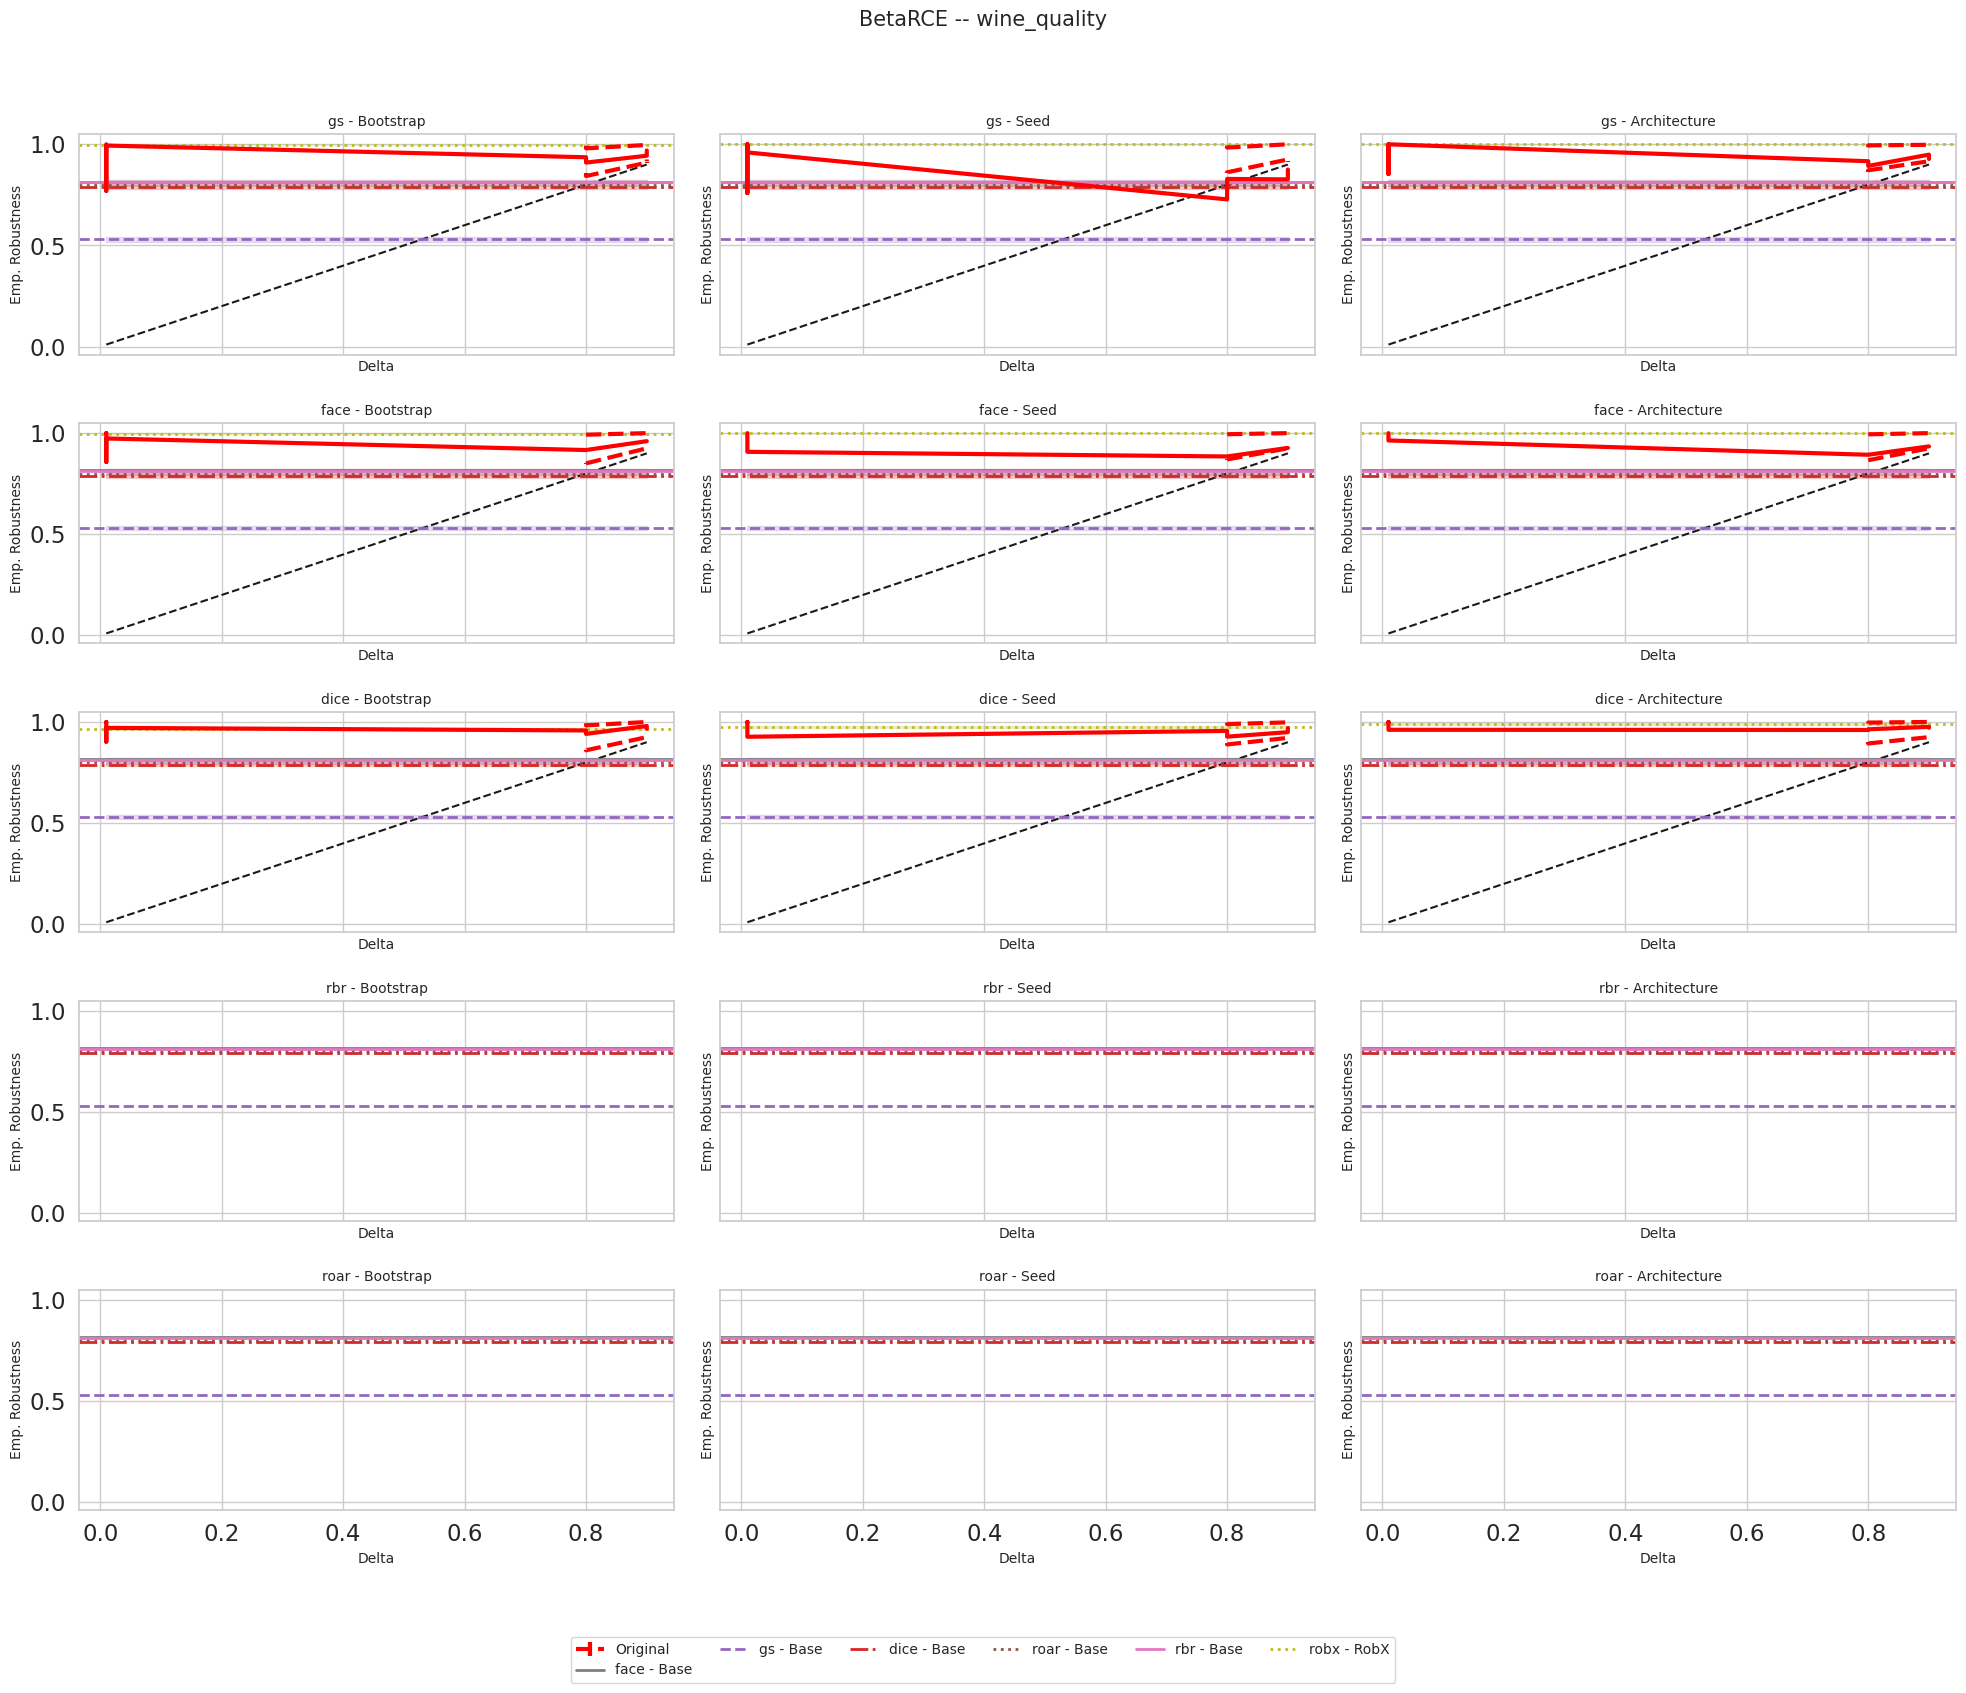

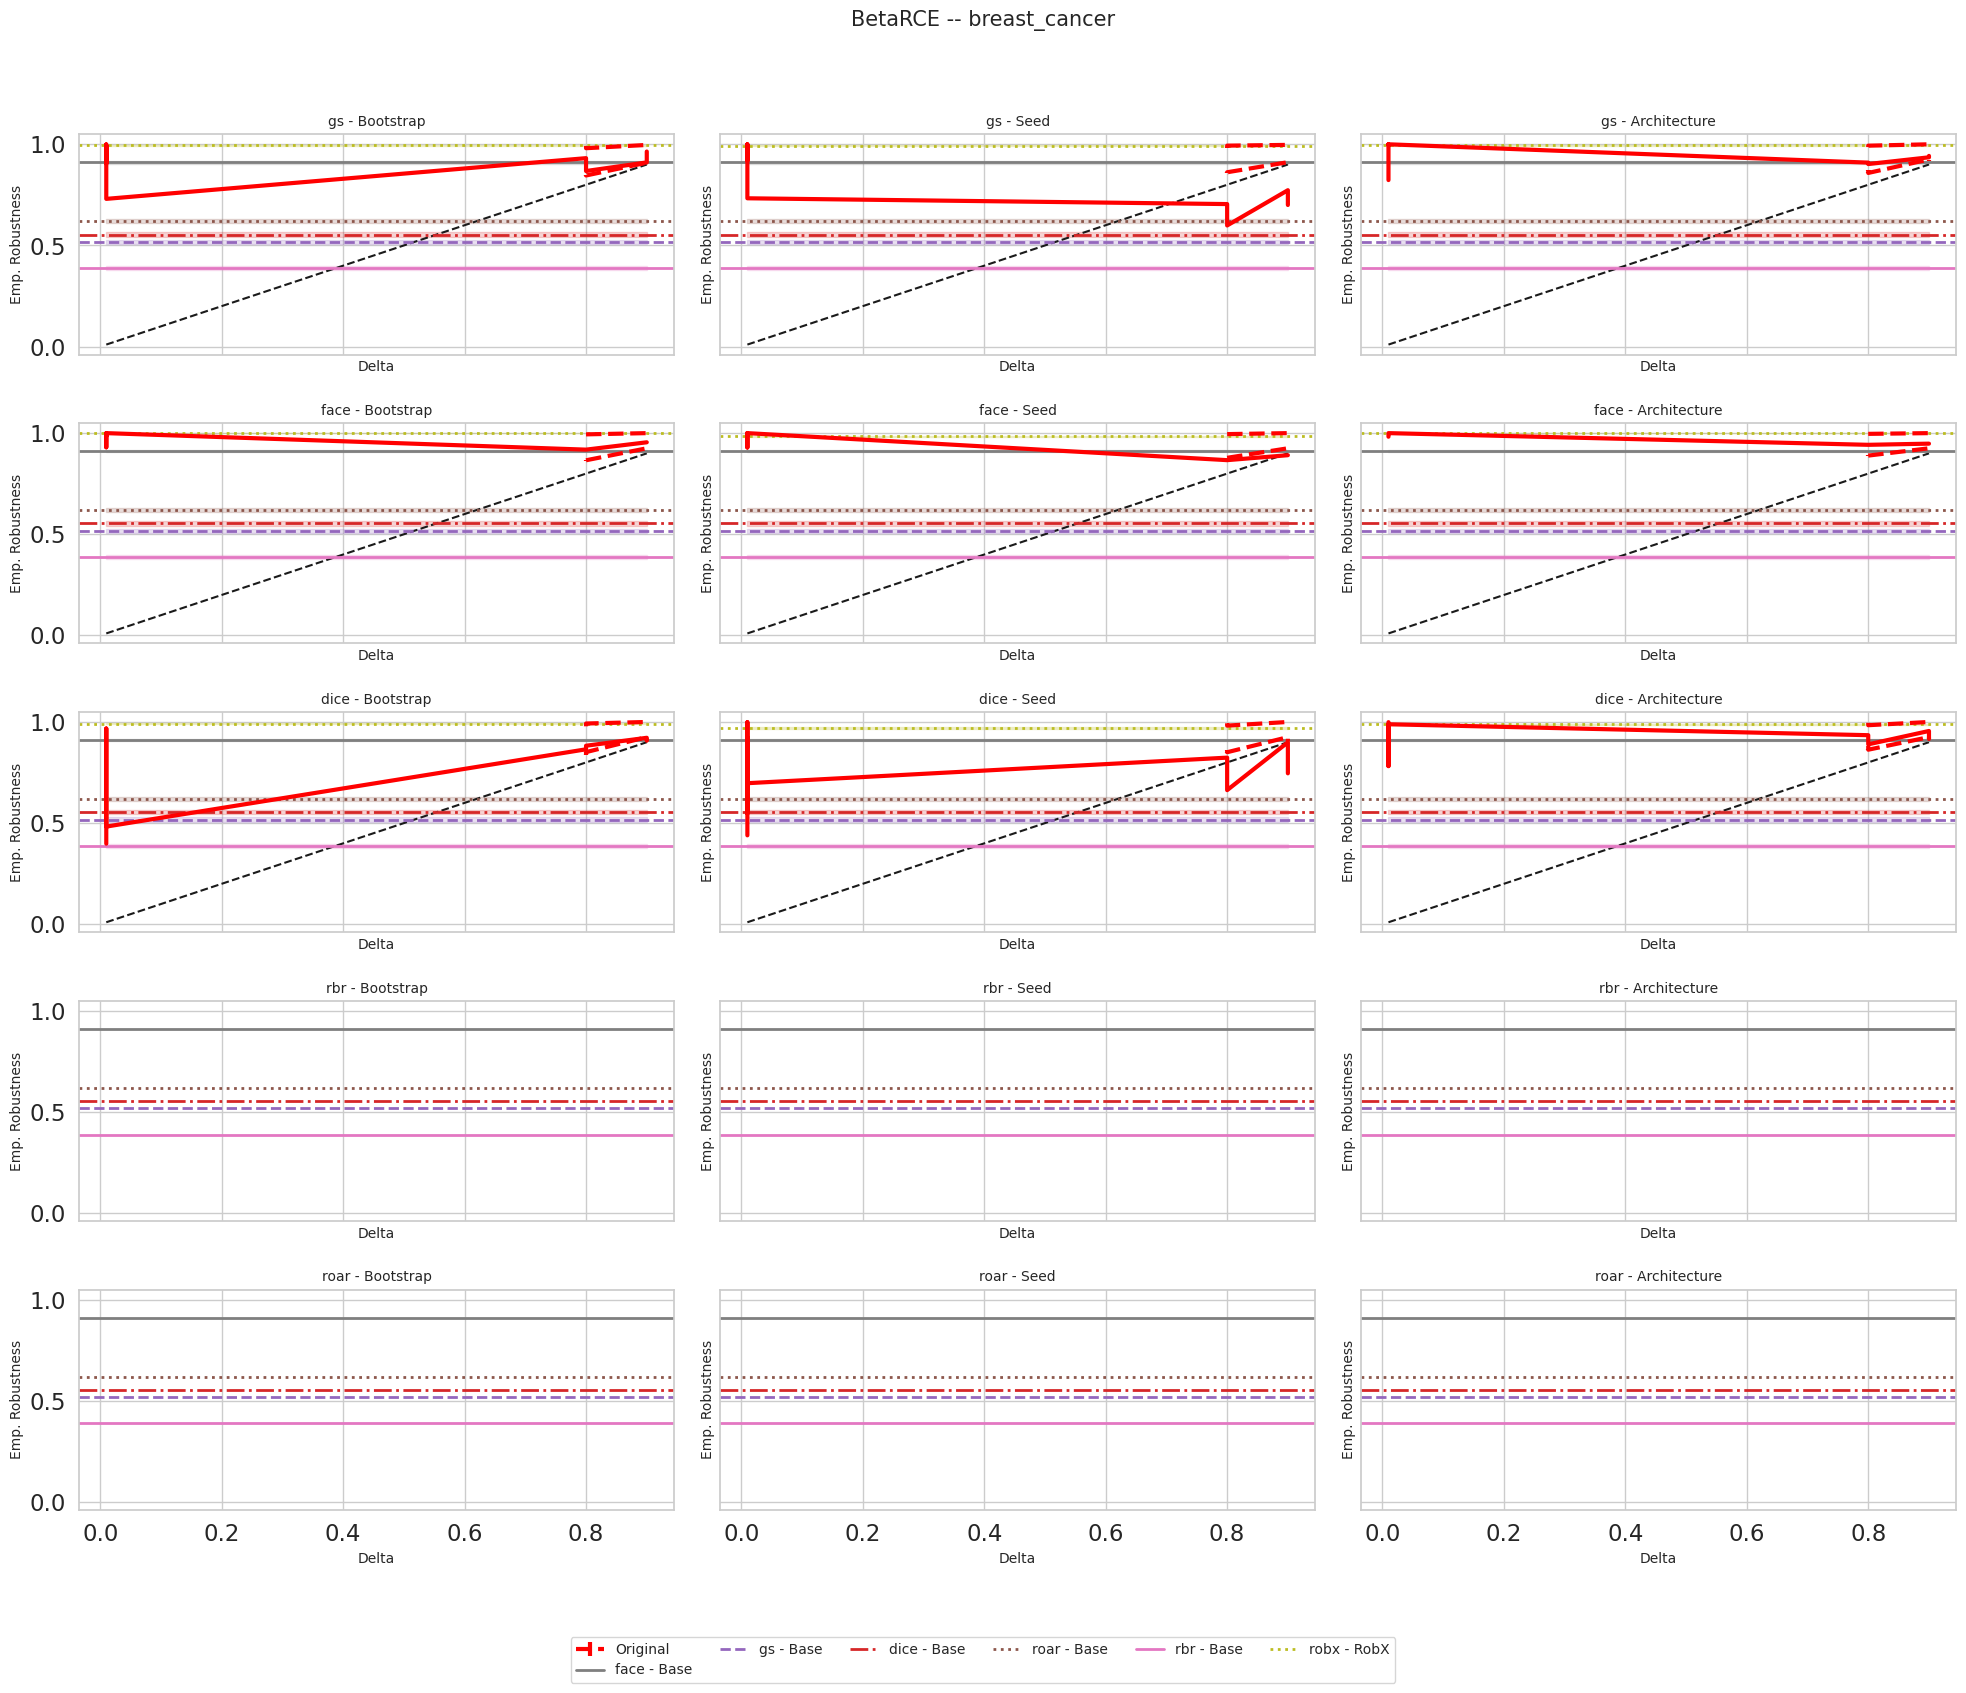

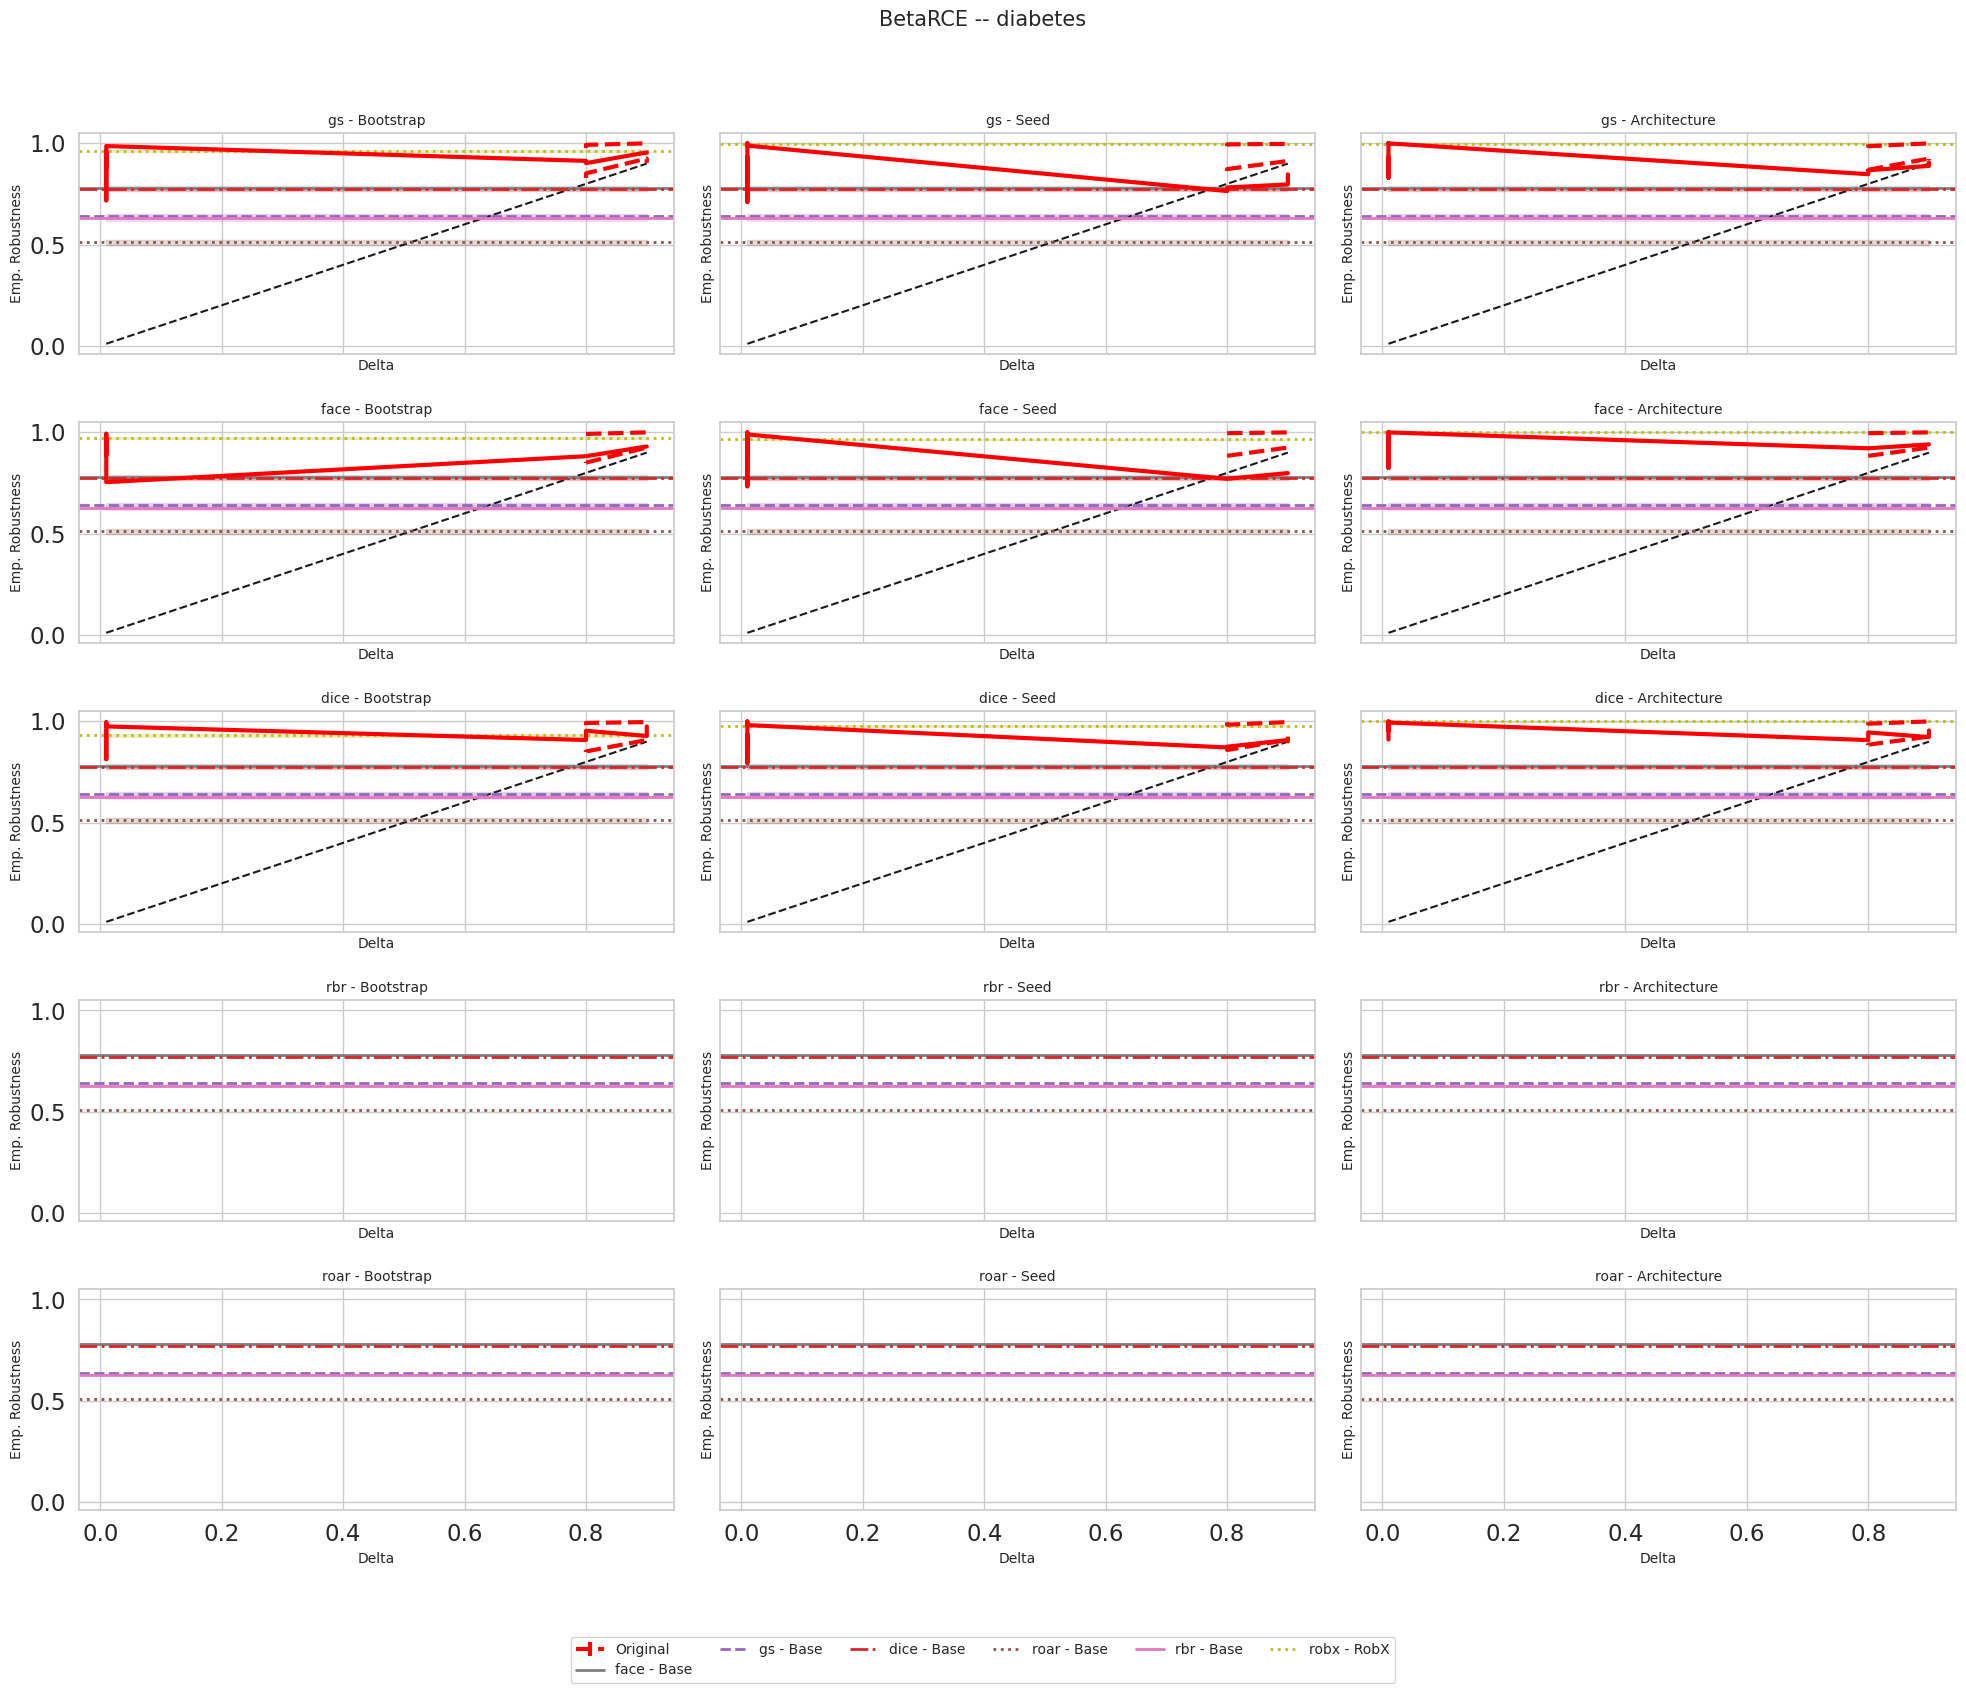

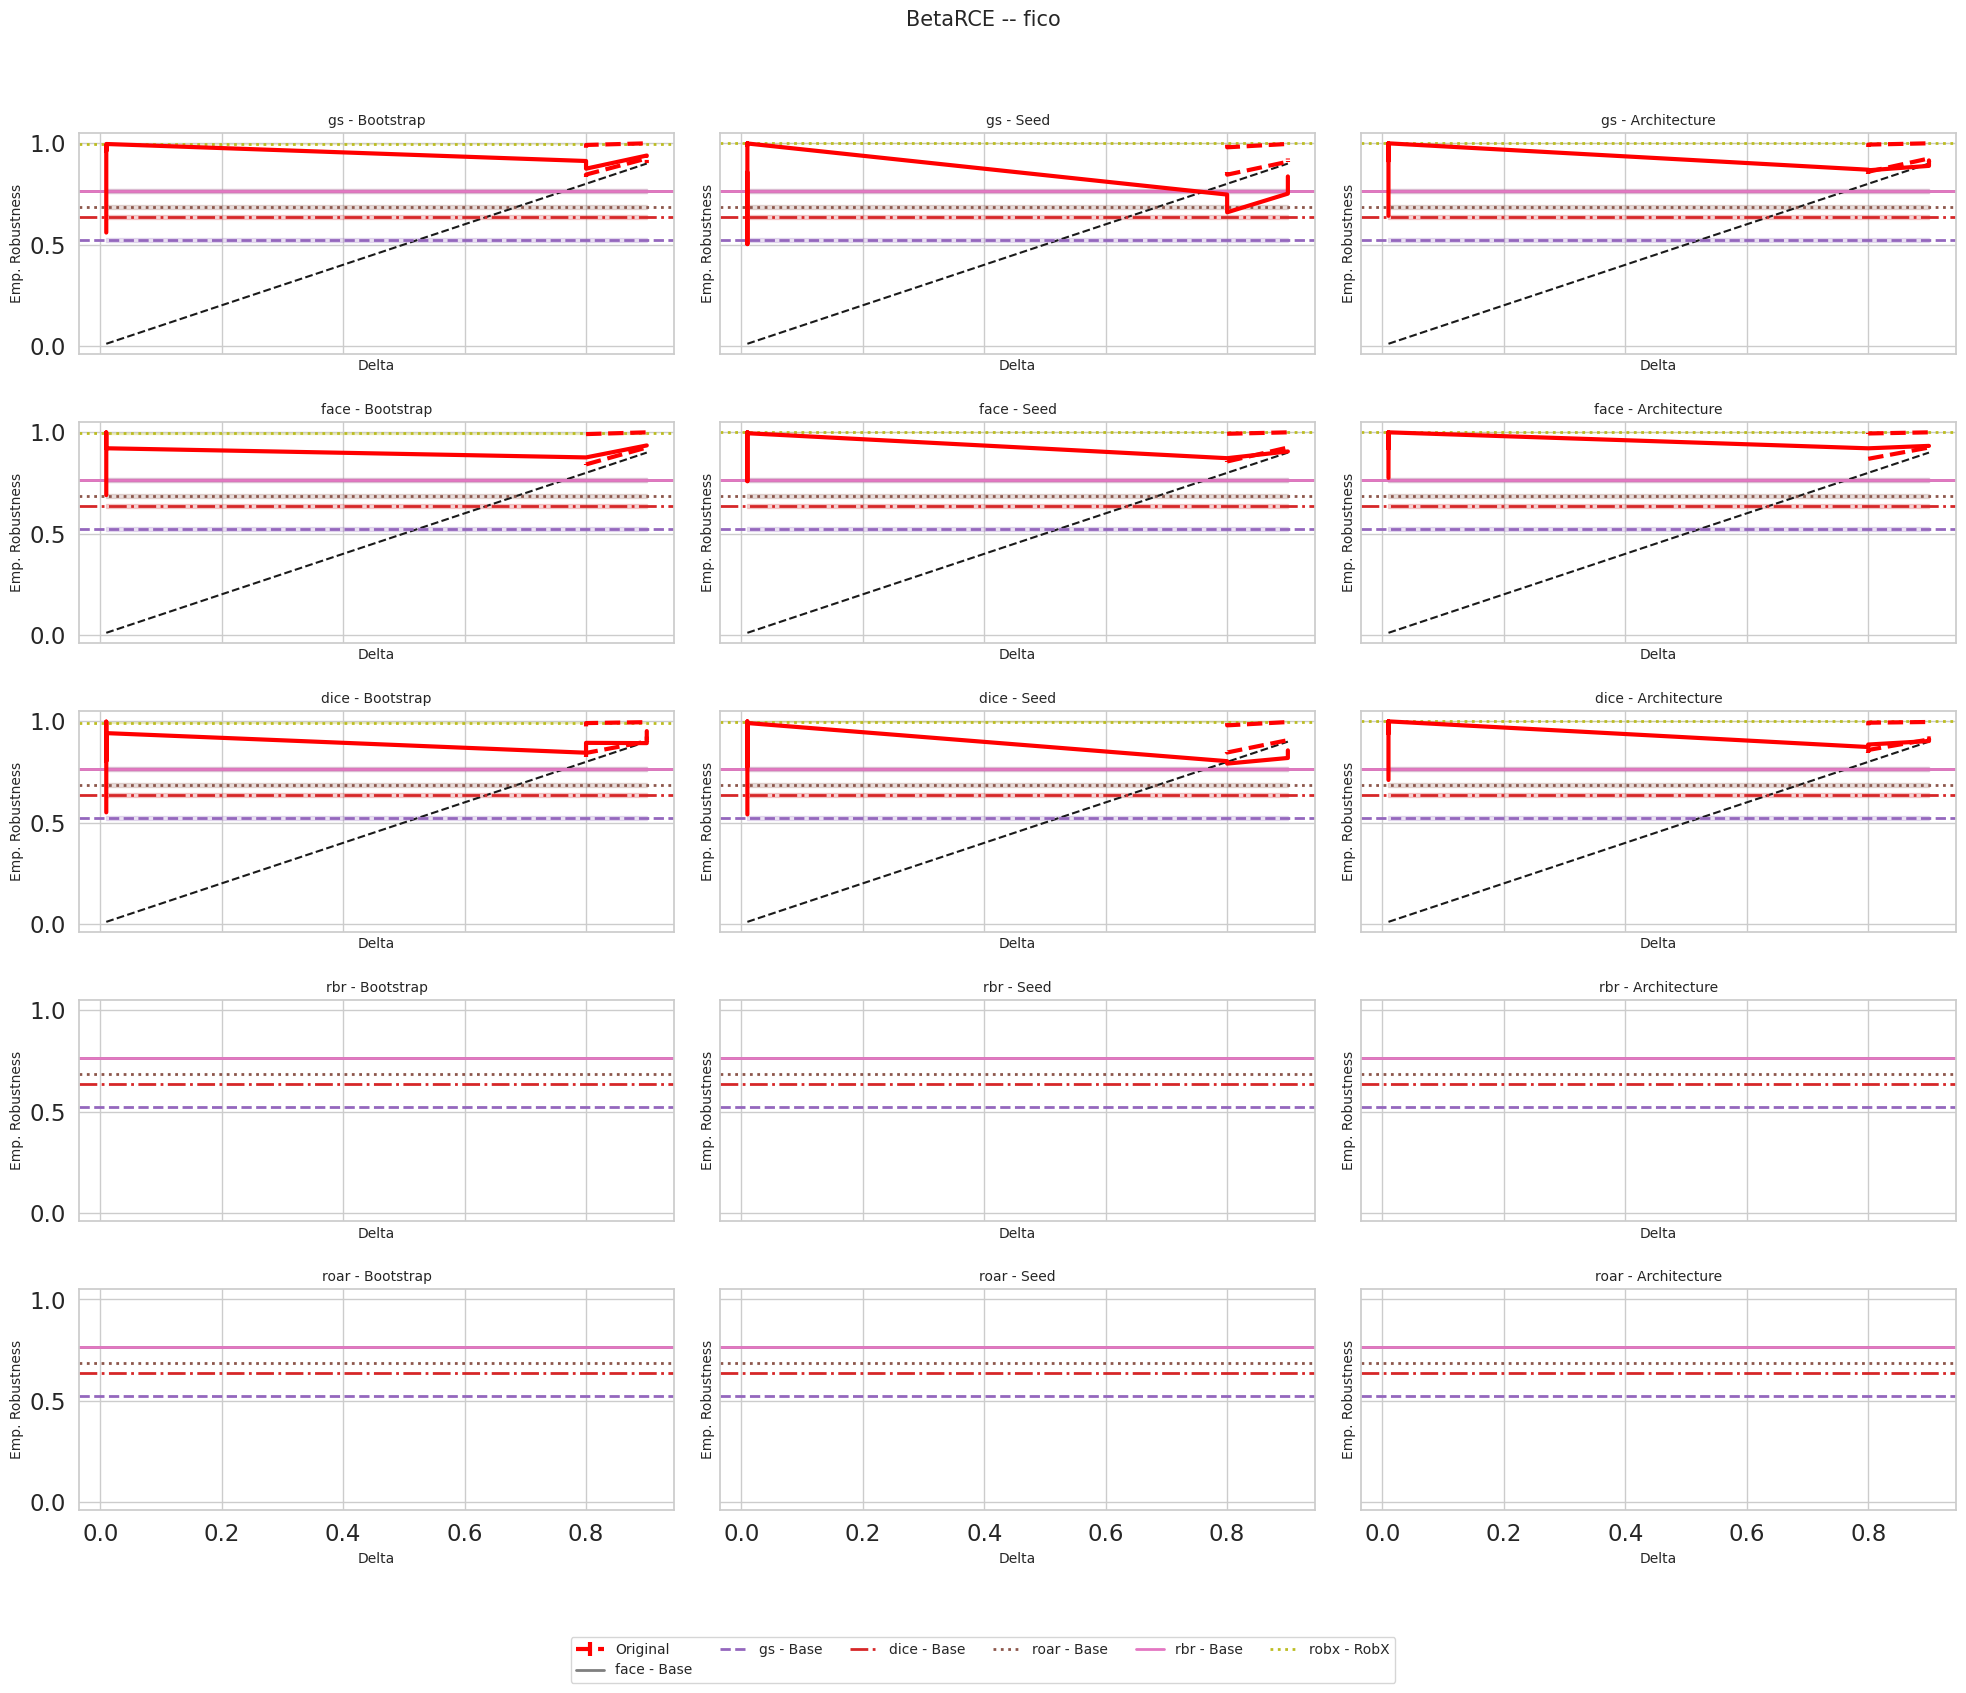

In [ ]:
datasets = betarce_df["dataset_name"].unique()
base_methods = betarce_df["base_cf_method"].unique()
base_experiment_types = betarce_df["experiment_type"].unique()

base_methods_jsut_base = just_base_df["base_cf_method"].unique()
robx_methods = robx_df["robust_cf_method"].unique()

colors = {
    l: c
    for l, c in zip(
        [*base_experiment_types, *base_methods_jsut_base, *robx_methods],
        colors_discrete,
    )
}

Z_SCORE = 1.96

for i, dataset in enumerate(datasets):
    fig, ax = plt.subplots(
        len(base_methods),
        len(base_experiment_types),
        figsize=(20, 15),
        sharex=True,
        sharey=True,
    )

    # Create a list to store all legend handles and labels
    all_handles = []
    all_labels = []

    for j, base_method in enumerate(base_methods):
        for k, experiment_type in enumerate(base_experiment_types):
            df = robust_agg_df[
                (robust_agg_df["dataset_name"] == dataset)
                & (robust_agg_df["base_cf_method"] == base_method)
                & (robust_agg_df["experiment_type"] == experiment_type)
            ]

            df = df.sort_values("delta_robustness")

            for ex_gen_type in df["experiment_generalization_type"].unique():
                df_ex_gen_type = df[df["experiment_generalization_type"] == ex_gen_type]
                line = ax[j, k].errorbar(
                    df_ex_gen_type["delta_robustness"],
                    df_ex_gen_type["robustness"],
                    # yerr=Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
                    color=colors[ex_gen_type]
                    if ex_gen_type != experiment_type
                    else "red",
                    linewidth=3,
                )

                # Lower bound beta
                line = ax[j, k].errorbar(
                    df_ex_gen_type["delta_robustness"],
                    df_ex_gen_type["lower_bound_beta"],
                    yerr=Z_SCORE
                    * df_ex_gen_type["lower_bound_beta_std"]
                    / np.sqrt(df_ex_gen_type["n"]),
                    color=colors[ex_gen_type]
                    if ex_gen_type != experiment_type
                    else "red",
                    linestyle="--",
                    linewidth=3,
                )

                # Upper bound beta
                line = ax[j, k].errorbar(
                    df_ex_gen_type["delta_robustness"],
                    df_ex_gen_type["upper_bound_beta"],
                    yerr=Z_SCORE
                    * df_ex_gen_type["upper_bound_beta_std"]
                    / np.sqrt(df_ex_gen_type["n"]),
                    color=colors[ex_gen_type]
                    if ex_gen_type != experiment_type
                    else "red",
                    linestyle="--",
                    linewidth=3,
                )

                # ax[j, k].fill_between(
                #     df_ex_gen_type['delta_robustness'],
                #     df_ex_gen_type['robustness'] - Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
                #     df_ex_gen_type['robustness'] + Z_SCORE * df_ex_gen_type['robustness_std'] / np.sqrt(df_ex_gen_type['n']),
                #     color=colors[ex_gen_type] if ex_gen_type != experiment_type else 'red',
                #     alpha=0.2
                # )

                # Add to legend only once
                if (
                    ex_gen_type
                    if ex_gen_type != experiment_type
                    else "Original" not in all_labels
                ):
                    all_handles.append(line)
                    all_labels.append(
                        ex_gen_type if ex_gen_type != experiment_type else "Original"
                    )

            min_Delta = df["delta_robustness"].min()
            max_Delta = df["delta_robustness"].max()
            line = ax[j, k].plot([min_Delta, max_Delta], [min_Delta, max_Delta], "k--")

            if "y=x" not in all_labels:
                all_handles.append(line)
                all_labels.append("y=x")

            for ll, jst_base_method in enumerate(
                base_agg_df["base_cf_method"].unique()
            ):
                df = base_agg_df[
                    (base_agg_df["dataset_name"] == dataset)
                    & (base_agg_df["base_cf_method"] == jst_base_method)
                ]

                if len(df) > 0:
                    line = ax[j, k].axhline(
                        df["robustness"].values[0],
                        color=colors[jst_base_method],
                        linestyle=linestyles[ll],
                        linewidth=2,
                    )
                    ax[j, k].fill_between(
                        [min_Delta, max_Delta],
                        df["robustness"].values[0]
                        - Z_SCORE
                        * df["robustness_std"].values[0]
                        / np.sqrt(df["n"].values[0]),
                        df["robustness"].values[0]
                        + Z_SCORE
                        * df["robustness_std"].values[0]
                        / np.sqrt(df["n"].values[0]),
                        color=colors[jst_base_method],
                        alpha=0.2,
                    )

                    if f"{jst_base_method} - Base" not in all_labels:
                        all_handles.append(line)
                        all_labels.append(f"{jst_base_method} - Base")

            for ll, robx_method in enumerate(robx_agg_df["robust_cf_method"].unique()):
                df = robx_agg_df[
                    (robx_agg_df["dataset_name"] == dataset)
                    & (robx_agg_df["base_cf_method"] == base_method)
                    & (robx_agg_df["experiment_type"] == experiment_type)
                    & (robx_agg_df["robust_cf_method"] == robx_method)
                ]

                if len(df) > 0:
                    line = ax[j, k].axhline(
                        df["robustness"].values[0],
                        color=colors[robx_method],
                        linestyle=linestyles[3],
                        linewidth=2,
                    )
                    ax[j, k].fill_between(
                        [min_Delta, max_Delta],
                        df["robustness"].values[0]
                        - Z_SCORE
                        * df["robustness_std"].values[0]
                        / np.sqrt(df["n"].values[0]),
                        df["robustness"].values[0]
                        + Z_SCORE
                        * df["robustness_std"].values[0]
                        / np.sqrt(df["n"].values[0]),
                        color=colors[robx_method],
                        alpha=0.2,
                    )

                    if f"{robx_method} - RobX" not in all_labels:
                        all_handles.append(line)
                        all_labels.append(f"{robx_method} - RobX")

            ax[j, k].set_title(f"{base_method} - {experiment_type}", fontsize=10)
            ax[j, k].set_ylabel("Emp. Robustness", fontsize=10)
            ax[j, k].set_xlabel("Delta", fontsize=10)

    plt.suptitle(f"BetaRCE -- {dataset}", fontsize=15, y=1.02)

    # Create a single legend for the entire figure
    fig.legend(
        all_handles,
        all_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.1),
        ncol=min(len(all_labels), 6),
        fontsize=10,
    )

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.02)  # Adjust bottom to make room for the legend
    plt.show()

In [ ]:
def create_summary_table(dataset, base_method, experiment_type):
    # Filter the data
    df = robust_agg_df[
        (robust_agg_df["dataset_name"] == dataset)
        & (robust_agg_df["base_cf_method"] == base_method)
        & (robust_agg_df["experiment_type"] == experiment_type)
    ]

    # Create a summary DataFrame
    summary = []

    # Add BetaRCE results
    for ex_gen_type in df["experiment_generalization_type"].unique():
        df_ex_gen_type = df[df["experiment_generalization_type"] == ex_gen_type]
        summary.append(
            {
                "Method": f"BetaRCE ({ex_gen_type})",
                "Robustness": f"{df_ex_gen_type['robustness'].mean():.3f} ± {Z_SCORE * df_ex_gen_type['robustness_std'].mean() / np.sqrt(df_ex_gen_type['n'].mean()):.3f}",
                "Lower Bound Beta": f"{df_ex_gen_type['lower_bound_beta'].mean():.3f} ± {Z_SCORE * df_ex_gen_type['lower_bound_beta_std'].mean() / np.sqrt(df_ex_gen_type['n'].mean()):.3f}",
                "Upper Bound Beta": f"{df_ex_gen_type['upper_bound_beta'].mean():.3f} ± {Z_SCORE * df_ex_gen_type['upper_bound_beta_std'].mean() / np.sqrt(df_ex_gen_type['n'].mean()):.3f}",
            }
        )

    # Add base method results
    base_df = base_agg_df[
        (base_agg_df["dataset_name"] == dataset)
        & (base_agg_df["base_cf_method"] == base_method)
    ]
    if len(base_df) > 0:
        summary.append(
            {
                "Method": f"{base_method} - Base",
                "Robustness": f"{base_df['robustness'].values[0]:.3f} ± {Z_SCORE * base_df['robustness_std'].values[0] / np.sqrt(base_df['n'].values[0]):.3f}",
                "Lower Bound Beta": "N/A",
                "Upper Bound Beta": "N/A",
            }
        )

    # Add RobX results
    for robx_method in robx_agg_df["robust_cf_method"].unique():
        robx_df = robx_agg_df[
            (robx_agg_df["dataset_name"] == dataset)
            & (robx_agg_df["base_cf_method"] == base_method)
            & (robx_agg_df["experiment_type"] == experiment_type)
            & (robx_agg_df["robust_cf_method"] == robx_method)
        ]
        if len(robx_df) > 0:
            summary.append(
                {
                    "Method": f"{robx_method} - RobX",
                    "Robustness": f"{robx_df['robustness'].values[0]:.3f} ± {Z_SCORE * robx_df['robustness_std'].values[0] / np.sqrt(robx_df['n'].values[0]):.3f}",
                    "Lower Bound Beta": "N/A",
                    "Upper Bound Beta": "N/A",
                }
            )

    # Create the summary DataFrame
    summary_df = pd.DataFrame(summary)

    return summary_df


# Create tables for each combination
for dataset in datasets:
    for base_method in base_methods:
        for experiment_type in base_experiment_types:
            summary_df = create_summary_table(dataset, base_method, experiment_type)
            print(f"\nSummary for {dataset} - {base_method} - {experiment_type}")
            print(summary_df.to_string(index=False))
            print("\n")


Summary for wine_quality - gs - Bootstrap
             Method    Robustness Lower Bound Beta Upper Bound Beta
BetaRCE (Bootstrap) 0.941 ± 0.006    0.883 ± 0.001    0.992 ± 0.000
          gs - Base 0.530 ± 0.011              N/A              N/A
        robx - RobX 0.996 ± 0.001              N/A              N/A



Summary for wine_quality - gs - Seed
        Method    Robustness Lower Bound Beta Upper Bound Beta
BetaRCE (Seed) 0.886 ± 0.007    0.890 ± 0.001    0.994 ± 0.000
     gs - Base 0.530 ± 0.011              N/A              N/A
   robx - RobX 1.000 ± 0.000              N/A              N/A



Summary for wine_quality - gs - Architecture
                Method    Robustness Lower Bound Beta Upper Bound Beta
BetaRCE (Architecture) 0.947 ± 0.005    0.895 ± 0.001    0.994 ± 0.000
             gs - Base 0.530 ± 0.011              N/A              N/A
           robx - RobX 1.000 ± 0.000              N/A              N/A



Summary for wine_quality - face - Bootstrap
             M

In [ ]:
ksweep_agg_by = ["dataset_name", "base_cf_method", "experiment_type", "k_mlps_in_B"]
ksweep_agg_df = (
    ksweep_df.groupby(ksweep_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

ksweep_agg_df.round(2)

dataset_name base_cf_method experiment_type  k_mlps_in_B     n  vailidity  \
0      diabetes             gs    Architecture            8  4500        1.0   
1      diabetes             gs    Architecture           12  4500        1.0   
2      diabetes             gs    Architecture           16  4500        1.0   
3      diabetes             gs    Architecture           20  1701        1.0   
4      diabetes             gs       Bootstrap            8  4500        1.0   
5      diabetes             gs       Bootstrap           12  3000        1.0   
6      diabetes             gs       Bootstrap           16  4500        1.0   
7      diabetes             gs       Bootstrap           20  4500        1.0   
8      diabetes             gs       Bootstrap           24  4500        1.0   
9      diabetes             gs       Bootstrap           28   101        1.0   
10     diabetes             gs            Seed            8  4500        1.0   
11     diabetes             gs            Seed           12  4500        1.0   
12     diabetes             gs            Seed           16  4500        1.0   
13     diabetes             gs            Seed           20   501        1.0   
14         fico             gs    Architecture            8  4500        1.0   
15         fico             gs    Architecture           12  4500        1.0   
16         fico             gs    Architecture           16  4500        1.0   
17         fico             gs    Architecture           20  4500        1.0   
18         fico             gs    Architecture           24   101        1.0   
19         fico             gs       Bootstrap            8  4500        1.0   
20         fico             gs       Bootstrap           12  4500        1.0   
21         fico             gs       Bootstrap           16  4500        1.0   
22         fico             gs       Bootstrap           20  4500        1.0   
23         fico             gs       Bootstrap           24   301        1.0   
24         fico             gs            Seed            8  4500        1.0   
25         fico             gs            Seed           12  4500        1.0   
26         fico             gs            Seed           16  4500        1.0   
27         fico             gs            Seed           20  4500        1.0   
28         fico             gs            Seed           24   601        1.0   

    validity_std  robustness  robustness_std  proximityL1  proximityL1_std  \
0            0.0         NaN             NaN          NaN              NaN   
1            0.0         NaN             NaN          NaN              NaN   
2            0.0         NaN             NaN          NaN              NaN   
3            0.0        0.98            0.14         0.68             0.39   
4            0.0         NaN             NaN          NaN              NaN   
5            0.0         NaN             NaN          NaN              NaN   
6            0.0         NaN             NaN          NaN              NaN   
7            0.0        0.92            0.27         0.93             0.51   
8            0.0        0.93            0.26         0.88             0.44   
9            0.0        0.87            0.34         0.98             0.19   
10           0.0         NaN             NaN          NaN              NaN   
11           0.0         NaN             NaN          NaN              NaN   
12           0.0         NaN             NaN          NaN              NaN   
13           0.0        0.70            0.46         0.45             0.24   
14           0.0         NaN             NaN          NaN              NaN   
15           0.0         NaN             NaN          NaN              NaN   
16           0.0         NaN             NaN          NaN              NaN   
17           0.0        0.93            0.25         2.79             1.95   
18           0.0        1.00            0.00         2.75             0.68   
19           0.0         NaN             N

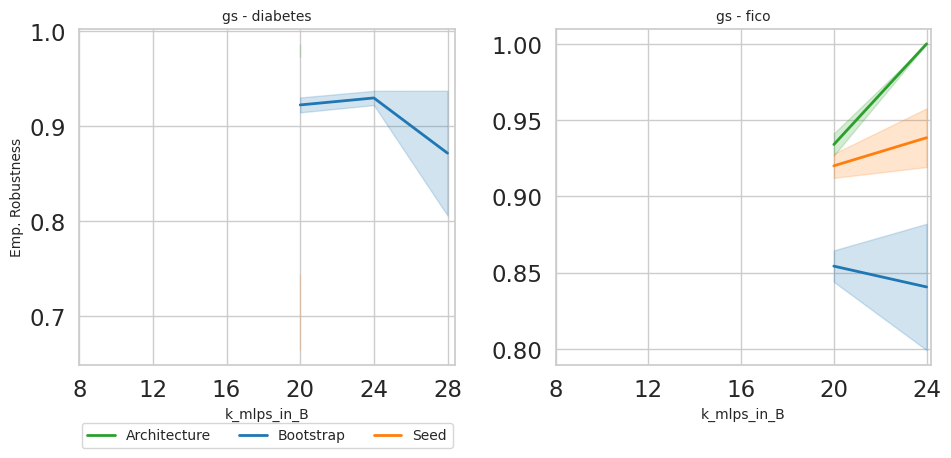

In [ ]:
# Determine the number of unique base methods and datasets
base_methods = ksweep_agg_df["base_cf_method"].unique()
datasets = ksweep_agg_df["dataset_name"].unique()
n_rows = len(base_methods)
n_cols = len(datasets)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), squeeze=False)

for i, base_method in enumerate(base_methods):
    for j, dataset in enumerate(datasets):
        ax = axs[i, j]
        df = ksweep_agg_df[
            (ksweep_agg_df["dataset_name"] == dataset)
            & (ksweep_agg_df["base_cf_method"] == base_method)
        ]
        for experiment_type in df["experiment_type"].unique():
            df_ex = df[df["experiment_type"] == experiment_type]
            ax.errorbar(
                df_ex["k_mlps_in_B"],
                df_ex["robustness"],
                label=experiment_type,
                color=colors[experiment_type],
                linewidth=2,
            )
            ax.fill_between(
                df_ex["k_mlps_in_B"],
                df_ex["robustness"]
                - Z_SCORE * df_ex["robustness_std"] / np.sqrt(df_ex["n"]),
                df_ex["robustness"]
                + Z_SCORE * df_ex["robustness_std"] / np.sqrt(df_ex["n"]),
                color=colors[experiment_type],
                alpha=0.2,
            )

        ax.set_xticks(sorted(df["k_mlps_in_B"].unique()))
        ax.set_title(f"{base_method} - {dataset}", fontsize=10)
        if j == 0:  # Only set ylabel for the leftmost column
            ax.set_ylabel("Emp. Robustness", fontsize=10)
        if i == n_rows - 1:  # Only set xlabel for the bottom row
            ax.set_xlabel("k_mlps_in_B", fontsize=10)

        # Set legend only for the first subplot
        if i == 0 and j == 0:
            ax.legend(
                loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10
            )

plt.tight_layout()
plt.show()

In [ ]:
brce_params_df_agg_by = [
    "dataset_name",
    "base_cf_method",
    "experiment_type",
    "delta_robustness",
    "beta_confidence",
]
brce_params_agg_df = (
    brce_params_df.groupby(brce_params_df_agg_by)
    .agg(
        n=("base_counterfactual_validity_model2", "count"),
        vailidity=("base_counterfactual_validity", "mean"),
        validity_std=("base_counterfactual_validity", "std"),
        robustness=("robust_counterfactual_validity_model2", "mean"),
        robustness_std=("robust_counterfactual_validity_model2", "std"),
        proximityL1=("robust_counterfactual_proximityL1", "mean"),
        proximityL1_std=("robust_counterfactual_proximityL1", "std"),
        proximityL2=("robust_counterfactual_proximityL2", "mean"),
        proximityL2_std=("robust_counterfactual_proximityL2", "std"),
        plausibility=("robust_counterfactual_plausibility", "mean"),
        plausibility_std=("robust_counterfactual_plausibility", "std"),
        dpow=("robust_counterfactual_discriminative_power", "mean"),
        dpow_std=("robust_counterfactual_discriminative_power", "std"),
    )
    .reset_index()
)

brce_params_agg_df.round(2)

dataset_name base_cf_method experiment_type  delta_robustness  \
0    breast_cancer           dice    Architecture               0.6   
1    breast_cancer           dice    Architecture               0.6   
2    breast_cancer           dice    Architecture               0.6   
3    breast_cancer           dice    Architecture               0.6   
4    breast_cancer           dice    Architecture               0.7   
..             ...            ...             ...               ...   
379   wine_quality             gs            Seed               0.8   
380   wine_quality             gs            Seed               0.9   
381   wine_quality             gs            Seed               0.9   
382   wine_quality             gs            Seed               0.9   
383   wine_quality             gs            Seed               0.9   

     beta_confidence     n  vailidity  validity_std  robustness  \
0                0.6  1500        1.0           0.0        0.94   
1                0.7  1500        1.0           0.0        0.94   
2                0.8  1500        1.0           0.0        0.94   
3                0.9  1491        1.0           0.0        0.95   
4                0.6  1500        1.0           0.0        0.95   
..               ...   ...        ...           ...         ...   
379              0.9  2970        1.0           0.0        0.93   
380              0.6  3000        1.0           0.0        0.95   
381              0.7  3000        1.0           0.0        0.95   
382              0.8  3000        1.0           0.0        0.95   
383              0.9  2970        1.0           0.0        0.96   

     robustness_std  proximityL1  proximityL1_std  proximityL2  \
0              0.24         3.13             1.88         1.12   
1              0.24         3.21             1.91         1.13   
2              0.23         3.20             1.91         1.13   
3              0.23         3.30             1.95         1.14   
4              0.21         3.39             1.97         1.15   
..              ...          ...              ...          ...   
379            0.25         0.57             0.35         0.21   
380            0.23         0.60             0.36         0.22   
381            0.22         0.60             0.36         0.22   
382            0.22         0.60             0.36         0.22   
383            0.19         0.64             0.38         0.24   

     proximityL2_std  plausibility  plausibility_std  dpow  dpow_std  
0               0.39          1.12              0.32  0.36      0.25  
1               0.40          1.13              0.33  0.38      0.25  
2               0.40          1.13              0.33  0.37      0.25  
3               0.40          1.13              0.33  0.39      0.25  
4               0.40          1.14              0.34  0.40      0.25  
..               ...           ...               ...   ...       ...  
379             0.13          0.24              0.11  0.55      0.18  
380             0.13          0.25              0.12  0.56      0.17  
381             0.13          0.25              0.12  0.56      0.17  
382             0.13          0.25              0.12  0.56      0.18  
383             0.14          0.25              0.12  0.58      0.17  

[384 rows x 18 columns]

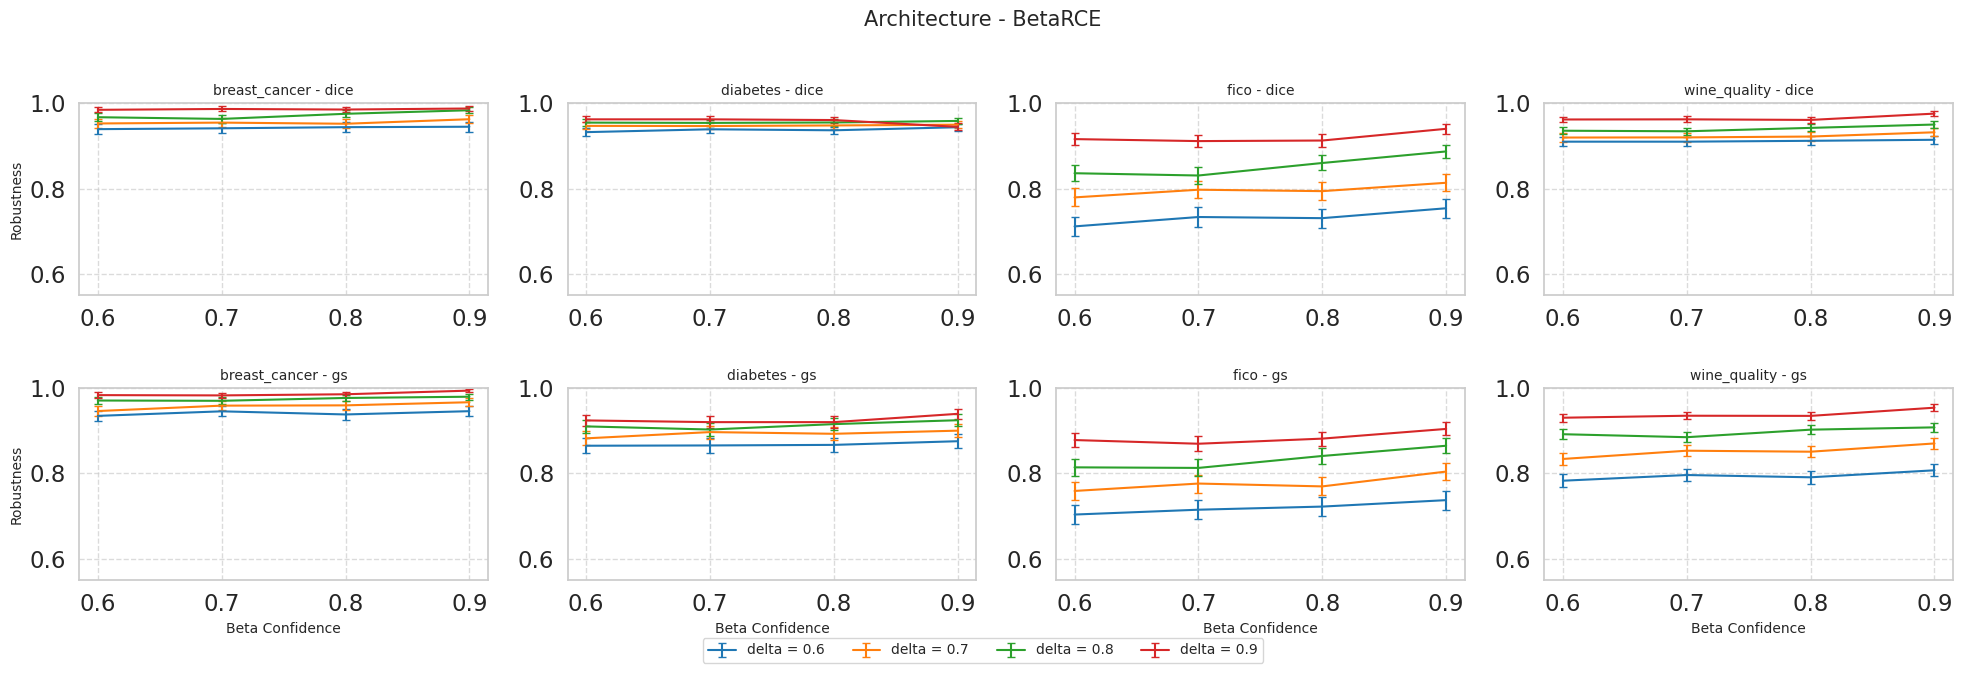

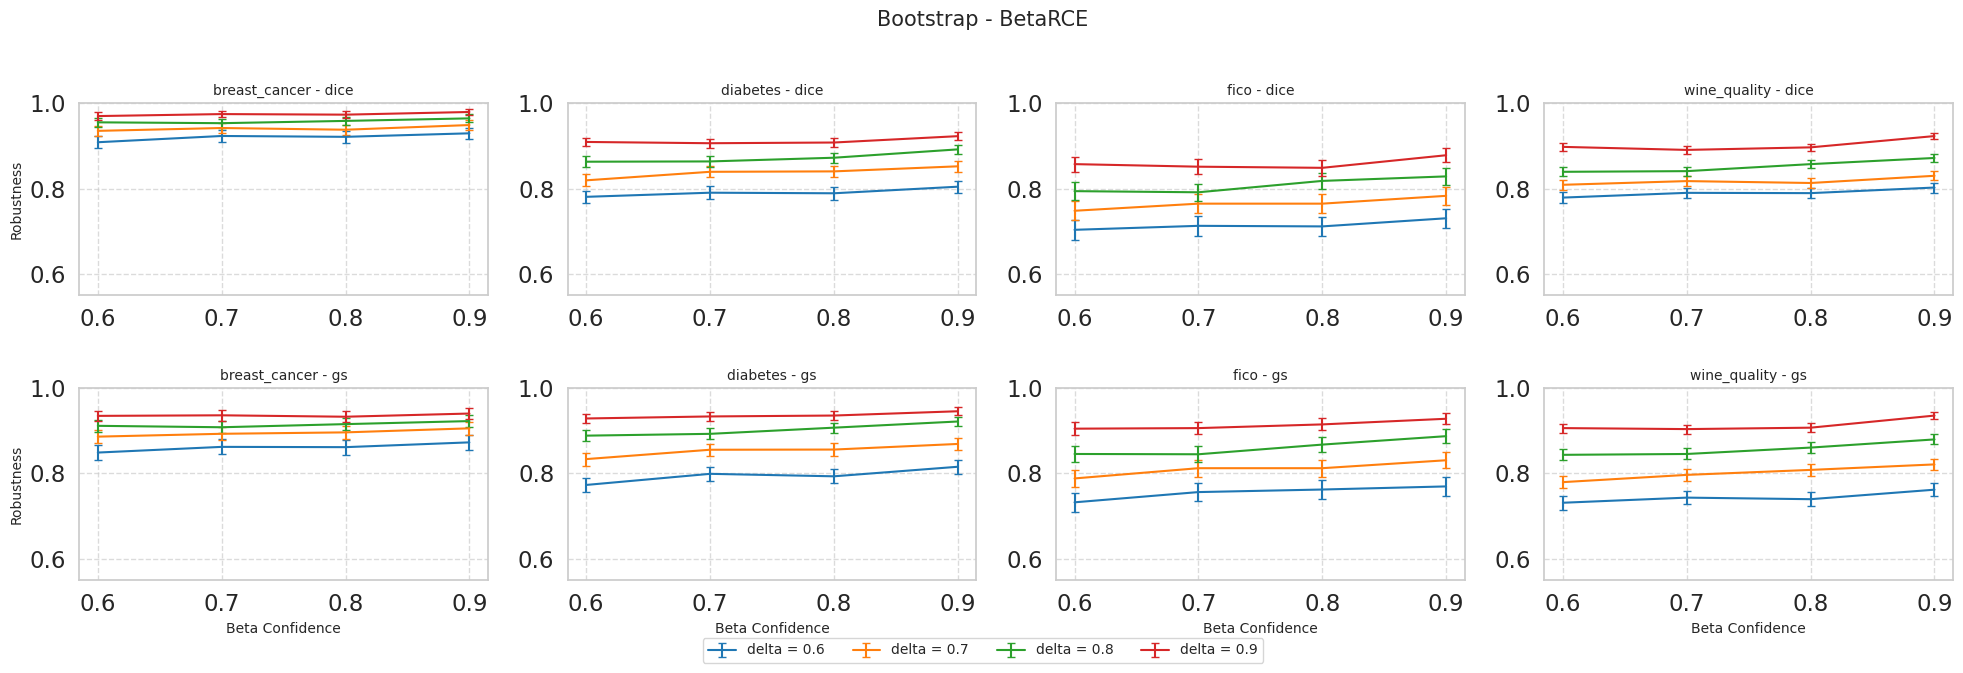

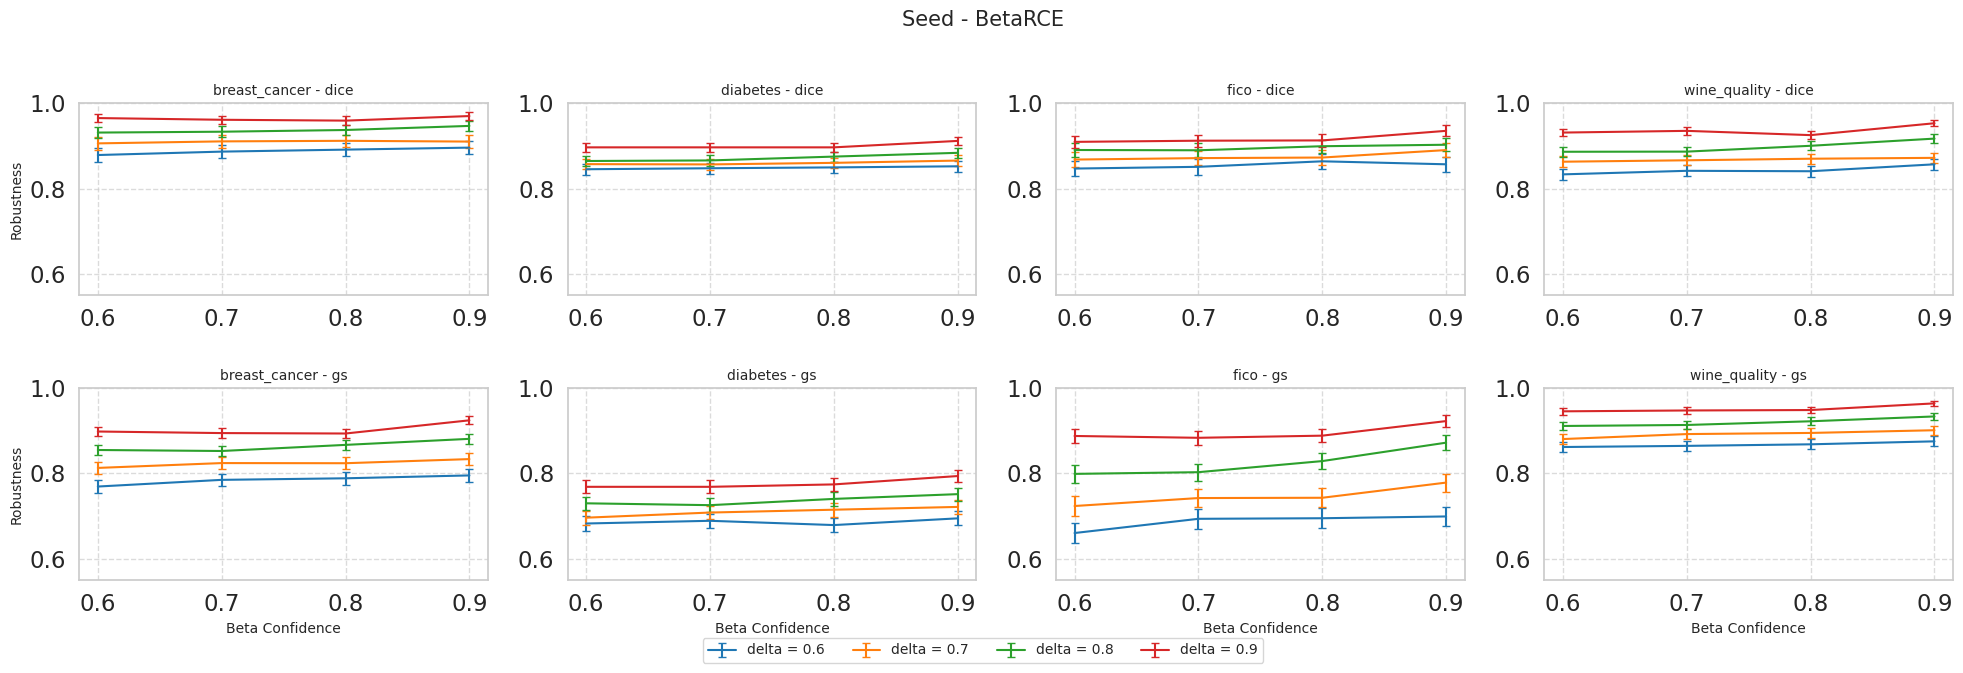

In [ ]:
# Get unique values
datasets = brce_params_agg_df["dataset_name"].unique()
base_methods = brce_params_agg_df["base_cf_method"].unique()
experiment_types = brce_params_agg_df["experiment_type"].unique()
delta_robustness_values = sorted(brce_params_agg_df["delta_robustness"].unique())

# Set up the plot
n_rows = len(base_methods)
n_cols = len(datasets)

colors = {l: c for l, c in zip(delta_robustness_values, colors_discrete)}

for exp_type in experiment_types:
    fig, axs = plt.subplots(
        n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows), squeeze=False
    )
    for i, base_method in enumerate(base_methods):
        for j, dataset in enumerate(datasets):
            ax = axs[i, j]
            for k, delta_rob in enumerate(delta_robustness_values):
                df_subset = brce_params_agg_df[
                    (brce_params_agg_df["dataset_name"] == dataset)
                    & (brce_params_agg_df["base_cf_method"] == base_method)
                    & (brce_params_agg_df["experiment_type"] == exp_type)
                    & (brce_params_agg_df["delta_robustness"] == delta_rob)
                ]

                if not df_subset.empty:
                    ax.errorbar(
                        df_subset["beta_confidence"],
                        df_subset["robustness"],
                        yerr=Z_SCORE
                        * df_subset["robustness_std"]
                        / np.sqrt(df_subset["n"]),
                        label=f"delta = {delta_rob}",
                        color=colors[delta_rob],
                        capsize=3,
                    )

            ax.set_xticks(sorted(df_subset["beta_confidence"].unique()))
            ax.set_title(f"{dataset} - {base_method}", fontsize=10)
            if j == 0:  # Only set ylabel for the leftmost column
                ax.set_ylabel("Robustness", fontsize=10)
            if i == n_rows - 1:  # Only set xlabel for the bottom row
                ax.set_xlabel("Beta Confidence", fontsize=10)

            ax.set_ylim(0.55, 1)  # Assuming robustness is between 0 and 1
            ax.grid(True, linestyle="--", alpha=0.7)

    # Create a single legend for the entire figure
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",
        ncol=len(experiment_types) * len(delta_robustness_values),
        bbox_to_anchor=(0.5, -0.1),
        fontsize=10,
    )

    plt.suptitle(f"{exp_type} - BetaRCE", fontsize=15, y=1)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.05)  # Adjust to make room for the legend
    plt.show()

In [ ]:
raw_df = betarce_df[betarce_df["this_is_generalization"] == False].copy()

In [ ]:
raw_df[raw_df["base_cf_method"] == "face"][
    "base_counterfactual_validity_model2"
].value_counts()

1.0    494932
0.0    198271
Name: base_counterfactual_validity_model2, dtype: int64

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[1] Does higher Beta lead to better empirical robustness?</div>

32    449112
Name: k_mlps_in_B, dtype: int64


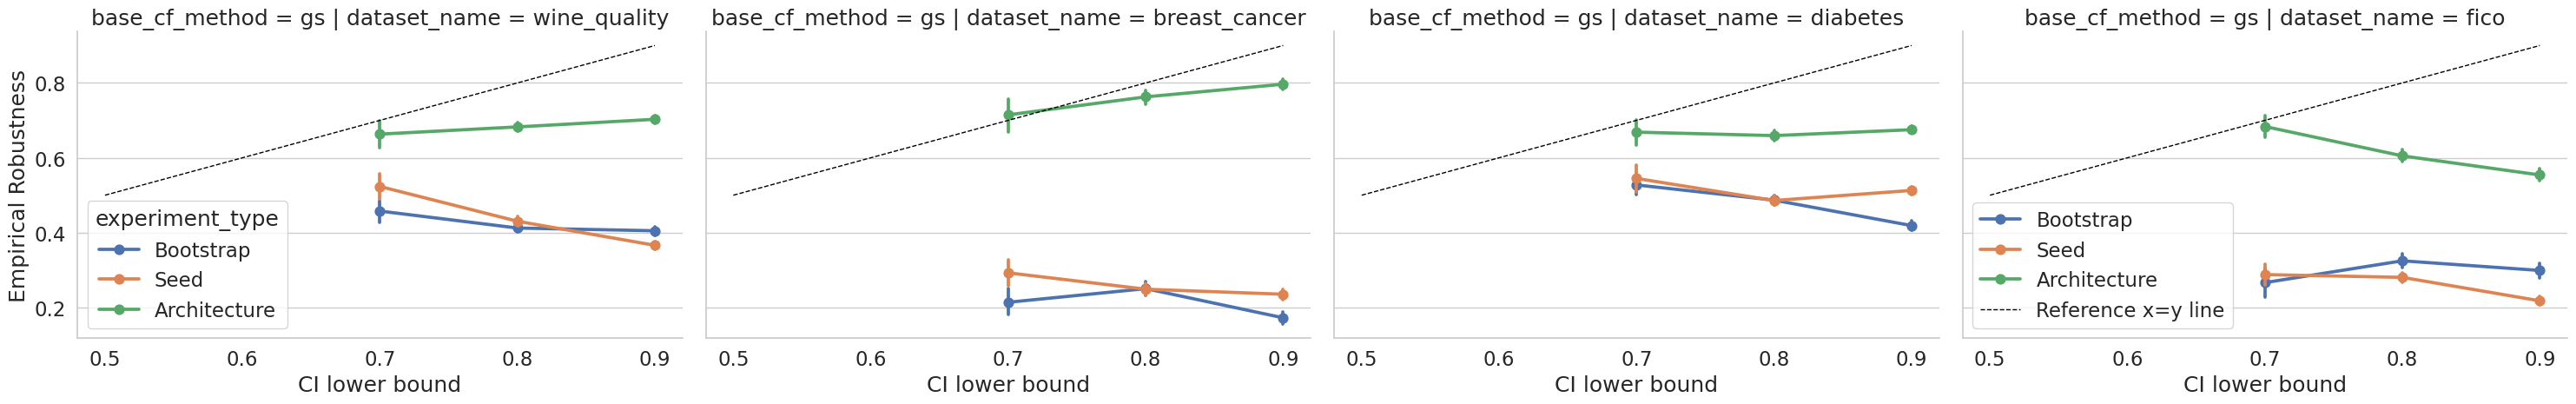

In [ ]:
# Split by expeirment type (hue) and dataset (col)
# x-axis: lower bound discretized
# y-axis: average empirical robustness

_tmp_df = raw_df[raw_df["base_cf_method"] == "gs"].copy()
lb_threshs = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
_tmp_df["CI lower bound"] = pd.cut(
    _tmp_df["lower_bound_beta"], bins=lb_threshs, labels=lb_threshs[:-1]
)
_tmp_df["CI midpoint"] = (_tmp_df["lower_bound_beta"] + _tmp_df["upper_bound_beta"]) / 2
_tmp_df["CI midpoint"] = pd.cut(
    _tmp_df["CI midpoint"], bins=lb_threshs, labels=lb_threshs[:-1]
)
_tmp_df["Empirical Robustness"] = _tmp_df["base_counterfactual_validity_model2"].astype(
    float
)

# Drop rows with NaN values in 'Empirical Robustness'
_tmp_df = _tmp_df.dropna(subset=["Empirical Robustness"])

# Print counts for each k_mlps_in_B
print(_tmp_df["k_mlps_in_B"].value_counts())

g = sns.catplot(
    data=_tmp_df,
    x="CI lower bound",
    y="Empirical Robustness",
    hue="experiment_type",
    col="dataset_name",
    row="base_cf_method",
    kind="point",
    # palette=colors_discrete,
    # markers=markers,
    height=5,
    aspect=1.5,
    legend_out=False,
)
for ax in g.axes.flat:
    ax.plot(
        list(range(5)),
        lb_threshs[:-1],
        color="black",
        linestyle="--",
        linewidth=1,
        label="Reference x=y line",
    )

plt.legend()
plt.savefig(
    f"{images_dir}/1_robustness_vs_ci_lower_bound.png", dpi=300, bbox_inches="tight"
)

In [ ]:
nn_gs_df = raw_df[
    (raw_df["model_type_to_use"] == "lightgbm") & (raw_df["base_cf_method"] == "gs")
]
nn_dice_df = raw_df[
    (raw_df["model_type_to_use"] == "lightgbm") & (raw_df["base_cf_method"] == "dice")
]
nn_face_df = raw_df[
    (raw_df["model_type_to_use"] == "lightgbm") & (raw_df["base_cf_method"] == "face")
]
nn_df = raw_df[raw_df["model_type_to_use"] == "lightgbm"]
dt_gs_df = raw_df[
    (raw_df["model_type_to_use"] == "DecisionTree")
    & (raw_df["base_cf_method"] == "GrowingSpheres")
]
dt_dice_df = raw_df[
    (raw_df["model_type_to_use"] == "DecisionTree")
    & (raw_df["base_cf_method"] == "Dice")
]
dt_df = raw_df[raw_df["model_type_to_use"] == "DecisionTree"]

print(
    f"Lengths of the dataframes: NN GS: {len(nn_gs_df)}, NN Dice: {len(nn_dice_df)}, NN Face: {len(nn_face_df)}, NN: {len(nn_df)}, DT GS: {len(dt_gs_df)}, DT Dice: {len(dt_dice_df)}, DT: {len(dt_df)}"
)

Lengths of the dataframes: NN GS: 449112, NN Dice: 1868209, NN Face: 693203, NN: 5440524, DT GS: 0, DT Dice: 0, DT: 0


In [ ]:
nn_df["robust_cf_method"].unique()

array(['betarob', 'robx'], dtype=object)

In [ ]:
nn_gs_df["this_is_generalization"].value_counts()

False    449112
Name: this_is_generalization, dtype: int64

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[2] Is the empirical validity δ-Robust?</div>

[0.8, 0.9]


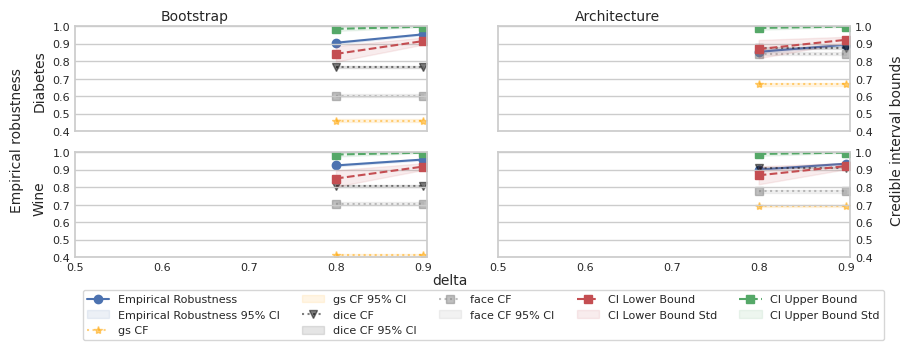

In [ ]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()
method = "gs"
_tmp_df = _tmp_df[_tmp_df["robust_cf_method"] == "betarob"].dropna(
    subset=["delta_robustness"]
)
drop_exp_type = "Seed"
_tmp_df = _tmp_df[_tmp_df["experiment_type"] != drop_exp_type]

# datasets = ['wine_quality', 'diabetes', 'fico', 'breast_cancer']
# rename_Datasets = ['Wine', 'Diabetes', 'Heloc', 'Br. Cancer']

datasets = ["diabetes", "wine_quality"]
rename_Datasets = ["Diabetes", "Wine"]
_tmp_df["dataset_name"] = _tmp_df["dataset_name"].replace(
    dict(zip(datasets, rename_Datasets))
)
datasets = rename_Datasets

experiment_types = _tmp_df["experiment_type"].unique()
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))
fig, axes = plt.subplots(
    nrows=rows, ncols=cols, figsize=(10, 3), sharex=True, sharey=True
)

print(delta_robustness)


for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df_fil = _tmp_df[
            (_tmp_df["dataset_name"] == dataset)
            & (_tmp_df["experiment_type"] == experiment_type)
        ]
        _df = _df_fil[_df_fil["base_cf_method"] == method]

        data = _df.groupby("delta_robustness")[
            "robust_counterfactual_validity_model2"
        ].mean()

        ax = axes[i, j]
        ax.plot(
            delta_robustness,
            data,
            marker="o",
            linestyle="-",
            color="b",
            label="Empirical Robustness",
        )
        emprob_ci = (
            1.96
            * _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].std()
            / np.sqrt(
                _df.groupby("delta_robustness")[
                    "robust_counterfactual_validity_model2"
                ].count()
            )
        )
        ax.fill_between(
            delta_robustness,
            data - emprob_ci,
            data + emprob_ci,
            color="b",
            alpha=0.1,
            label="Empirical Robustness 95% CI",
        )

        # ax.set_title(f'{dataset} \n{experiment_type}')

        data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
        data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

        ax2 = ax.twinx()

        ax2.plot(
            delta_robustness,
            data_lower,
            marker="s",
            linestyle="--",
            color="r",
            label="CI Lower Bound",
        )
        # add yerr for lower bound
        lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
        ax2.fill_between(
            delta_robustness,
            data_lower - lb_std,
            data_lower + lb_std,
            color="r",
            alpha=0.1,
            label="CI Lower Bound Std",
        )

        ax2.plot(
            delta_robustness,
            data_upper,
            marker="s",
            linestyle="--",
            color="g",
            label="CI Upper Bound",
        )
        # add yerr
        ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
        ax2.fill_between(
            delta_robustness,
            data_upper - ub_std,
            data_upper + ub_std,
            color="g",
            alpha=0.1,
            label="CI Upper Bound Std",
        )

        # Plot baseline
        linestyles = [":", ":", ":"]
        markers = ["*", "v", "s"]
        for k, (m, color) in enumerate(
            zip(["gs", "dice", "face"], ["orange", "black", "gray"])
        ):
            __df = _df_fil[_df_fil["base_cf_method"] == m]
            base = __df["base_counterfactual_validity_model2"].mean()
            base_std = __df["base_counterfactual_validity_model2"].std()
            base_ci = (
                1.96
                * base_std
                / np.sqrt(__df["base_counterfactual_validity_model2"].count())
            )
            ax.plot(
                delta_robustness,
                [base] * len(delta_robustness),
                color=color,
                linestyle=linestyles[k],
                label=f"{m} CF",
                marker=markers[k],
                alpha=0.5,
            )
            ax.fill_between(
                delta_robustness,
                base - base_ci,
                base + base_ci,
                color=color,
                alpha=0.1,
                label=f"{m} CF 95% CI",
            )

        l = 0.4
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
        ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

        # Decrease font size of the labels
        ax.tick_params(axis="both", which="major", labelsize=10)
        ax2.tick_params(axis="both", which="major", labelsize=10)

        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])

        # Remove the outline of the plot
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)

        ax.tick_params(axis="both", which="both", length=0)
        ax2.tick_params(axis="both", which="both", length=0)

        # Change ticks fontsize
        ax.tick_params(axis="both", which="major", labelsize=8)
        ax2.tick_params(axis="both", which="major", labelsize=8)

        # Remove grid
        ax.grid(False)

        handles, labels = ax.get_legend_handles_labels()
        handles_2, labels_2 = ax2.get_legend_handles_labels()

        handles_combined = handles + handles_2
        labels_combined = labels + labels_2

fig.text(0.5, 0.02, "delta", ha="center", fontsize=10)
fig.text(
    0.06, 0.5, "Empirical robustness", va="center", rotation="vertical", fontsize=10
)
fig.text(
    0.94, 0.5, "Credible interval bounds", va="center", rotation="vertical", fontsize=10
)
# Create one legend for the entire figure
fig.legend(
    handles_combined, labels_combined, bbox_to_anchor=(0.94, 0.02), ncol=5, fontsize=8
)

# Set titles for the rows with the dataset names
for ax, row in zip(axes[:, 0], datasets):
    rowlen = len(row)
    fig.text(
        ax.get_position().x0 - 0.035,
        ax.get_position().y0 + 0.6 * (1 / rowlen),
        row,
        ha="center",
        rotation="vertical",
        fontsize=10,
    )

# Set titles for the columns
for ax, col in zip(axes[0], experiment_types):
    fig.text(
        ax.get_position().x0 + 0.12,
        ax.get_position().y1 + 0.02,
        col,
        ha="center",
        fontsize=10,
    )


plt.savefig(
    f"{images_dir}/2_empirical_robustness_ci_bounds_paper.png",
    dpi=300,
    bbox_inches="tight",
)

# plt.tight_layout()
plt.show()


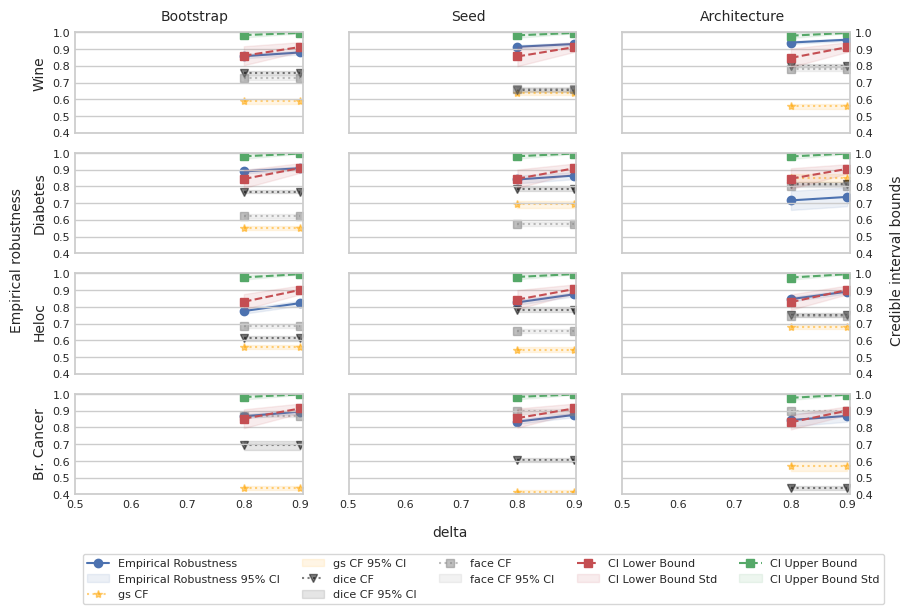

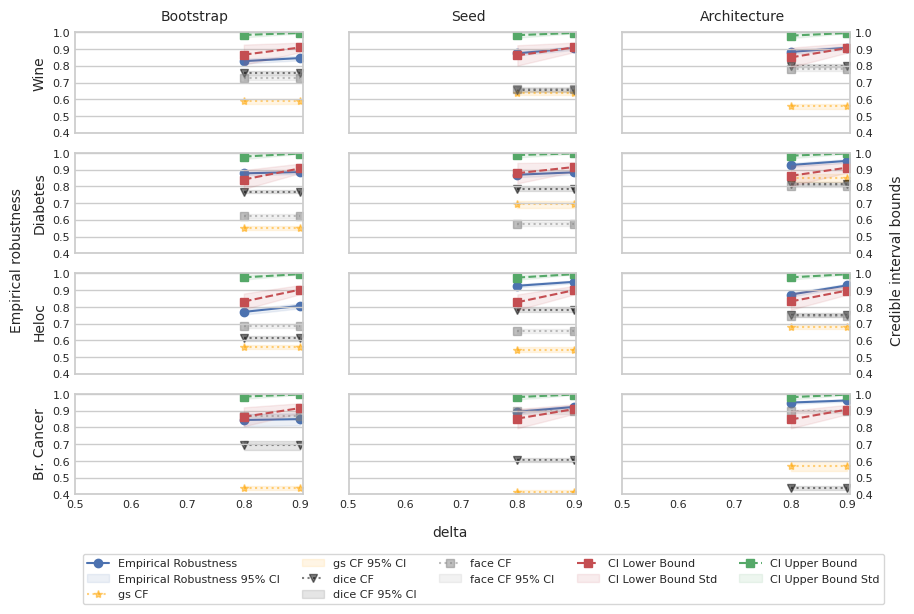

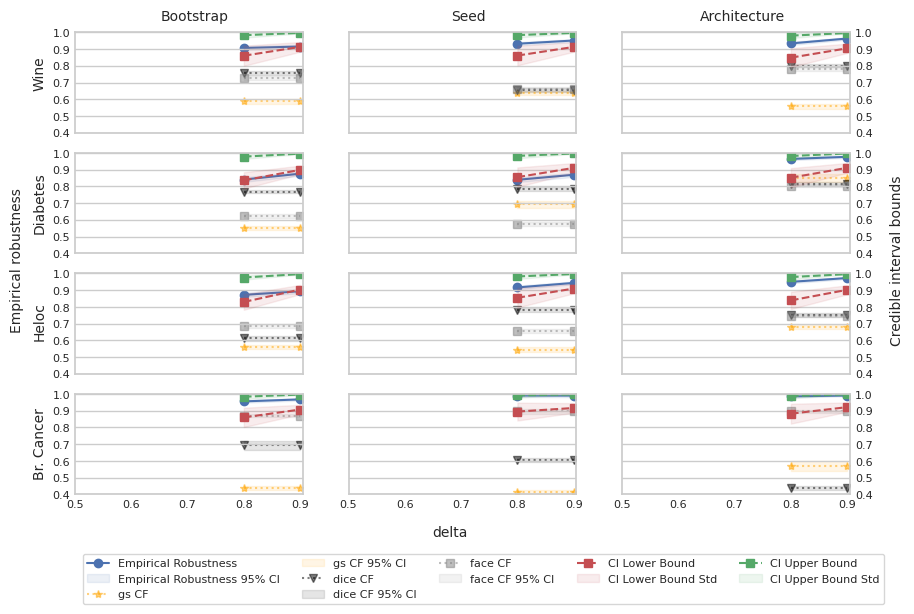

In [ ]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()

datasets = ["wine_quality", "diabetes", "fico", "breast_cancer"]
rename_Datasets = ["Wine", "Diabetes", "Heloc", "Br. Cancer"]

_tmp_df["dataset_name"] = _tmp_df["dataset_name"].replace(
    dict(zip(datasets, rename_Datasets))
)
datasets = rename_Datasets

experiment_types = _tmp_df["experiment_type"].unique()
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))


for method in ["gs", "dice", "face"]:
    fig, axes = plt.subplots(
        nrows=rows, ncols=cols, figsize=(10, 6), sharex=True, sharey=True
    )

    for i, dataset in enumerate(datasets):
        for j, experiment_type in enumerate(experiment_types):
            _df_fil = _tmp_df[
                (_tmp_df["dataset_name"] == dataset)
                & (_tmp_df["experiment_type"] == experiment_type)
            ]
            _df = _df_fil[_df_fil["base_cf_method"] == method]

            data = _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].mean()

            ax = axes[i, j]
            ax.plot(
                delta_robustness,
                data,
                marker="o",
                linestyle="-",
                color="b",
                label="Empirical Robustness",
            )
            emprob_ci = (
                1.96
                * _df.groupby("delta_robustness")[
                    "robust_counterfactual_validity_model2"
                ].std()
                / np.sqrt(
                    _df.groupby("delta_robustness")[
                        "robust_counterfactual_validity_model2"
                    ].count()
                )
            )
            ax.fill_between(
                delta_robustness,
                data - emprob_ci,
                data + emprob_ci,
                color="b",
                alpha=0.1,
                label="Empirical Robustness 95% CI",
            )

            # ax.set_title(f'{dataset} \n{experiment_type}')

            data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
            data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

            ax2 = ax.twinx()

            ax2.plot(
                delta_robustness,
                data_lower,
                marker="s",
                linestyle="--",
                color="r",
                label="CI Lower Bound",
            )
            # add yerr for lower bound
            lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
            ax2.fill_between(
                delta_robustness,
                data_lower - lb_std,
                data_lower + lb_std,
                color="r",
                alpha=0.1,
                label="CI Lower Bound Std",
            )

            ax2.plot(
                delta_robustness,
                data_upper,
                marker="s",
                linestyle="--",
                color="g",
                label="CI Upper Bound",
            )
            # add yerr
            ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
            ax2.fill_between(
                delta_robustness,
                data_upper - ub_std,
                data_upper + ub_std,
                color="g",
                alpha=0.1,
                label="CI Upper Bound Std",
            )

            # Plot baseline
            linestyles = [":", ":", ":"]
            markers = ["*", "v", "s"]
            for k, (m, color) in enumerate(
                zip(["gs", "dice", "face"], ["orange", "black", "gray"])
            ):
                __df = _df_fil[_df_fil["base_cf_method"] == m]
                base = __df["base_counterfactual_validity_model2"].mean()
                base_std = __df["base_counterfactual_validity_model2"].std()
                base_ci = (
                    1.96
                    * base_std
                    / np.sqrt(__df["base_counterfactual_validity_model2"].count())
                )
                ax.plot(
                    delta_robustness,
                    [base] * len(delta_robustness),
                    color=color,
                    linestyle=linestyles[k],
                    label=f"{m} CF",
                    marker=markers[k],
                    alpha=0.5,
                )
                ax.fill_between(
                    delta_robustness,
                    base - base_ci,
                    base + base_ci,
                    color=color,
                    alpha=0.1,
                    label=f"{m} CF 95% CI",
                )

            l = 0.4
            ax.set_ylim(l, 1)
            ax2.set_ylim(l, 1)
            ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
            ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
            ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

            # Decrease font size of the labels
            ax.tick_params(axis="both", which="major", labelsize=10)
            ax2.tick_params(axis="both", which="major", labelsize=10)

            # Turn off label ticks for ax2 on the plots that are not on the right
            if j != len(experiment_types) - 1:
                ax2.set_yticklabels([])

            # Remove the outline of the plot
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_visible(False)
            ax.spines["bottom"].set_visible(False)

            ax.tick_params(axis="both", which="both", length=0)
            ax2.tick_params(axis="both", which="both", length=0)

            # Change ticks fontsize
            ax.tick_params(axis="both", which="major", labelsize=8)
            ax2.tick_params(axis="both", which="major", labelsize=8)

            # Remove grid
            ax.grid(False)

            handles, labels = ax.get_legend_handles_labels()
            handles_2, labels_2 = ax2.get_legend_handles_labels()

            handles_combined = handles + handles_2
            labels_combined = labels + labels_2

    fig.text(0.5, 0.04, "delta", ha="center", fontsize=10)
    fig.text(
        0.06, 0.5, "Empirical robustness", va="center", rotation="vertical", fontsize=10
    )
    fig.text(
        0.94,
        0.5,
        "Credible interval bounds",
        va="center",
        rotation="vertical",
        fontsize=10,
    )
    # Create one legend for the entire figure
    fig.legend(
        handles_combined,
        labels_combined,
        bbox_to_anchor=(0.94, 0.02),
        ncol=5,
        fontsize=8,
    )

    # Set titles for the rows with the dataset names
    for ax, row in zip(axes[:, 0], datasets):
        rowlen = len(row)
        fig.text(
            ax.get_position().x0 - 0.035,
            ax.get_position().y0 + 0.3 * (1 / rowlen),
            row,
            ha="center",
            rotation="vertical",
            fontsize=10,
        )

    # Set titles for the columns
    for ax, col in zip(axes[0], experiment_types):
        fig.text(
            ax.get_position().x0 + 0.12,
            ax.get_position().y1 + 0.02,
            col,
            ha="center",
            fontsize=10,
        )

    plt.savefig(
        f"{images_dir}/2_empirical_robustness_ci_bounds_{method}.png",
        dpi=300,
        bbox_inches="tight",
    )

    # plt.tight_layout()
    plt.show()
    plt.close()

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[3] Comparision to RobX</div>

In [ ]:
robx_raw_df = raw_df[raw_df["robust_cf_method"] == "robx"].copy()

In [45]:
robx_raw_df.head(3)

Unnamed: 0 base_cf_method model_type_to_use experiment_type  \
4514117           0             gs          lightgbm       Bootstrap   
4514118           1             gs          lightgbm       Bootstrap   
4514119           2             gs          lightgbm       Bootstrap   

         dataset_name  just_base_cf  k_mlps_in_B  fold_i  \
4514117  wine_quality         False           32       1   
4514118  wine_quality         False           32       1   
4514119  wine_quality         False           32       1   

        experiment_generalization_type  beta_confidence  delta_robustness  \
4514117                      Bootstrap              0.4              0.01   
4514118                      Bootstrap              0.4              0.01   
4514119                      Bootstrap              0.4              0.01   

        model2_name                                      x_test_sample  \
4514117    Model2_1  [0.28333333 0.472      0.15662651 0.04715128 0...   
4514118    Model2_2  [0.28333333 0.472      0.15662651 0.04715128 0...   
4514119    Model2_3  [0.28333333 0.472      0.15662651 0.04715128 0...   

         y_test_sample  model1_pred_proba  model1_pred_crisp  \
4514117              0           0.317314                  0   
4514118              0           0.317314                  0   
4514119              0           0.317314                  0   

         model2_pred_proba  model2_pred_crisp  \
4514117           0.329248                  0   
4514118           0.339514                  0   
4514119           0.328270                  0   

                                       base_counterfactual  \
4514117  [0.26576955 0.47904911 0.14211491 0.04808925 0...   
4514118  [0.26576955 0.47904911 0.14211491 0.04808925 0...   
4514119  [0.26576955 0.47904911 0.14211491 0.04808925 0...   

         base_counterfactual_model1_pred_proba  \
4514117                               0.508744   
4514118                               0.508744   
4514119                               0.508744   

         base_counterfactual_model1_pred_crisp  \
4514117                                    1.0   
4514118                                    1.0   
4514119                                    1.0   

         base_counterfactual_model2_pred_proba  \
4514117                               0.434706   
4514118                               0.380605   
4514119                               0.450729   

         base_counterfactual_model2_pred_crisp  base_counterfactual_validity  \
4514117                                    0.0                           1.0   
4514118                                    0.0                           1.0   
4514119                                    0.0                           1.0   

         base_counterfactual_proximityL1  base_counterfactual_proximityL2  \
4514117                         0.129777                         0.045543   
4514118                         0.129777                         0.045543   
4514119                         0.129777                         0.045543   

         base_counterfactual_plausibility  \
4514117                          0.360792   
4514118                          0.360792   
4514119                          0.360792   

         base_counterfactual_discriminative_power  \
4514117                                  0.333333   
4514118                                  0.333333   
4514119                                  0.333333   

         base_counterfactual_validity_model2  base_counterfactual_time  \
4514117                                  0.0                  0.002072   
4514118                                  0.0                  0.002072   
4514119                                  0.0                  0.002072   

                                     robust_counterfactual  \
4514117  [0.27419259 0.4551442  0.15681908 0.04799546 0...   
4514118  [0.27419259 0.4551442  0.15681908 0.04799546 0...   
4514119  [0.29585926 0.4783442  0.14115643 0.0515318  0...  

In [ ]:
robx_raw_df.rename(
    columns={"beta_confidence": "tau", "delta_robustness": "variance"}, inplace=True
)
robx_raw_df

Unnamed: 0 base_cf_method model_type_to_use experiment_type  \
4514117           0             gs          lightgbm       Bootstrap   
4514118           1             gs          lightgbm       Bootstrap   
4514119           2             gs          lightgbm       Bootstrap   
4514120           3             gs          lightgbm       Bootstrap   
4514121           4             gs          lightgbm       Bootstrap   
...             ...            ...               ...             ...   
5324112          95           dice          lightgbm    Architecture   
5324113          96           dice          lightgbm    Architecture   
5324114          97           dice          lightgbm    Architecture   
5324115          98           dice          lightgbm    Architecture   
5324116          99           dice          lightgbm    Architecture   

         dataset_name  just_base_cf  k_mlps_in_B  fold_i  \
4514117  wine_quality         False           32       1   
4514118  wine_quality         False           32       1   
4514119  wine_quality         False           32       1   
4514120  wine_quality         False           32       1   
4514121  wine_quality         False           32       1   
...               ...           ...          ...     ...   
5324112          fico         False           32       0   
5324113          fico         False           32       0   
5324114          fico         False           32       0   
5324115          fico         False           32       0   
5324116          fico         False           32       0   

        experiment_generalization_type  tau  variance model2_name  \
4514117                      Bootstrap  0.4      0.01    Model2_1   
4514118                      Bootstrap  0.4      0.01    Model2_2   
4514119                      Bootstrap  0.4      0.01    Model2_3   
4514120                      Bootstrap  0.4      0.01    Model2_4   
4514121                      Bootstrap  0.4      0.01    Model2_5   
...                                ...  ...       ...         ...   
5324112                   Architecture  0.5      0.01   Model2_16   
5324113                   Architecture  0.5      0.01   Model2_17   
5324114                   Architecture  0.5      0.01   Model2_18   
5324115                   Architecture  0.5      0.01   Model2_19   
5324116                   Architecture  0.5      0.01   Model2_20   

                                             x_test_sample  y_test_sample  \
4514117  [0.28333333 0.472      0.15662651 0.04715128 0...              0   
4514118  [0.28333333 0.472      0.15662651 0.04715128 0...              0   
4514119  [0.28333333 0.472      0.15662651 0.04715128 0...              0   
4514120  [0.28333333 0.472      0.15662651 0.04715128 0...              0   
4514121  [0.28333333 0.472      0.15662651 0.04715128 0...              0   
...                                                    ...            ...   
5324112  [0.55769231 0.31732419 0.0877193  0.25714286 0...              0   
5324113  [0.55769231 0.31732419 0.0877193  0.25714286 0...              0   
5324114  [0.55769231 0.31732419 0.0877193  0.25714286 0...              0   
5324115  [0.55769231 0.31732419 0.0877193  0.25714286 0...              0   
5324116  [0.55769231 0.31732419 0.0877193  0.25714286 0...              0   

         model1_pred_proba  model1_pred_crisp  model2_pred_proba  \
4514117           0.317314                  0           0.329248   
4514118           0.317314                  0           0.339514   
4514119           0.317314                  0           0.328270   
4514120           0.317314                  0           0.254186   
4514121           0.317314                  0           0.249832   
...                    ...                ...                ...   
5324112           0.467191                  0           0.512738   
5324113           0.467191                  0           0.536048   
5324114           0.467191                  0           0

In [ ]:
robx_nn_gs_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "lightgbm")
    & (robx_raw_df["base_cf_method"] == "gs")
]
robx_nn_dice_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "lightgbm")
    & (robx_raw_df["base_cf_method"] == "dice")
]
robx_nn_face_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "lightgbm")
    & (robx_raw_df["base_cf_method"] == "face")
]
robx_nn_df = robx_raw_df[robx_raw_df["model_type_to_use"] == "lightgbm"]
robx_dt_gs_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "DecisionTree")
    & (robx_raw_df["base_cf_method"] == "gs")
]
robx_dt_dice_df = robx_raw_df[
    (robx_raw_df["model_type_to_use"] == "DecisionTree")
    & (robx_raw_df["base_cf_method"] == "dice")
]
robx_dt_df = robx_raw_df[robx_raw_df["model_type_to_use"] == "DecisionTree"]

print(
    f"Lengths of the dataframes: NN GS: {len(robx_nn_gs_df)}, NN Dice: {len(robx_nn_dice_df)}, NN Face: {len(robx_nn_face_df)}, NN: {len(robx_nn_df)}, DT GS: {len(robx_dt_gs_df)}, DT Dice: {len(robx_dt_dice_df)}, DT: {len(robx_dt_df)}"
)

Lengths of the dataframes: NN GS: 270000, NN Dice: 270000, NN Face: 270000, NN: 810000, DT GS: 0, DT Dice: 0, DT: 0


In [ ]:
_robx_df = robx_nn_gs_df.copy()
_betarob_df = nn_gs_df.copy()
_method_df = just_base_df.copy()

columns_to_keep = [
    "dataset_name",
    "experiment_type",
    "method_name",
    "robust_counterfactual_validity_model2",
    "robust_counterfactual_L1_distance_from_base_cf",
    "robust_counterfactual_proximityL1",
    "robust_counterfactual_proximityL2",
    "robust_counterfactual_plausibility",
    "robust_counterfactual_discriminative_power",
    "robust_counterfactual_time",
]

columns_to_keep_bs = [
    "dataset_name",
    "experiment_type",
    "method_name",
    "base_counterfactual_validity_model2",
    "robust_counterfactual_L1_distance_from_base_cf",
    "base_counterfactual_proximityL1",
    "base_counterfactual_proximityL2",
    "base_counterfactual_plausibility",
    "base_counterfactual_discriminative_power",
    "base_counterfactual_time",
]

rename_names = [
    "Dataset",
    "Experiment Type",
    "Method",
    "Empirical Robustness",
    "Distance to Base",
    "Proximity L1",
    "Proximity L2",
    "Plausibility",
    "Discriminative Power",
    "Time (s)",
]

# Process the dataframes
_robx_df["method_name"] = (
    "RobX"
    + "("
    + _robx_df["tau"].astype(str)
    + ","
    + _robx_df["variance"].astype(str)
    + ")"
)
_robx_df = _robx_df[columns_to_keep].rename(
    columns=dict(zip(columns_to_keep, rename_names))
)

_betarob_df["method_name"] = (
    "BetaRCE"
    + "("
    + _betarob_df["delta_robustness"].astype(str)
    + ","
    + _betarob_df["beta_confidence"].astype(str)
    + ")"
)
_betarob_df = _betarob_df[columns_to_keep].rename(
    columns=dict(zip(columns_to_keep, rename_names))
)

_method_df["method_name"] = _method_df["base_cf_method"]
_method_df = _method_df[columns_to_keep_bs].rename(
    columns=dict(zip(columns_to_keep_bs, rename_names))
)

datasets = _robx_df["Dataset"].unique()
experiment_types = _robx_df["Experiment Type"].unique()

In [49]:
_method_df

Dataset Experiment Type Method  Empirical Robustness  \
0                 fico            Seed   dice                   0.0   
1                 fico            Seed   dice                   0.0   
2                 fico            Seed   dice                   1.0   
3                 fico            Seed   dice                   1.0   
4                 fico            Seed   dice                   0.0   
...                ...             ...    ...                   ...   
2559595  breast_cancer            Seed   face                   1.0   
2559596  breast_cancer            Seed   face                   1.0   
2559597  breast_cancer            Seed   face                   1.0   
2559598  breast_cancer            Seed   face                   1.0   
2559599  breast_cancer            Seed   face                   1.0   

         Distance to Base  Proximity L1  Proximity L2  Plausibility  \
0                     NaN      1.790260      1.274563      1.040331   
1                     NaN      1.790260      1.274563      1.040331   
2                     NaN      1.790260      1.274563      1.040331   
3                     NaN      1.790260      1.274563      1.040331   
4                     NaN      1.790260      1.274563      1.040331   
...                   ...           ...           ...           ...   
2559595               NaN      1.477253      0.417254      0.394216   
2559596               NaN      1.477253      0.417254      0.394216   
2559597               NaN      1.477253      0.417254      0.394216   
2559598               NaN      1.477253      0.417254      0.394216   
2559599               NaN      1.477253      0.417254      0.394216   

         Discriminative Power  Time (s)  
0                         0.6  0.391882  
1                         0.6  0.391882  
2                         0.6  0.391882  
3                         0.6  0.391882  
4                         0.6  0.391882  
...                       ...       ...  
2559595                   0.6  0.045283  
2559596                   0.6  0.045283  
2559597                   0.6  0.045283  
2559598                   0.6  0.045283  
2559599                   0.6  0.045283  

[2559600 rows x 10 columns]

In [ ]:
metrics = [
    "Distance to Base",
    "Proximity L1",
    "Proximity L2",
    "Plausibility",
    "Discriminative Power",
    "Time (s)",
]

groupby = ["Dataset", "Experiment Type", "Method"]
groupby_metrics = ["Dataset", "Method"]
# keep_robx = ['RobX(0.5,0.01)', 'RobX(0.5,0.1)', 'RobX(0.7,0.01)', 'RobX(0.7,0.1)']
# baselines = ['GrowingSpheres', 'Dice']
# keepRCE = ['BetaRCE(0.6,0.95)', 'BetaRCE(0.7,0.95)', 'BetaRCE(0.8,0.95)', 'BetaRCE(0.9,0.95)']


# -- ROBX --
robx_grouped = _robx_df.groupby(groupby).mean(numeric_only=False)
# robx_grouped = robx_grouped[robx_grouped.index.get_level_values('Method')]

print(robx_grouped)


# Empirical
robx_grouped_emp = robx_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
robx_grouped_method = robx_grouped.groupby(groupby_metrics)[metrics].mean(
    numeric_only=False
)
robx_grouped_method["Experiment Type"] = ["-"] * len(robx_grouped_method)
robx_grouped_method = robx_grouped_method.set_index(["Experiment Type"], append=True)
robx_grouped_method = robx_grouped_method.reorder_levels([0, 2, 1])


# -- Baselines --
method_grouped = _method_df.groupby(groupby)
method_grouped = method_grouped.mean(numeric_only=False)
# method_grouped = method_grouped[method_grouped.index.get_level_values('Method').isin(baselines)]
# Empirical
method_grouped_emp = method_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
method_grouped_method = method_grouped.groupby(groupby_metrics)[metrics].mean(
    numeric_only=False
)
method_grouped_method["Experiment Type"] = ["-"] * len(method_grouped_method)
method_grouped_method = method_grouped_method.set_index(
    ["Experiment Type"], append=True
)
method_grouped_method = method_grouped_method.reorder_levels([0, 2, 1])

# -- RCE --
rce_grouped = _betarob_df.groupby(groupby)
rce_grouped = rce_grouped.mean(numeric_only=False)
# rce_grouped = rce_grouped[rce_grouped.index.get_level_values('Method').isin(keepRCE)]
# Empirical
rce_grouped_emp = rce_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
rce_grouped_method = rce_grouped[metrics]
# rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


# CONCAT
all_emp = pd.concat([method_grouped_emp, robx_grouped_emp, rce_grouped_emp]).sort_index(
    level=0, sort_remaining=False
)
all_emp.to_csv(f"{images_dir}/all_emp.csv")
met_emp = pd.concat(
    [method_grouped_method, robx_grouped_method, rce_grouped_method]
).sort_index(level=0)
met_emp.to_csv(f"{images_dir}/all_met.csv")

                                              Empirical Robustness  \
Dataset       Experiment Type Method                                 
breast_cancer Architecture    RobX(0.4,0.01)              0.823111   
                              RobX(0.5,0.01)              0.959111   
                              RobX(0.6,0.01)              0.996667   
                              RobX(0.7,0.01)              1.000000   
                              RobX(0.8,0.01)              1.000000   
              Bootstrap       RobX(0.4,0.01)              0.730222   
                              RobX(0.5,0.01)              0.904444   
                              RobX(0.6,0.01)              0.971111   
                              RobX(0.7,0.01)              0.991111   
                              RobX(0.8,0.01)              0.999333   
              Seed            RobX(0.4,0.01)              0.733111   
                              RobX(0.5,0.01)              0.920222   
                    

In [51]:
all_emp

Experiment Type                  Architecture  Bootstrap      Seed
Dataset       Method                                              
breast_cancer dice                   0.559053   0.595610  0.505336
              face                   0.929926   0.867852  0.904815
              gs                     0.542963   0.537407  0.472222
              rbr                    0.376598   0.342551  0.352209
              roar                   0.386481   0.384156  0.378230
...                                       ...        ...       ...
wine_quality  BetaRCE(0.8,0.9)       0.916296   0.909630  0.828889
              BetaRCE(0.8,0.95)      0.893111   0.935915  0.727556
              BetaRCE(0.9,0.9)       0.948889   0.943333  0.875185
              BetaRCE(0.9,0.95)      0.927556   0.969583  0.826667
              BetaRCE(nan,nan)            NaN        NaN       NaN

[80 rows x 3 columns]

In [54]:
met_emp.head(50)

Distance to Base  \
Dataset       Experiment Type Method                                
breast_cancer -               RobX(0.4,0.01)             2.031644   
                              RobX(0.5,0.01)             2.848714   
                              RobX(0.6,0.01)             3.320686   
                              RobX(0.7,0.01)             3.647826   
                              RobX(0.8,0.01)             4.099922   
                              dice                            NaN   
                              face                            NaN   
                              gs                              NaN   
                              rbr                             NaN   
                              roar                            NaN   
              Architecture    BetaRCE(0.01,0.4)          2.005207   
                              BetaRCE(0.01,0.5)          2.878489   
                              BetaRCE(0.01,0.6)          3.432525   
                              BetaRCE(0.01,0.7)          3.753825   
                              BetaRCE(0.01,0.8)          4.232876   
                              BetaRCE(0.8,0.9)           3.326837   
                              BetaRCE(0.8,0.95)          1.868269   
                              BetaRCE(0.9,0.9)           3.869122   
                              BetaRCE(0.9,0.95)          2.547070   
                              BetaRCE(nan,nan)                NaN   
              Bootstrap       BetaRCE(0.01,0.4)          2.217145   
                              BetaRCE(0.01,0.5)          2.964052   
                              BetaRCE(0.01,0.6)          3.324030   
                              BetaRCE(0.01,0.7)          3.639094   
                              BetaRCE(0.01,0.8)          4.147633   
                              BetaRCE(0.8,0.9)           3.637054   
                              BetaRCE(0.8,0.95)          4.706622   
                              BetaRCE(0.9,0.9)           4.386070   
                              BetaRCE(0.9,0.95)          6.831302   
                              BetaRCE(nan,nan)                NaN   
              Seed            BetaRCE(0.01,0.4)          1.872580   
                              BetaRCE(0.01,0.5)          2.703600   
                              BetaRCE(0.01,0.6)          3.205502   
                              BetaRCE(0.01,0.7)          3.550560   
                              BetaRCE(0.01,0.8)          3.919257   
                              BetaRCE(0.8,0.9)           2.417687   
                              BetaRCE(0.8,0.95)          2.812527   
                              BetaRCE(0.9,0.9)           2.888807   
                              BetaRCE(0.9,0.95)          3.555194   
                              BetaRCE(nan,nan)                NaN   
diabetes      -               RobX(0.4,0.01)             0.358301   
                              RobX(0.5,0.01)             0.600234   
                              RobX(0.6,0.01)             0.814141   
                              RobX(0.7,0.01)             1.154363   
                              RobX(0.8,0.01)             1.279495   
                              dice                            NaN   
                              face                            NaN   
                              gs                              NaN   
                              rbr                             NaN   
                              roar                            NaN   

                                                 Proximity L1  Proximity L2  \
Dataset       Experiment Type Method                                          
breast_cancer -               RobX(0.4,0.01)         2.694047      0.615817   
                              RobX(0.5,0.01)         3.116403      0.710099   
                              RobX(0.6,0.01)         3.473890      0.792413   
                              RobX(0.7,0.01)         3.798244    

In [ ]:
metrics = [
    "Distance to Base",
    "Proximity L1",
    "Proximity L2",
    "Plausibility",
    "Discriminative Power",
    "Time (s)",
]

groupby = ["Dataset", "Experiment Type", "Method"]
groupby_metrics = ["Dataset", "Method"]
# keep_robx = ['RobX(0.5,0.01)', 'RobX(0.5,0.1)', 'RobX(0.6,0.01)', 'RobX(0.6,0.1)']
# baselines = ['GrowingSpheres', 'Dice']
# keepRCE = ['BetaRCE(0.6,0.95)', 'BetaRCE(0.7,0.95)', 'BetaRCE(0.8,0.95)', 'BetaRCE(0.9,0.95)']


# -- ROBX --
robx_grouped = _robx_df.groupby(groupby)
robx_grouped = robx_grouped.std(numeric_only=False) / np.sqrt(robx_grouped.count())
# robx_grouped = robx_grouped[robx_grouped.index.get_level_values('Method').isin(keep_robx)]
# Empirical
robx_grouped_emp = robx_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
robx_grouped_method = robx_grouped.groupby(groupby_metrics)[metrics]
robx_grouped_method = robx_grouped_method.std(numeric_only=False) / np.sqrt(
    robx_grouped_method.count()
)
robx_grouped_method["Experiment Type"] = ["-"] * len(robx_grouped_method)
robx_grouped_method = robx_grouped_method.set_index(["Experiment Type"], append=True)
robx_grouped_method = robx_grouped_method.reorder_levels([0, 2, 1])


# -- Baselines --
method_grouped = _method_df.groupby(groupby)
method_grouped = method_grouped.std(numeric_only=False) / np.sqrt(
    method_grouped.count()
)
# method_grouped = method_grouped[method_grouped.index.get_level_values('Method').isin(baselines)]
# Empirical
method_grouped_emp = method_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
method_grouped_method = method_grouped.groupby(groupby_metrics)[metrics]
method_grouped_method = method_grouped_method.std(numeric_only=False) / np.sqrt(
    method_grouped_method.count()
)
method_grouped_method["Experiment Type"] = ["-"] * len(method_grouped_method)
method_grouped_method = method_grouped_method.set_index(
    ["Experiment Type"], append=True
)
method_grouped_method = method_grouped_method.reorder_levels([0, 2, 1])

# -- RCE --
rce_grouped = _betarob_df.groupby(groupby)
rce_grouped = rce_grouped.std(numeric_only=False) / np.sqrt(rce_grouped.count())
# rce_grouped = rce_grouped[rce_grouped.index.get_level_values('Method').isin(keepRCE)]
# Empirical
rce_grouped_emp = rce_grouped.unstack(level=-2)["Empirical Robustness"]
# Metrics
rce_grouped_method = rce_grouped[metrics]
# rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


# CONCAT
all_emp_std = pd.concat(
    [method_grouped_emp, robx_grouped_emp, rce_grouped_emp]
).sort_index(level=0, sort_remaining=False)
all_emp_std.to_csv(f"{images_dir}/all_emp_std.csv")
met_emp_std = pd.concat(
    [method_grouped_method, robx_grouped_method, rce_grouped_method]
).sort_index(level=0)
met_emp_std.to_csv(f"{images_dir}/all_met_std.csv")

In [ ]:
all_comprehensive = (
    all_emp.round(3).astype(str) + " +- " + all_emp_std.round(3).astype(str)
)


allowed_methods = [
    "dice",
    "gs",
    "face",
    "roar",
    "rbr",
    "RobX(0.5,0.01)",
    "RobX(0.6,0.01)",
    "BetaRCE(0.8,0.95)",
    "BetaRCE(0.9,0.95)",
]


all_comprehensive = all_comprehensive.loc[(slice(None), allowed_methods), :].sort_index(
    level=0, sort_remaining=True
)


all_comprehensive.to_csv(f"{images_dir}/all_with_se.csv")
all_comprehensive.head(20)

Experiment Type                    Architecture       Bootstrap  \
Dataset       Method                                              
breast_cancer BetaRCE(0.8,0.95)  0.902 +- 0.008  0.931 +- 0.009   
              BetaRCE(0.9,0.95)  0.936 +- 0.007  0.964 +- 0.006   
              RobX(0.5,0.01)     0.959 +- 0.003  0.904 +- 0.004   
              RobX(0.6,0.01)     0.997 +- 0.001  0.971 +- 0.002   
              dice               0.559 +- 0.002  0.596 +- 0.002   
              face                0.93 +- 0.002  0.868 +- 0.003   
              gs                  0.543 +- 0.01   0.537 +- 0.01   
              rbr                0.377 +- 0.002  0.343 +- 0.002   
              roar               0.386 +- 0.002  0.384 +- 0.002   
diabetes      BetaRCE(0.8,0.95)  0.848 +- 0.005  0.902 +- 0.005   
              BetaRCE(0.9,0.95)  0.888 +- 0.005  0.955 +- 0.003   
              RobX(0.5,0.01)     0.934 +- 0.004  0.878 +- 0.005   
              RobX(0.6,0.01)     0.998 +- 0.001  0.961 +- 0.003   
              dice               0.866 +- 0.001    0.7 +- 0.002   
              face               0.864 +- 0.003  0.692 +- 0.004   
              gs                 0.726 +- 0.009  0.639 +- 0.011   
              rbr                0.606 +- 0.002  0.594 +- 0.002   
              roar               0.346 +- 0.002   0.36 +- 0.002   
fico          BetaRCE(0.8,0.95)  0.867 +- 0.009  0.875 +- 0.009   
              BetaRCE(0.9,0.95)  0.889 +- 0.008   0.94 +- 0.006   

Experiment Type                            Seed  
Dataset       Method                             
breast_cancer BetaRCE(0.8,0.95)  0.599 +- 0.013  
              BetaRCE(0.9,0.95)    0.7 +- 0.012  
              RobX(0.5,0.01)      0.92 +- 0.004  
              RobX(0.6,0.01)     0.981 +- 0.002  
              dice               0.505 +- 0.002  
              face               0.905 +- 0.003  
              gs                  0.472 +- 0.01  
              rbr                0.352 +- 0.002  
              roar               0.378 +- 0.002  
diabetes      BetaRCE(0.8,0.95)  0.782 +- 0.006  
              BetaRCE(0.9,0.95)  0.847 +- 0.005  
              RobX(0.5,0.01)     0.937 +- 0.004  
              RobX(0.6,0.01)     0.989 +- 0.002  
              dice               0.745 +- 0.002  
              face               0.726 +- 0.004  
              gs                  0.552 +- 0.01  
              rbr                0.569 +- 0.002  
              roar               0.346 +- 0.002  
fico          BetaRCE(0.8,0.95)  0.747 +- 0.009  
              BetaRCE(0.9,0.95)  0.836 +- 0.008

In [ ]:
all_metrics_comprehensive = (
    met_emp.round(3).astype(str) + " +- " + met_emp_std.round(3).astype(str)
)
# Drop time and discriminative power
all_metrics_comprehensive = all_metrics_comprehensive.drop(
    columns=["Time (s)", "Discriminative Power"]
)
all_metrics_comprehensive.to_csv(f"{images_dir}/all_metrics_with_se.csv")
all_metrics_comprehensive.head(100)

Distance to Base  \
Dataset       Experiment Type Method                               
breast_cancer -               RobX(0.4,0.01)      2.032 +- 0.001   
                              RobX(0.5,0.01)        2.849 +- 0.0   
                              RobX(0.6,0.01)        3.321 +- 0.0   
                              RobX(0.7,0.01)        3.648 +- 0.0   
                              RobX(0.8,0.01)          4.1 +- 0.0   
...                                                          ...   
fico          Architecture    BetaRCE(0.8,0.9)    1.149 +- 0.026   
                              BetaRCE(0.8,0.95)   1.989 +- 0.054   
                              BetaRCE(0.9,0.9)    1.485 +- 0.032   
                              BetaRCE(0.9,0.95)   2.797 +- 0.076   
                              BetaRCE(nan,nan)        nan +- nan   

                                                   Proximity L1  \
Dataset       Experiment Type Method                              
breast_cancer -               RobX(0.4,0.01)       2.694 +- 0.0   
                              RobX(0.5,0.01)       3.116 +- 0.0   
                              RobX(0.6,0.01)       3.474 +- 0.0   
                              RobX(0.7,0.01)       3.798 +- 0.0   
                              RobX(0.8,0.01)       4.235 +- 0.0   
...                                                         ...   
fico          Architecture    BetaRCE(0.8,0.9)   1.851 +- 0.031   
                              BetaRCE(0.8,0.95)  2.486 +- 0.063   
                              BetaRCE(0.9,0.9)   2.134 +- 0.036   
                              BetaRCE(0.9,0.95)  3.193 +- 0.084   
                              BetaRCE(nan,nan)       nan +- nan   

                                                   Proximity L2  \
Dataset       Experiment Type Method                              
breast_cancer -               RobX(0.4,0.01)       0.616 +- 0.0   
                              RobX(0.5,0.01)        0.71 +- 0.0   
                              RobX(0.6,0.01)       0.792 +- 0.0   
                              RobX(0.7,0.01)       0.866 +- 0.0   
                              RobX(0.8,0.01)       0.964 +- 0.0   
...                                                         ...   
fico          Architecture    BetaRCE(0.8,0.9)   0.477 +- 0.008   
                              BetaRCE(0.8,0.95)  0.638 +- 0.016   
                              BetaRCE(0.9,0.9)   0.549 +- 0.009   
                              BetaRCE(0.9,0.95)  0.819 +- 0.021   
                              BetaRCE(nan,nan)       nan +- nan   

                                                   Plausibility  
Dataset       Experiment Type Method                             
breast_cancer -               RobX(0.4,0.01)       0.541 +- 0.0  
                              RobX(0.5,0.01)       0.471 +- 0.0  
                              RobX(0.6,0.01)       0.443 +- 0.0  
                              RobX(0.7,0.01)       0.424 +- 0.0  
                              RobX(0.8,0.01)       0.414 +- 0.0  
...                                                         ...  
fico          Architecture    BetaRCE(0.8,0.9)    0.67 +- 0.005  
                              BetaRCE(0.8,0.95)   0.78 +- 0.011  
                              BetaRCE(0.9,0.9)   0.709 +- 0.006  
                              BetaRCE(0.9,0.95)  0.895 +- 0.016  
                              BetaRCE(nan,nan)       nan +- nan  

[100 rows x 4 columns]

Histograms with distance

In [ ]:
# methods_to_use = ['RobX-0.5-0.01','RobX-0.5-0.1', '\u0394-RCE-0.8-0.95', '\u0394-RCE-0.9-0.95', 'GrowingSpheres', 'Dice']
methods_to_use = [
    "RobX-0.5-0.01",
    "RobX-0.5-0.1",
    "RobX-0.6-0.01",
    "RobX-0.6-0.1",
    "\u0394-RCE-0.8-0.95",
    "\u0394-RCE-0.9-0.95",
]

tmp_rce = nn_gs_df.copy().dropna()
tmp_rce["Method"] = (
    "\u0394-RCE"
    + "-"
    + tmp_rce["delta_robustness"].astype(str)
    + "-"
    + tmp_rce["beta_confidence"].astype(str)
)

tmp_robx = robx_nn_gs_df.copy().dropna()
tmp_robx["Method"] = (
    "RobX" + "-" + tmp_robx["tau"].astype(str) + "-" + tmp_robx["variance"].astype(str)
)

tmp = pd.concat([tmp_robx, tmp_rce], axis=0, ignore_index=True)

columns = {
    "robust_counterfactual_validity_model2": "Empirical Robustness",
    "robust_counterfactual_L1_distance_from_base_cf": "Distance to Base",
    "robust_counterfactual_proximityL1": "Proximity L1",
    "robust_counterfactual_plausibility": "Plausibility",
    "robust_counterfactual_discriminative_power": "Discriminative Power",
    "dataset_name": "Dataset",
    "experiment_type": "Experiment Type",
    "Method": "Method",
}


column = "Distance to Base"
color_by = "Method"


tmp = tmp.rename(columns=columns)
tmp = tmp[list(columns.values())]
tmp = tmp[tmp["Method"].isin(methods_to_use)]


for dataset in tmp["Dataset"].unique():
    _tmp = tmp[tmp["Dataset"] == dataset]
    # tmp = tmp[tmp['Experiment Type'] == experiment_type]
    sns.displot(
        data=_tmp, x=column, hue=color_by, kind="hist", alpha=0.7, col="Experiment Type"
    )
    plt.suptitle(f"Histogram of {column} for {dataset}", x=0.5, y=1.05)
    plt.savefig(
        f"{images_dir}/histogram_{column}_{dataset}.png", dpi=300, bbox_inches="tight"
    )


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_1] Ablation (k mlps sweep)</div>

In [ ]:
conf_sweep_results_path = results_path + "/confidence"
conf_sweep_raw_df = process_results(conf_sweep_results_path)

No config file found in aaai_experiments/results_aaai//confidence


In [ ]:
conf_sweep_raw_df["beta_confidence"].value_counts()

0.70    14400
0.80    14400
0.90    14282
0.95    14220
Name: beta_confidence, dtype: int64

In [ ]:
conf_sweep_raw_df["delta_robustness"].value_counts()

0.7    19131
0.8    19091
0.9    19080
Name: delta_robustness, dtype: int64

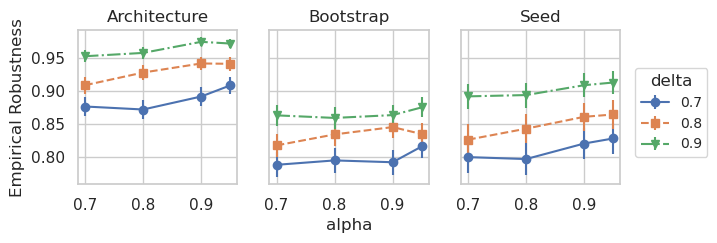

In [ ]:
experiments = conf_sweep_raw_df["experiment_type"].unique()

figwidth = 7
fig, axes = plt.subplots(
    ncols=len(experiments), figsize=(figwidth, 2), sharex=True, sharey=True
)

markers = ["o", "s", "v", "D"]
linestyles = ["-", "--", "-.", ":"]

for i, experiment in enumerate(experiments):
    ax = axes[i] if len(experiments) > 1 else axes

    tmp_conf_df = conf_sweep_raw_df.copy()
    tmp_conf_df = tmp_conf_df[tmp_conf_df["experiment_type"] == experiment]

    for j, delta in enumerate(tmp_conf_df["delta_robustness"].unique()):
        tmp_delta_df = tmp_conf_df[tmp_conf_df["delta_robustness"] == delta]
        # sns.lineplot(data=tmp_delta_df, x='beta_confidence', y='robust_counterfactual_validity_model2', ax=ax, label=f'delta={delta}')

        data = tmp_delta_df.groupby("beta_confidence")[
            "robust_counterfactual_validity_model2"
        ].mean()
        std = tmp_delta_df.groupby("beta_confidence")[
            "robust_counterfactual_validity_model2"
        ].std()
        cnt = tmp_delta_df.groupby("beta_confidence")[
            "robust_counterfactual_validity_model2"
        ].count()

        ax.errorbar(
            data.index,
            data,
            yerr=1.96 * std / np.sqrt(cnt),
            label=f"{delta}",
            marker=markers[j],
            linestyle=linestyles[j],
        )

    ax.set_title(experiment)
    if i == 1:
        ax.set_xlabel("alpha")
    if i == 0:
        ax.set_ylabel("Empirical Robustness")

plt.legend(
    title="delta", bbox_to_anchor=(1.05, 0.8), loc="upper left", ncol=1, fontsize=10
)

plt.savefig(
    f"{images_dir}/4_1_empirical_robustness_vs_beta_confidence_and_delta.png",
    dpi=300,
    bbox_inches="tight",
)

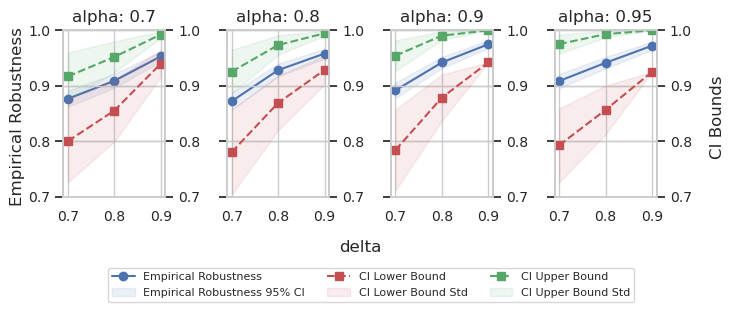

In [ ]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = conf_sweep_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df["experiment_type"] == "Architecture"]
method = "GrowingSpheres"

conf = sorted(_tmp_df["beta_confidence"].unique().tolist())
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
plt.close()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(7, 2.5), sharex=True, sharey=True)
axes = axes.flatten()


for i, c in enumerate(conf):
    _df = _tmp_df[(_tmp_df["beta_confidence"] == c)]

    data = _df.groupby("delta_robustness")[
        "robust_counterfactual_validity_model2"
    ].mean()
    ax = axes[i]
    ax.plot(
        delta_robustness,
        data,
        marker="o",
        linestyle="-",
        color="b",
        label="Empirical Robustness",
    )
    emprob_ci = (
        1.96
        * _df.groupby("delta_robustness")["robust_counterfactual_validity_model2"].std()
        / np.sqrt(
            _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].count()
        )
    )
    ax.fill_between(
        delta_robustness,
        data - emprob_ci,
        data + emprob_ci,
        color="b",
        alpha=0.1,
        label="Empirical Robustness 95% CI",
    )

    ax.set_title(f"alpha: {c}")

    data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
    data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

    ax2 = ax.twinx()

    ax2.plot(
        delta_robustness,
        data_lower,
        marker="s",
        linestyle="--",
        color="r",
        label="CI Lower Bound",
    )
    # add yerr for lower bound
    lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_lower - lb_std,
        data_lower + lb_std,
        color="r",
        alpha=0.1,
        label="CI Lower Bound Std",
    )

    ax2.plot(
        delta_robustness,
        data_upper,
        marker="s",
        linestyle="--",
        color="g",
        label="CI Upper Bound",
    )
    # add yerr
    ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_upper - ub_std,
        data_upper + ub_std,
        color="g",
        alpha=0.1,
        label="CI Upper Bound Std",
    )

    l = 0.7
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.7, 0.8, 0.9])
    ax.set_yticks([0.7, 0.8, 0.9, 1])
    ax2.set_yticks([0.7, 0.8, 0.9, 1])

    # Decrease font size of the labels
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax2.tick_params(axis="both", which="major", labelsize=10)

    # Turn off label ticks for ax2 on the plots that are not on the right
    if j != len(experiment_types) - 1:
        ax2.set_yticklabels([])

    handles, labels = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    handles_combined = handles + handles2
    labels_combined = labels + labels2


# Add one xlabel for all the plots
fig.text(0.5, -0.04, "delta", ha="center")
fig.text(0.00, 0.5, "Empirical Robustness", va="center", rotation="vertical")
fig.text(1.0, 0.5, "CI Bounds", va="center", rotation="vertical")

fig.legend(
    bbox_to_anchor=(0.9, -0.08),
    handles=handles_combined,
    labels=labels_combined,
    ncol=3,
    fontsize=8,
)

plt.tight_layout()
plt.savefig(
    f"{images_dir}/4_1_empirical_robustness_ci_bounds_vs_confidence.png",
    dpi=300,
    bbox_inches="tight",
)

plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_2] Ablation (k)</div>

In [ ]:
k_sweep_results_path = results_path + "/k"
k_raw_df = process_results(k_sweep_results_path)

Reading results: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


In [ ]:
k_raw_df["delta_robustness"].value_counts()

0.7    26263
0.8    26220
0.9    26220
Name: delta_robustness, dtype: int64

In [ ]:
k_raw_df["k_mlps_in_B"].value_counts()

8     16200
16    16200
24    10801
48    10800
40    10800
32    10800
56     3102
Name: k_mlps_in_B, dtype: int64

In [ ]:
# Drop where k=56 as this run crashed
k_raw_df = k_raw_df[k_raw_df["k_mlps_in_B"] != 56]

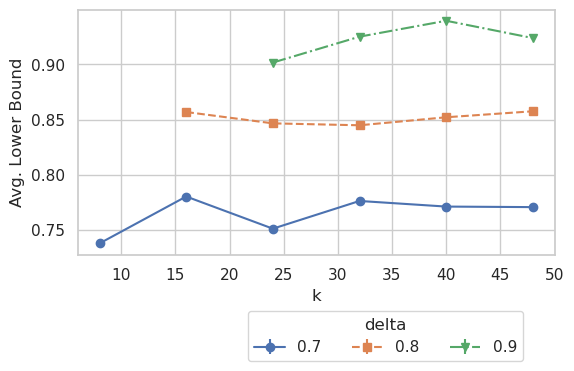

In [ ]:
fig, axes = plt.subplots(figsize=(6, 4))

markers = ["o", "s", "v"]
linestyles = ["-", "--", "-."]

for i, delta in enumerate(k_raw_df["delta_robustness"].unique()):
    _df = k_raw_df[k_raw_df["delta_robustness"] == delta]
    data = _df.groupby("k_mlps_in_B")["lower_bound_beta"].mean()
    std = _df.groupby("k_mlps_in_B")["lower_bound_beta"].std()
    cnt = _df.groupby("k_mlps_in_B")["lower_bound_beta"].count()

    axes.errorbar(
        data.index,
        data,
        yerr=1.96 * std / np.sqrt(cnt),
        label=f"{delta}",
        marker=markers[i],
        linestyle=linestyles[i],
    )

plt.legend(title="delta", bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.xlabel("k")
plt.ylabel("Avg. Lower Bound")
plt.tight_layout()

plt.savefig(f"{images_dir}/4_2_lb_beta_vs_k_mlps.png", dpi=300, bbox_inches="tight")

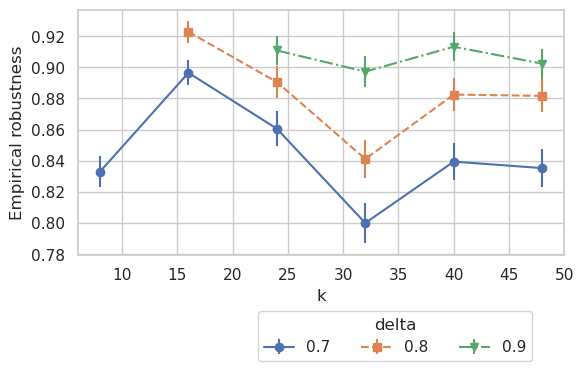

In [ ]:
fig, axes = plt.subplots(figsize=(6, 4))

markers = ["o", "s", "v"]
linestyles = ["-", "--", "-."]

for i, delta in enumerate(k_raw_df["delta_robustness"].unique()):
    _df = k_raw_df[k_raw_df["delta_robustness"] == delta]
    data = _df.groupby("k_mlps_in_B")["robust_counterfactual_validity_model2"].mean()
    std = _df.groupby("k_mlps_in_B")["robust_counterfactual_validity_model2"].std()
    cnt = _df.groupby("k_mlps_in_B")["robust_counterfactual_validity_model2"].count()

    axes.errorbar(
        data.index,
        data,
        yerr=1.96 * std / np.sqrt(cnt),
        label=f"{delta}",
        marker=markers[i],
        linestyle=linestyles[i],
    )

plt.legend(title="delta", bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.xlabel("k")
plt.ylabel("Empirical robustness")
plt.tight_layout()

plt.savefig(f"{images_dir}/4_2_ER_vs_k_mlps.png", dpi=300, bbox_inches="tight")

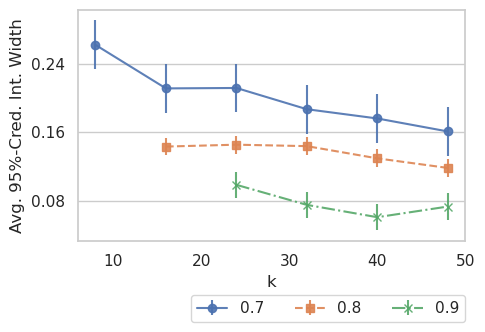

In [ ]:
from matplotlib.ticker import FormatStrFormatter

_tmp_df = k_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df["experiment_type"] == "Architecture"]

fig, ax = plt.subplots(figsize=(5, 3))

_tmp_df["lb-ub"] = _tmp_df["upper_bound_beta"] - _tmp_df["lower_bound_beta"]
delts = _tmp_df["delta_robustness"].unique()
ks = sorted(_tmp_df["k_mlps_in_B"].unique())
av_ci_width = (
    _tmp_df.groupby(["k_mlps_in_B", "delta_robustness"])["lb-ub"].mean().reset_index()
)

markers = ["o", "s", "x", "d", "^"]
linestyles = ["-", "--", "-.", ":", "-"]

for i, delta in enumerate(delts):
    data = av_ci_width[av_ci_width["delta_robustness"] == delta]
    plt.errorbar(
        data["k_mlps_in_B"],
        data["lb-ub"],
        marker=markers[i],
        linestyle=linestyles[i],
        label=f"{delta}",
        yerr=1.96 * data["lb-ub"].std() / np.sqrt(data["lb-ub"].count()),
        alpha=0.9,
    )

# format y-axis to round to 2 decimal places
ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

# leave only 4 ticks on the y-axis
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

# Remove vertical gridlines
ax.grid(axis="x")

plt.legend(bbox_to_anchor=(1.02, -0.2), ncol=5)
plt.xlabel("k")
plt.ylabel("Avg. 95%-Cred. Int. Width")
# plt.tight_layout()

plt.savefig(f"{images_dir}/4_2_ci_width_vs_k_mlps.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_110164/2229295343.py:109: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


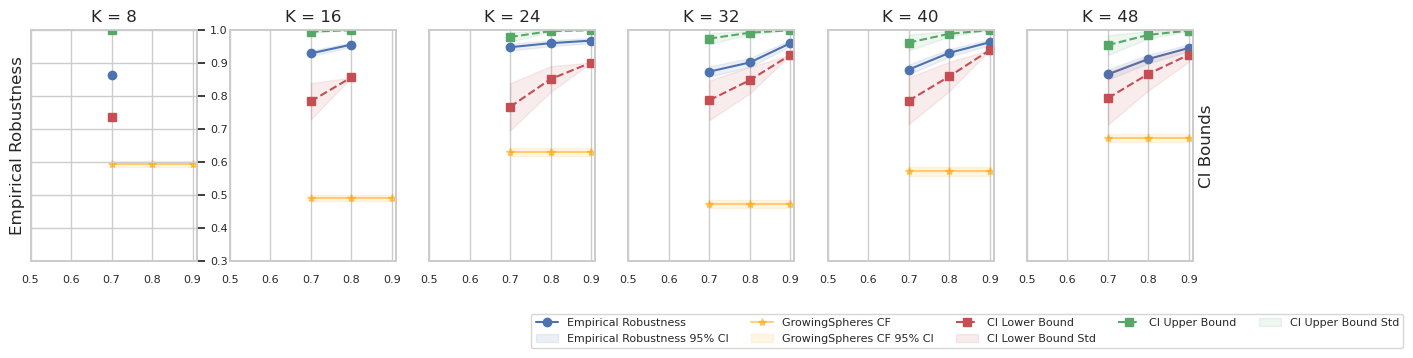

In [ ]:
# Use only matplotlib
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = k_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df["experiment_type"] == "Architecture"]
method = "GrowingSpheres"

ks = sorted(_tmp_df["k_mlps_in_B"].unique().tolist())
delta_robustness = _tmp_df["delta_robustness"].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3), sharex=True, sharey=True)
axes = axes.flatten()


for i, k in enumerate(ks):
    _df = _tmp_df[(_tmp_df["k_mlps_in_B"] == k)]

    data = _df.groupby("delta_robustness")[
        "robust_counterfactual_validity_model2"
    ].mean()
    ax = axes[i]
    ax.plot(
        delta_robustness,
        data,
        marker="o",
        linestyle="-",
        color="b",
        label="Empirical Robustness",
    )
    emprob_ci = (
        1.96
        * _df.groupby("delta_robustness")["robust_counterfactual_validity_model2"].std()
        / np.sqrt(
            _df.groupby("delta_robustness")[
                "robust_counterfactual_validity_model2"
            ].count()
        )
    )
    ax.fill_between(
        delta_robustness,
        data - emprob_ci,
        data + emprob_ci,
        color="b",
        alpha=0.1,
        label="Empirical Robustness 95% CI",
    )

    ax.set_title(f"K = {k}")

    if i == 0:
        ax.set_ylabel("Empirical Robustness")

    data_lower = _df.groupby("delta_robustness")["lower_bound_beta"].mean()
    data_upper = _df.groupby("delta_robustness")["upper_bound_beta"].mean()

    ax2 = ax.twinx()

    ax2.plot(
        delta_robustness,
        data_lower,
        marker="s",
        linestyle="--",
        color="r",
        label="CI Lower Bound",
    )
    # add yerr for lower bound
    lb_std = _df.groupby("delta_robustness")["lower_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_lower - lb_std,
        data_lower + lb_std,
        color="r",
        alpha=0.1,
        label="CI Lower Bound Std",
    )

    ax2.plot(
        delta_robustness,
        data_upper,
        marker="s",
        linestyle="--",
        color="g",
        label="CI Upper Bound",
    )
    # add yerr
    ub_std = _df.groupby("delta_robustness")["upper_bound_beta"].std()
    ax2.fill_between(
        delta_robustness,
        data_upper - ub_std,
        data_upper + ub_std,
        color="g",
        alpha=0.1,
        label="CI Upper Bound Std",
    )

    if i == len(ks) - 1:
        ax2.set_ylabel("CI Bounds")

    # Plot baseline
    for m, color in zip(["GrowingSpheres"], ["orange"]):
        __df = _df[_df["base_cf_method"] == m]
        base = __df["base_counterfactual_validity_model2"].mean()
        base_std = __df["base_counterfactual_validity_model2"].std()
        base_ci = (
            1.96
            * base_std
            / np.sqrt(__df["base_counterfactual_validity_model2"].count())
        )
        ax.plot(
            delta_robustness,
            [base] * len(delta_robustness),
            color=color,
            linestyle="-",
            label=f"{m} CF",
            marker="*",
            alpha=0.5,
        )
        ax.fill_between(
            delta_robustness,
            base - base_ci,
            base + base_ci,
            color=color,
            alpha=0.1,
            label=f"{m} CF 95% CI",
        )

    l = 0.3
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
    # Make x-axis labels more coarse i.e. only show rounded to tenths

    # ax_lim = ax.get_xlim()
    # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))

    if i == 4:
        ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
        ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()

        ax.legend(
            ax_legend_handles + ax2_legend_handles,
            ax_legend_labels + ax2_legend_labels,
            ncol=5,
            loc="lower right",
            bbox_to_anchor=(3.5, -0.4),
            fontsize=8,
        )

    # Decrease font size of the labels
    ax.tick_params(axis="both", which="major", labelsize=8)
    ax2.tick_params(axis="both", which="major", labelsize=8)

    # Turn off label ticks for ax2 on the plots that are not on the right

    if i != 0:
        ax2.set_yticklabels([])
        ax2.set_yticks([])
        ax.set_yticks([])
        ax.set_yticklabels([])


dataset = _tmp_df["dataset_name"].unique()[0]
experiment_type = _tmp_df["experiment_type"].unique()[0]
# plt.suptitle(f'Empirical Robustness vs K MLPs in B (Dataset: {dataset}, Experiment Type: {experiment_type})')
plt.savefig(
    f"{images_dir}/4_2_empirical_robustness_ci_bounds_vs_k.png",
    dpi=300,
    bbox_inches="tight",
)

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_3] Ablation (generalizations)</div>

In [ ]:
generalization_results_path = results_path + "/generalization"
gen_raw_df = process_results(generalization_results_path)

Reading results: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


In [ ]:
gen_raw_df["experiment_type"].value_counts()

Architecture    10301
Name: experiment_type, dtype: int64

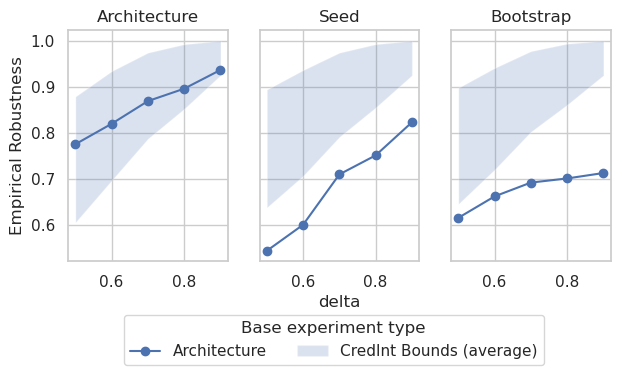

In [ ]:
generalizations = gen_raw_df["experiment_generalization_type"].unique()
experiments = gen_raw_df["experiment_type"].unique()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(7, 3), sharex=True, sharey=True)
axes = axes.flatten()
for i, gen in enumerate(generalizations):
    for j, experiment in enumerate(experiments):
        tmp_gen_df = gen_raw_df.copy()
        tmp_gen_df = tmp_gen_df[
            (tmp_gen_df["experiment_type"] == experiment)
            & (tmp_gen_df["experiment_generalization_type"] == gen)
        ]

        lbs = tmp_gen_df["lower_bound_beta"]
        ubs = tmp_gen_df["upper_bound_beta"]

        tmp_grp = tmp_gen_df.groupby("delta_robustness")[
            "robust_counterfactual_validity_model2"
        ].mean()

        axes[i].plot(
            tmp_grp.index, tmp_grp, marker="o", linestyle="-", label=experiment
        )

        tmp_grp_lower = tmp_gen_df.groupby("delta_robustness")[
            "lower_bound_beta"
        ].mean()
        tmp_grp_upper = tmp_gen_df.groupby("delta_robustness")[
            "upper_bound_beta"
        ].mean()

        axes[i].fill_between(
            tmp_grp.index,
            tmp_grp_lower,
            tmp_grp_upper,
            alpha=0.2,
            label="CredInt Bounds (average)",
        )

        axes[i].set_title(gen)
        if i == 1:
            axes[i].set_xlabel("delta")

        if i == 0:
            axes[i].set_ylabel("Empirical Robustness")

        if i == 1:
            axes[i].legend(
                title="Base experiment type",
                loc="upper left",
                ncol=2,
                bbox_to_anchor=(-0.9, -0.2),
            )


# plt.tight_layout()

plt.savefig(
    f"{images_dir}/4_3_empirical_robustness_vs_delta_generalization.png",
    dpi=300,
    bbox_inches="tight",
)

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[5] Time</div>

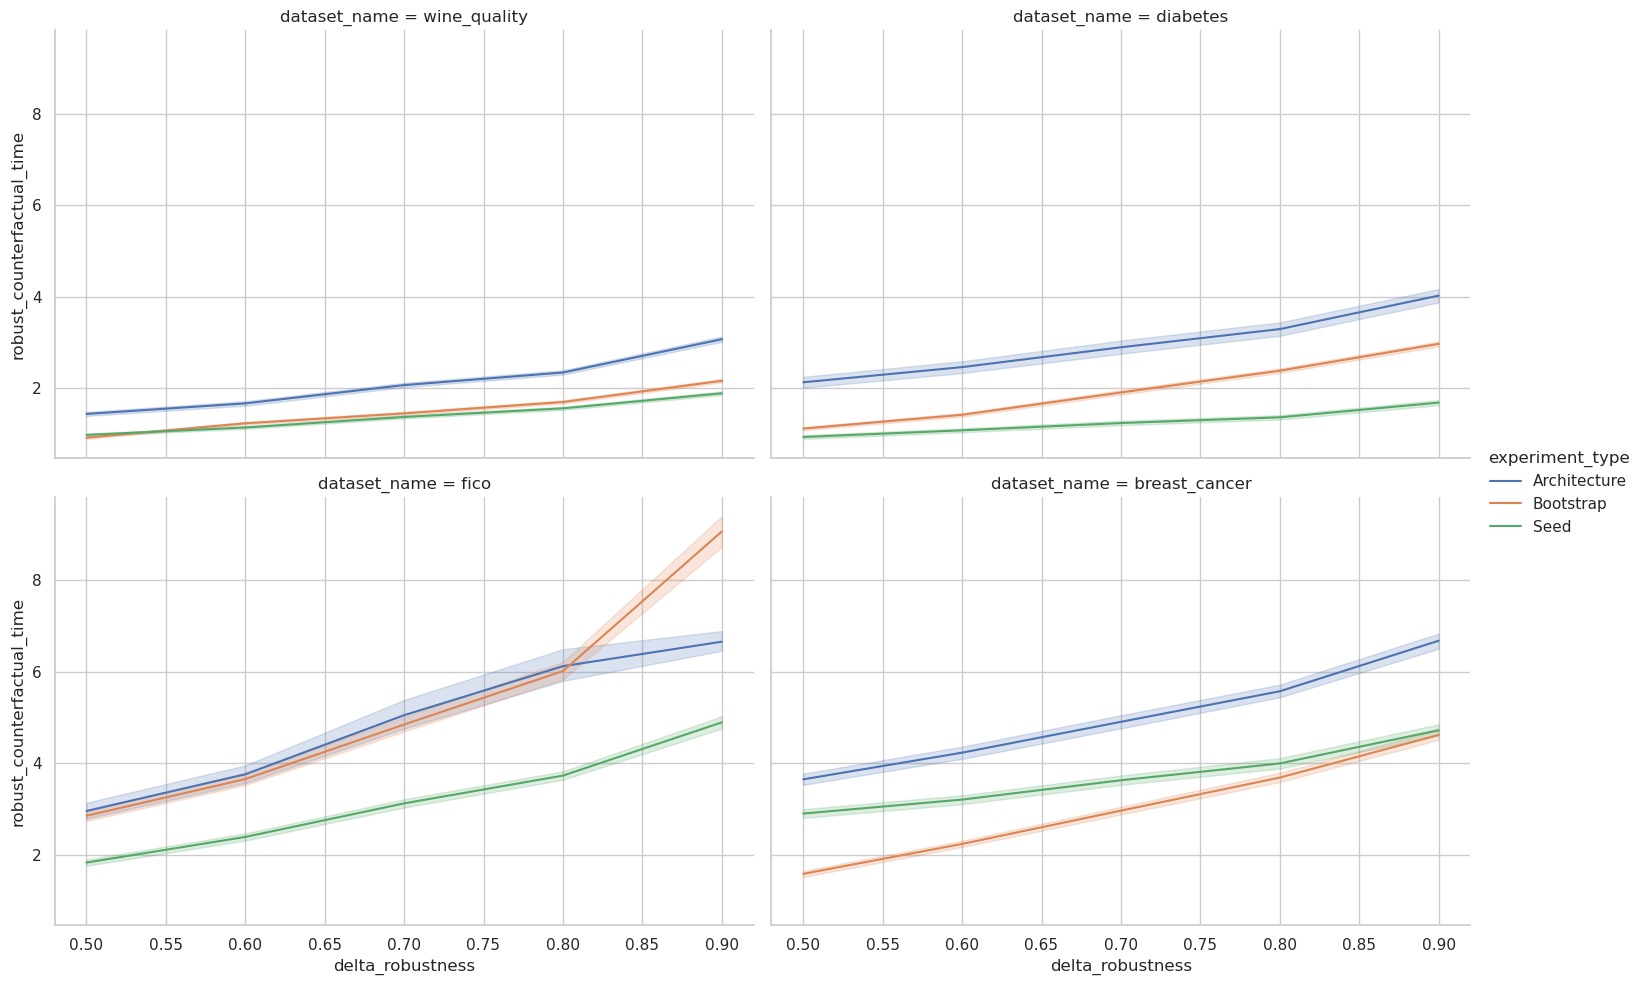

In [ ]:
sns.relplot(
    data=nn_gs_df,
    x="delta_robustness",
    y="robust_counterfactual_time",
    hue="experiment_type",
    col="dataset_name",
    kind="line",
    height=5,
    aspect=1.5,
    col_wrap=2,
)
# plt.xlabel('Delta Robustness')
# plt.ylabel('Robust CF generation time (s)')
plt.savefig(
    f"{images_dir}/5_1_robust_cf_generation_time_delta.png",
    dpi=300,
    bbox_inches="tight",
)

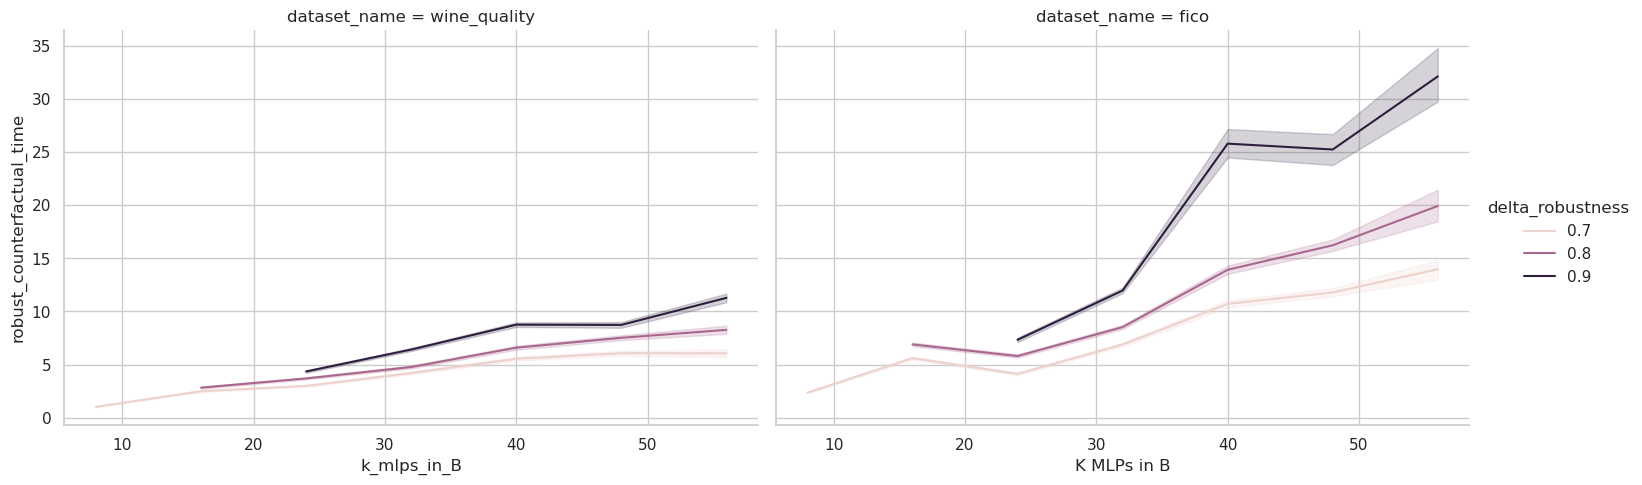

In [ ]:
sns.relplot(
    data=k_raw_df,
    x="k_mlps_in_B",
    y="robust_counterfactual_time",
    hue="delta_robustness",
    col="dataset_name",
    kind="line",
    height=5,
    aspect=1.5,
)
plt.xlabel("K MLPs in B")
plt.ylabel("Robust CF generation time (s)")
plt.savefig(
    f"{images_dir}/5_2_robust_cf_generation_time_k.png", dpi=300, bbox_inches="tight"
)

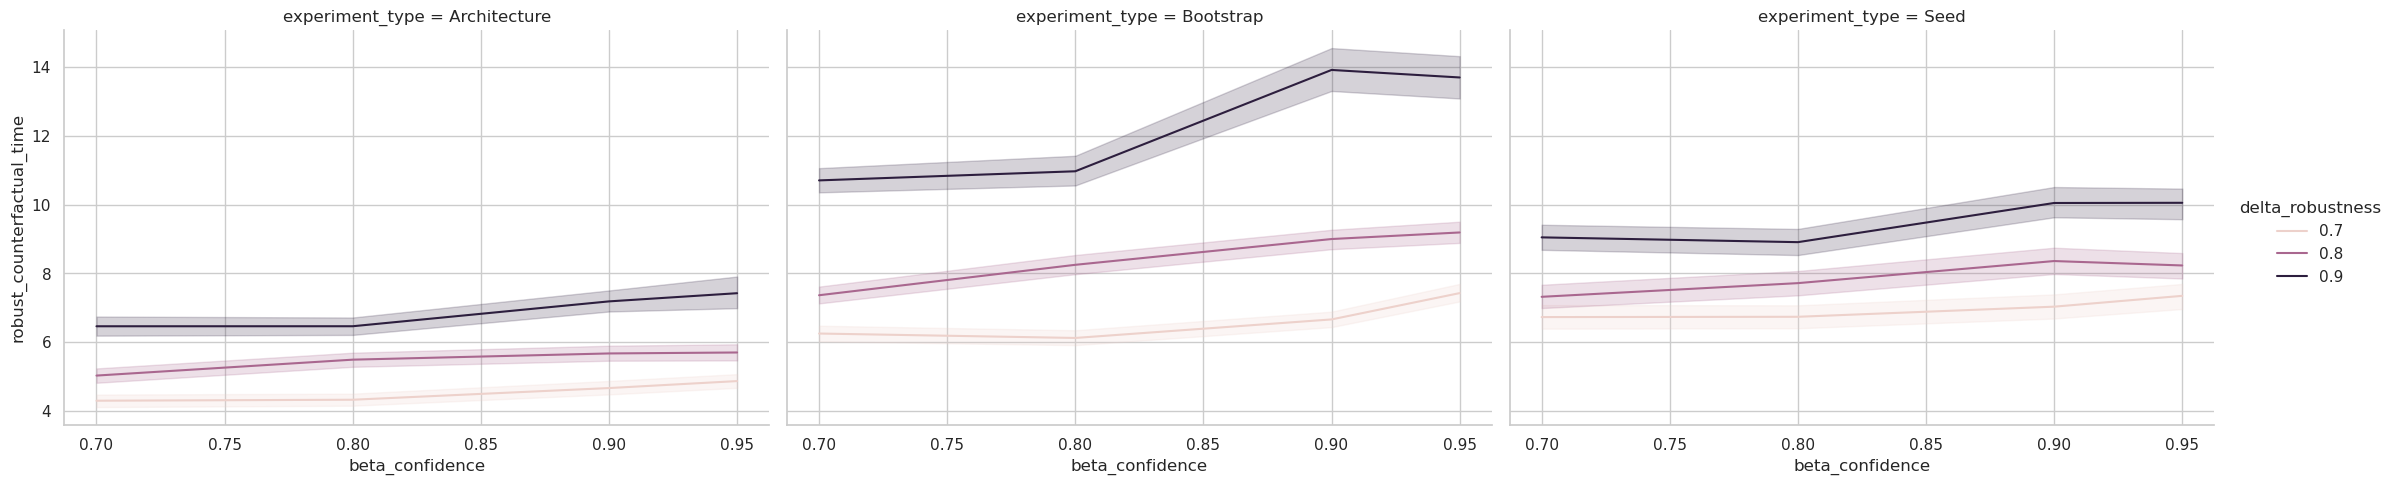

In [ ]:
sns.relplot(
    data=conf_sweep_raw_df,
    x="beta_confidence",
    y="robust_counterfactual_time",
    hue="delta_robustness",
    col="experiment_type",
    kind="line",
    height=5,
    aspect=1.5,
)
plt.savefig(
    f"{images_dir}/5_3_robust_cf_generation_time_beta_confidence.png",
    dpi=300,
    bbox_inches="tight",
)

In [ ]:
# Create a scatterplot time vs empirical robustness
cutoff_up = 0.8
cutoff_low = 0.2
exp = "Seed"

# Print average time for each experiment type
print("BetaROB Time")
tmp_beta = raw_df[raw_df["experiment_type"] == exp]
quantile80 = tmp_beta["robust_counterfactual_time"].quantile(cutoff_up)
quantile20 = tmp_beta["robust_counterfactual_time"].quantile(cutoff_low)
tmp_beta = tmp_beta[tmp_beta["robust_counterfactual_time"] < quantile80]
tmp_beta = tmp_beta[tmp_beta["robust_counterfactual_time"] > quantile20]
print(
    tmp_beta.groupby(["experiment_type", "dataset_name"])["robust_counterfactual_time"]
    .mean()
    .sort_index()
)

print("RobX Time")
tmp_robx = robx_raw_df[robx_raw_df["experiment_type"] == exp]
quantile80 = tmp_robx["robust_counterfactual_time"].quantile(cutoff_up)
quantile20 = tmp_robx["robust_counterfactual_time"].quantile(cutoff_low)
tmp_robx = tmp_robx[tmp_robx["robust_counterfactual_time"] < quantile80]
tmp_robx = tmp_robx[tmp_robx["robust_counterfactual_time"] > quantile20]
print(
    tmp_robx.groupby(["experiment_type", "dataset_name"])["robust_counterfactual_time"]
    .mean()
    .sort_index()
)

print("Base CF Time")
tmp_base = raw_df[raw_df["experiment_type"] == exp]
quntile80 = tmp_base["base_counterfactual_time"].quantile(cutoff_up)
quantile20 = tmp_base["base_counterfactual_time"].quantile(cutoff_low)
tmp_base = tmp_base[tmp_base["base_counterfactual_time"] < quantile80]
tmp_base = tmp_base[tmp_base["base_counterfactual_time"] > quantile20]
print(
    tmp_base.groupby(["experiment_type", "dataset_name"])["base_counterfactual_time"]
    .mean()
    .sort_index()
)

BetaROB Time
experiment_type  dataset_name 
Seed             breast_cancer    2.178209
                 diabetes         1.307726
                 fico             2.222163
                 wine_quality     1.326638
Name: robust_counterfactual_time, dtype: float64
RobX Time
experiment_type  dataset_name 
Seed             breast_cancer    0.572322
                 diabetes         0.278550
                 fico             0.740911
                 wine_quality     0.646489
Name: robust_counterfactual_time, dtype: float64
Base CF Time
experiment_type  dataset_name 
Seed             breast_cancer    0.099611
                 diabetes         0.047365
                 fico             0.077116
                 wine_quality     0.082889
Name: base_counterfactual_time, dtype: float64


In [ ]:
columns_to_keep = [
    # 'dataset_name',
    # 'experiment_type',
    # 'method_name',
    # 'base_counterfactual_validity_model2',
    # 'base_counterfactual_L1_distance_from_base_cf',
    "base_counterfactual_proximityL1",
    "base_counterfactual_proximityL2",
    "base_counterfactual_plausibility",
    "base_counterfactual_discriminative_power",
    "base_counterfactual_time",
]

grpd = supp_df.groupby(["base_cf_method", "dataset_name", "experiment_type"])[
    "base_counterfactual_validity_model2"
].mean()
# grpd.columns = ['Robustness', 'Prox L1', 'Prox L2', 'Plausibility', 'Discriminative Power', 'Time']
grpd.round(3)

base_cf_method  dataset_name  experiment_type
FACE            diabetes      Architecture       0.819
                              Bootstrap          0.744
                              Seed               0.677
                fico          Architecture       0.717
                              Bootstrap          0.681
                              Seed               0.687
RBR             diabetes      Architecture       0.566
                              Bootstrap          0.541
                              Seed               0.558
                fico          Architecture       0.707
                              Bootstrap          0.600
                              Seed               0.580
ROAR            diabetes      Architecture       0.264
                              Bootstrap          0.266
                              Seed               0.243
                fico          Architecture       0.026
                              Bootstrap          0.160
                   

In [ ]:
grpd = supp_df.groupby(["base_cf_method", "dataset_name"])[columns_to_keep].mean()
grpd.columns = ["Prox L1", "Prox L2", "Plausibility", "Discriminative Power", "Time"]
grpd.round(3)

Prox L1  Prox L2  Plausibility  \
base_cf_method dataset_name                                   
FACE           diabetes        0.802    0.371         0.250   
               fico            2.112    0.626         0.446   
RBR            diabetes        0.728    0.341         0.326   
               fico            1.640    0.490         0.469   
ROAR           diabetes        0.852    0.345         0.491   
               fico            0.229    0.049         0.512   

                             Discriminative Power   Time  
base_cf_method dataset_name                               
FACE           diabetes                     0.536  0.050  
               fico                         0.487  0.108  
RBR            diabetes                     0.597  0.275  
               fico                         0.490  0.232  
ROAR           diabetes                     0.785  0.036  
               fico                         0.670  0.025